# <center><u><font color='red'>Titanic - Machine Learning from Disaster</font></u></center>

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import math

import scipy.stats as stats
from scipy.stats.stats import pearsonr

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

#import sys
# np.set_printoptions(threshold=np.inf)  #afficher la totalité des sorties

# <font color='red'>Fonction</font>

In [3]:
def get_df_name(df):
    """this function returns the name of the dataframe passed as argument
    df : dataframe dataframe whose name we want to know"""
    name = [x for x in globals() if globals()[x] is df][0]
    return name

In [4]:
def print_without_hue(plot, feature):
    '''
    print_with_hue_01(): Add percentage for hues to bar plots without number after comma
    args:
        plot : ax of the graph
        feature : feature for hue
    '''
    total = len(feature)
    for bar in plot.patches:
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height(
        )  # mettre le % au milieu de la barre add : / 2 - 0.05
        pourcentage = '{:.0f}%'.format(100 * bar.get_height() / total)
        plot.annotate(pourcentage, (x, y),
                      ha='center',
                      va='center',
                      size=15,
                      xytext=(0, 8),
                      textcoords='offset points')
    plt.show()


def print_without_hue_01(plot, feature):
    '''
    print_with_hue_01(): Add percentage for hues to bar plots with one number after comma
    args:
        plot : ax of the graph
        feature : feature for hue
    '''
    total = len(feature)
    for bar in plot.patches:
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height(
        )  # mettre le % au milieu de la barre add : / 2 - 0.05
        pourcentage = '{:.1f}%'.format(100 * bar.get_height() / total)
        plot.annotate(pourcentage, (x, y),
                      ha='center',
                      va='center',
                      size=15,
                      xytext=(0, 8),
                      textcoords='offset points')
    plt.show()


def print_with_hue_01(df, xVar, ax):
    '''
    print_with_hue_01(): Add percentage for hues to bar plots with one number after comma
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    # check for NaN and remove
    numX = len([x for x in df[xVar].unique() if x == x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    # 2a. For each X variable
    for ind in range(numX):
        # 2b. Get every hue bar
        # ex. 8 X categories, 4 hues =>
        # [0, 8, 16, 24] are hue bars for 1st X category
        hueBars = bars[ind:][::numX]
        # 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width() / 2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.1%}',
                    ha="center",
                    va="bottom",
                    size=15)


def print_with_hue(df, xVar, ax):
    '''
    print_with_hue_01(): Add percentage for hues to bar plots without number after comma
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    # check for NaN and remove
    numX = len([x for x in df[xVar].unique() if x == x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    # 2a. For each X variable
    for ind in range(numX):
        # 2b. Get every hue bar
        # ex. 8 X categories, 4 hues =>
        # [0, 8, 16, 24] are hue bars for 1st X category
        hueBars = bars[ind:][::numX]
        # 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width() / 2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",
                    va="bottom",
                    size=15)

In [5]:
def info_generales(dataframe):
    """This function gives the general information of a dataset.
    It returns the number of rows and columns of the dataset.
    dataframe : dataset"""
    dataframe.info()
    print(" ")
    print(" ")
    print(" ")

    lignes = dataframe.shape[0]
    colonnes = dataframe.shape[1]
    print("Le jeu de données a {} lignes et {} colonnes.".format(
        lignes, colonnes))

In [6]:
def pie_NaN(dataframe, size):
    """This function allows to make a pie plot showing the
    proportion of missing data on the whole dataset.
    dataframe : dataset
    size : size of the figure (X, X)
    """

    lignes = dataframe.shape[0]
    colonnes = dataframe.shape[1]

    # number of non-missing data
    nb_data = dataframe.count().sum()

    # total number of data in this dataset (columns*rows)
    nb_totale = (colonnes * lignes)

    # rate filling data set
    rate_dataOK = (nb_data / nb_totale)
    print("Le jeux de données est rempli à {:.2%}".format(rate_dataOK))
    print("et il a {:.2%} de données manquantes".format(1 - rate_dataOK))
    print(" ")
    print(" ")

    # Pie Plot
    rates = [rate_dataOK, 1 - rate_dataOK]
    labels = ["Données", "NAN"]

    explode = (0, 0.1)
    colors = ['gold', 'pink']

    # Plot
    plt.figure(figsize=size)
    plt.pie(rates,
            explode=explode,
            labels=labels,
            colors=colors,
            autopct='%.2f%%',
            shadow=True,
            textprops={'fontsize': 26})

    ttl = plt.title("Taux de remplissage du jeu de données", fontsize=32)
    ttl.set_position([0.5, 0.85])

    plt.axis('equal')
    #ax.legend(labels, loc = "upper right", fontsize = 18)
    plt.tight_layout()

    plt.show()

In [7]:
def graphe_remplissage_variable(dataframe, size):
    """This function allows to make barplot to show the distribution
    of the data between the different columns of the dataset.
    dataframe : dataset
    size : size of the figure (X, X)
    """
    # Distribution of the filling rate of the columns:
    df = pd.DataFrame(round(dataframe.shape[0] - dataframe.isna().sum()) /
                      dataframe.shape[0],
                      columns=['Taux de remplissage'
                               ]).sort_values('Taux de remplissage',
                                              ascending=False).reset_index()
    fig, ax = plt.subplots(figsize=size)
    sns.barplot(y=df['index'], x='Taux de remplissage', data=df)
    plt.title('Taux de remplissage des variables - %', fontsize=30)
    plt.show()

In [8]:
def duplicate(dataframe, depend_on):
    """This function allows to delete duplicated elements in the dataset.
    dataframe : dataset
    depend_on : Variable used to search for duplicates."""

    before = len(dataframe)
    dataframe = dataframe.drop_duplicates(subset=depend_on)
    after = len(dataframe)
    print("Nombre de lignes dupliquées supprimées : {}".format(before - after))

In [9]:
def filtration_columns(dataframe, filling_rate):
    """filtration of the columns of a dataframe according to a predefined filling rate of the columns
  dataframe : Dataframe to be filtered
  filling_rate : filling rate"""
    dataframe = dataframe.replace(to_replace='^nan$', value=np.nan, regex=True)
    indexes = []
    # number of columns at the origin
    nb_colonne = dataframe.shape[1]
    for col_name in dataframe.columns.tolist():
        rate_data_column = (
            dataframe[col_name].shape[0] -
            dataframe[col_name].isna().sum()) / dataframe[col_name].shape[0]
        # fill rate for each column :
        # (numberofline-numberofNANspercolumn)/numberofline
        if rate_data_column < filling_rate:
            # Filtration of the columns whose filling is higher than the limit
            dataframe.drop(col_name, axis=1, inplace=True)
    # nombre de colonnes au final
    nb_column_supp = nb_colonne - dataframe.shape[1]
    if nb_column_supp == 0:
        print("All the columns have a filling rate higher than {:.2%}".format(
            filling_rate))
    else:
        print("Number of columns with a fill rate greater than {:.2%}: "
              "{} columns.".format(filling_rate, dataframe.shape[1]))
        print("Number of deleted columns: {} columns".format(nb_column_supp))
        print("\n")
    return dataframe

In [10]:
from scipy.stats import variation


def description_var(df, col):
    """This function allows the statistical analysis of
    numerical variables and the creation of an associated boxplot.
    df : dataframe
    col : column name
    """
    colData = df[col]
    moyenne = np.mean(colData)
    mediane = np.median(colData)
    Q1 = np.percentile(colData, 25)
    Q3 = np.percentile(colData, 75)
    max = colData.max()
    min = colData.min()
    variance = np.var(colData)
    ecartType = np.std(colData)
    skew = pd.DataFrame(colData).skew()[0]
    kurt = pd.DataFrame(colData).kurtosis()[0]

    print("Mesures statistiques pour la variable {}".format(col))
    print(" ")
    print("La moyenne de la variable {} est : {} ".format(
        col, round(moyenne, 2)))
    print("La mediane de la variable {} est : {} ".format(
        col, round(mediane, 2)))
    print("Quartile Q1 vaut : {} ".format(round(Q1, 2)))
    print("Quartile Q3 vaut : {} ".format(round(Q3, 2)))
    print("Le maximum vaut : {} ".format(max))
    print("Le minimum vaut : {} ".format(min))
    print(" ")
    print(" ")
    print("Mesures de dispersion pour la variable {}".format(col))
    print(" ")
    print("La variance de la variable {} est : {} ".format(
        col, round(variance, 2)))
    print("L'écart type de la variable {} est : {} ".format(
        col, round(ecartType, 2)))
    print("Le coefficient de variation de la variable {} est de : {}".format(
        col, round(variation(colData), 2)))
    print("L'écart interquartile de la variable {} est de : {} ".format(
        col, round(Q3 - Q1, 2)))
    print(" ")
    print(" ")
    print("Mesures de forme pour la variable {}".format(col))
    print(" ")
    print("Le skewewness empirique pour la variable {} est de {} ".format(
        col, round(skew, 4)))
    if (skew == 0):
        print("La distribution de la variable {} est symétrique.".format(col))
    elif (skew > 0):
        print("La distribution de la variable {} est étalée vers la droite.".
              format(col))
    else:
        print("La distribution de la variable {} est étalée vers la gauche.".
              format(col))
    print(" ")
    print("Le Kurtosis empirique pour la variable {} est de {} ".format(
        col, round(kurt, 4)))
    if kurt == 0:
        print(
            "La distribution de la variable {} a le même applatissement que la distribution normale."
            .format(col))
    elif kurt > 0:
        print(
            "La distribution de la variable {} est moins applatie que la distribution normale, les observations sont plus concentrées."
            .format(col))
    else:
        print(
            "La distribution de la variable {} est plus applatie que la distribution normale, les observations sont moins concentrées."
            .format(col))
    print(" ")
    plt.figure(figsize=(10, 8))
    df[col].hist(
        color='pink',
        edgecolor='red',
        log=True,
    )
    plt.title("Représentation statistique de la variable {}".format(col))
    plt.show()
    print(" ")
    print("Boxplot pour la variable {}".format(col))
    plt.figure(figsize=(6, 6))
    df.boxplot(column=[col],
               return_type='axes',
               vert=True,
               showfliers=False,
               showcaps=True,
               patch_artist=True,
               color='tan',
               medianprops={
                   'linestyle': '-',
                   'linewidth': 2,
                   'color': 'red'
               },
               whiskerprops={
                   'linestyle': '-',
                   'linewidth': 2,
                   'color': 'blue'
               },
               capprops={
                   'linestyle': '-',
                   'linewidth': 2,
                   'color': 'blue'
               })
    plt.show()
    print(" ")
    print(" ")

In [11]:
def barplot(size, df, col):
    """This function allows to make a bar plot showing the
    proportion of column's data.
    df : dataset
    col : study column
    size : size of the figure (X,X)"""
    plt.figure(figsize=size)
    #ranks = df[col].sort_values().index
    #palette = sns.color_palette('Blues_d', len(ranks))
    ax = sns.barplot(
        x=df[col],
        y=df[col].value_counts())  #,palette=np.array(palette)[ranks]

    ax.bar_label(ax.containers[0], label_type='center', fontsize=22)

    plt.xticks(size=14)
    plt.yticks(size=14)

In [12]:
def barplot_hue(size, df, col, col_hue):
    """This function allows to make a bar plot showing the
    proportion of column's data with hue.
    df : dataset
    col : study column
    size : size of the figure (X,X)"""

    plt.figure(figsize=size)
    #ranks = df[col].sort_values().index
    #palette = sns.color_palette('Blues_d', len(ranks))
    ax = sns.barplot(x=df[col], y=df[col].value_counts(),
                     hue=df[col_hue])  #,palette=np.array(palette)[ranks]

    for container in ax.containers:
        ax.bar_label(container, label_type='center', fontsize=22)

    plt.xticks(size=14)
    plt.yticks(size=14)

In [13]:
def countplot(size, df, col):
    """Displays the countplot of a characteristic
    size : size of the figure (X, X)
    df : dataframe
    col : column to study"""

    plt.figure(figsize=size)

    ranks = df[col].sort_values().index
    palette = sns.color_palette('Blues_d', len(ranks))
    ax = sns.countplot(x=col, data=df)  #, palette=np.array(palette)[ranks]
    plt.xticks(size=12)
    plt.yticks(size=12)

    return ax

In [14]:
def countplot_with_hue(size, df, col, col_hue):
    """Displays the countplot of a characteristic with hue
    size : size of the figure (X, X)
    df : dataframe
    col : column to study"""

    plt.figure(figsize=size)

    ranks = df[col].sort_values().index
    palette = sns.color_palette('Blues_d', len(ranks))
    ax = sns.countplot(x=col, data=df,
                       hue=col_hue)  # ,palette=np.array(palette)[ranks]
    plt.xticks(size=12)
    plt.yticks(size=12)

    return ax

In [15]:
def pie_plot(size, df, col):
    """This function allows to make a pie plot showing the
    proportion of column's data.
    df : dataset
    col : study column
    size : size of the figure (X,X)"""

    plt.figure(figsize=size)
    values = (df[col].value_counts() / len(df) * 100)

    labels = df[col].value_counts().index

    colors = sns.color_palette('BrBG_r')

    plt.pie(
        values,
        labels=labels,
        autopct='%.0f%%',  #colors=colors,
        shadow=False,
        textprops={'fontsize': 20})
    plt.axis('equal')
    plt.tight_layout()

In [16]:
def catplot_two_hue(size, df, XVar, hue_col, sep_group):
    """df : Dataframe name
    XVar : var of the X axis
    hue_col : Column to represent by diff color
    sep_group : On what column do we create two graph"""

    fg = sns.catplot(data=df, kind='count', x=XVar, hue=hue_col, col=sep_group)
    fg.fig.subplots_adjust(top=0.9)
    fg.fig.set_size_inches(size)
    fg.fig.suptitle('Bar Count and Percent of Total')

    total = len(df[XVar])

    for ax in fg.axes.ravel():
        # add annotations
        for c in ax.containers:

            # custom label calculates percent and add an empty string so 0 value bars don't have a number

            labels = [f'{100 * v.get_height()/total:0.1f}%' for v in c]

            ax.bar_label(c, labels=labels, label_type='edge')

In [17]:
def verif_normalite(dataframe):
    """This function allows to check the normality of numerical variables.
    """
    numeric_columns = dataframe.select_dtypes(
        include=['int64', 'float64']).columns
    for column in numeric_columns:
        print('__\n{}'.format(column))
        k2, p = stats.normaltest(dataframe[column], axis=0, nan_policy='omit')
        alpha = 5e-2
        print("p = {:g}".format(p))
        if p < alpha:  # null hypothese: x as a normal distribution
            print("H0 is rejected : {} is not normally distributed".format(
                column))
        else:
            print("H0 cannot be rejected:{} is normally distributed".format(
                column))

In [18]:
def delete_outliers_percentiles(dataframe):
    '''Removal of extreme percentile outliers.
    dataframe : dataset'''
    numeric_columns = dataframe.select_dtypes(
        include='number').columns.tolist()
    if numeric_columns:
        for column in numeric_columns:
            dataframe.loc[
                dataframe[column] > dataframe[column].quantile(0.995)] = np.nan
            dataframe.loc[
                dataframe[column] < dataframe[column].quantile(0.005)] = np.nan
            dataframe.loc[dataframe[column] < 0] = np.nan
            dataframe.dropna(inplace=True)

In [19]:
def delete_outliers_IQR(dataframe, n):
    """Removal of outliers by the Interquartile method for variables
    following a normal distribution.
    dataframe : dataset
    n = number of extreme values to be taken
    into account to consider that a line is outlier."""
    indexes_outliers = []
    dd = df_in.select_dtypes(include=['int64', 'float64']).columns.tolist()
    for col_name in dd:
        print('colonne ', col_name)
        Q1 = dataframe[col_name].quantile(0.25)
        Q3 = dataframe[col_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        lower_limit, upper_limit
        list_outliers = dataframe[(dataframe[col_name] < lower_limit) |
                                  (dataframe[col_name] > upper_limit)].index
        indexes_outliers.extend(list_outliers)
    indexes_outliers = Counter(indexes_outliers)
    multiple_outliers = list(k for k, v in indexes_outliers.items() if v > n)
    print(" ")
    print("remove {} outliers".format(len(multiple_outliers)))
    dataframe.drop(multiple_outliers, axis=0,
                   inplace=True).reset_index(drop=True)

In [20]:
def plot_multiple_histograms(dataframe, size):
    """This function allows you to see graphically
    the shape of numerical variables by representing their density.
    dataframe : dataser
    size : size of the figure (x,x)"""
    cols = dataframe.select_dtypes(include='number').columns.tolist()
    if cols is None:
        print("There are no numeric columns.")
        pass
    else:
        num_plots = len(cols)
        num_cols = math.ceil(np.sqrt(num_plots))
        num_rows = math.ceil(num_plots / num_cols)
        fig, axs = plt.subplots(num_rows, num_cols, figsize=size)
        for ind, col in enumerate(cols):
            i = math.floor(ind / num_cols)
            j = ind - i * num_cols
            if num_rows == 1:
                if num_cols == 1:
                    sns.distplot(dataframe[col], kde=True, ax=axs)
                else:
                    sns.distplot(dataframe[col], kde=True, ax=axs[j])
            else:
                sns.distplot(dataframe[col], kde=True, ax=axs[i, j])

# <font color='red'>Informations et nettoyage du dataset train</font>

## <font color='green'>Informations générales</font>

In [21]:
train = pd.read_csv("train.csv")

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
info_generales(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
 
 
 
Le jeu de données a 891 lignes et 12 colonnes.


survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex	

Age	Age in years	

sibsp	# of siblings / spouses aboard the Titanic	 Nombre de frères et sœurs / conjoints à bord du Titanic

parch	# of parents / children aboard the Titanic	 Nombre de parents / enfants à bord du Titanic

ticket	Ticket number	

fare	Passenger fare	

cabin	Cabin number	# numéro de cabine

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [24]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


38% people survived the event
35% of passengers were female
youngest person aboard was 3 months old (0.42 yr), and oldest person was 80 years old

## <font color='green'>Type de données</font>

In [25]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [26]:
data_types_dict = {'PassengerId': object, "Survived": object, 'Pclass': object}
train = train.astype(data_types_dict)

In [27]:
train.dtypes

PassengerId     object
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [28]:
train['Age'] = train['Age'].round()

## <font color='green'>Doublons</font>

In [29]:
duplicate(train, 'PassengerId')

Nombre de lignes dupliquées supprimées : 0


Il n'y a pas de doublon

## <font color='green'>Données manquantes</font>

Le jeux de données est rempli à 91.90%
et il a 8.10% de données manquantes
 
 


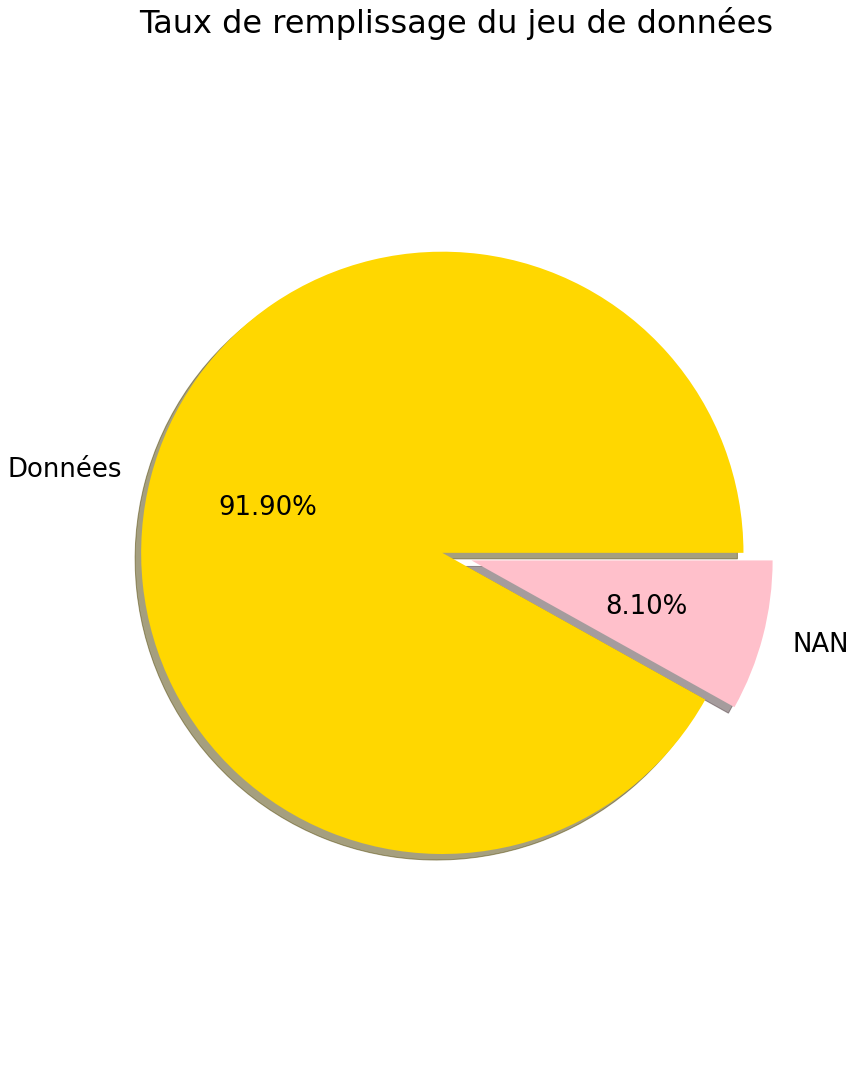

In [30]:
pie_NaN(train, (12, 15))

In [31]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

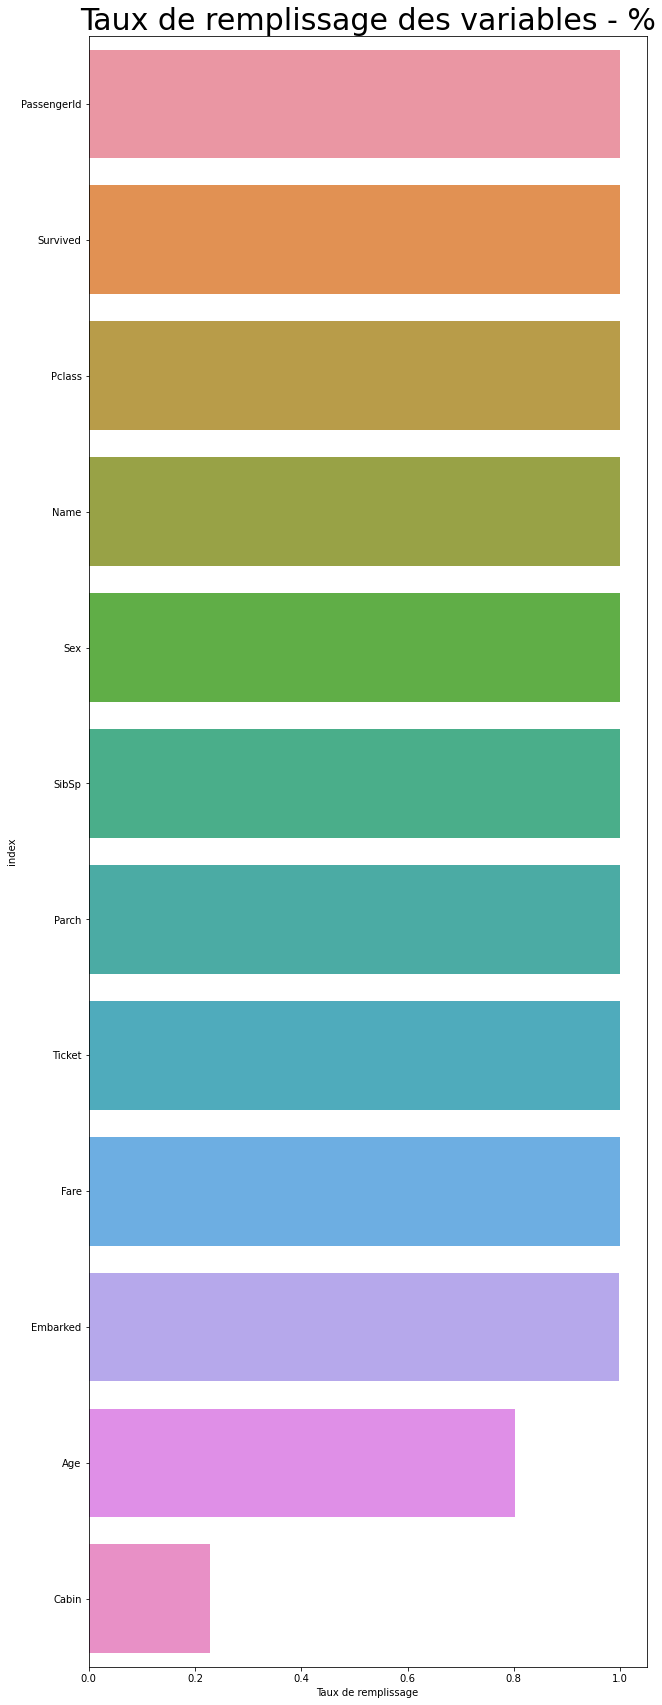

In [32]:
graphe_remplissage_variable(train, (10, 30))

Les données manquantes se situent au niveau de l'âge, du numéro de cabine et si oui ou non ils ont embarqués.

## <font color='green'>Filtration colonne</font>

Suppression des colonnes avec 20 % de données manquantes

In [33]:
train = filtration_columns(train, 0.7)

Number of columns with a fill rate greater than 70.00%: 11 columns.
Number of deleted columns: 1 columns




In [34]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Suppression des colonnes Ticket (num"ro du ticket) et Name(nom du passager) qui sont propre à chaque passager et ne permettent pas de prévoir si oui ou non le passager va survivre.

Le jeux de données est rempli à 98.17%
et il a 1.83% de données manquantes
 
 


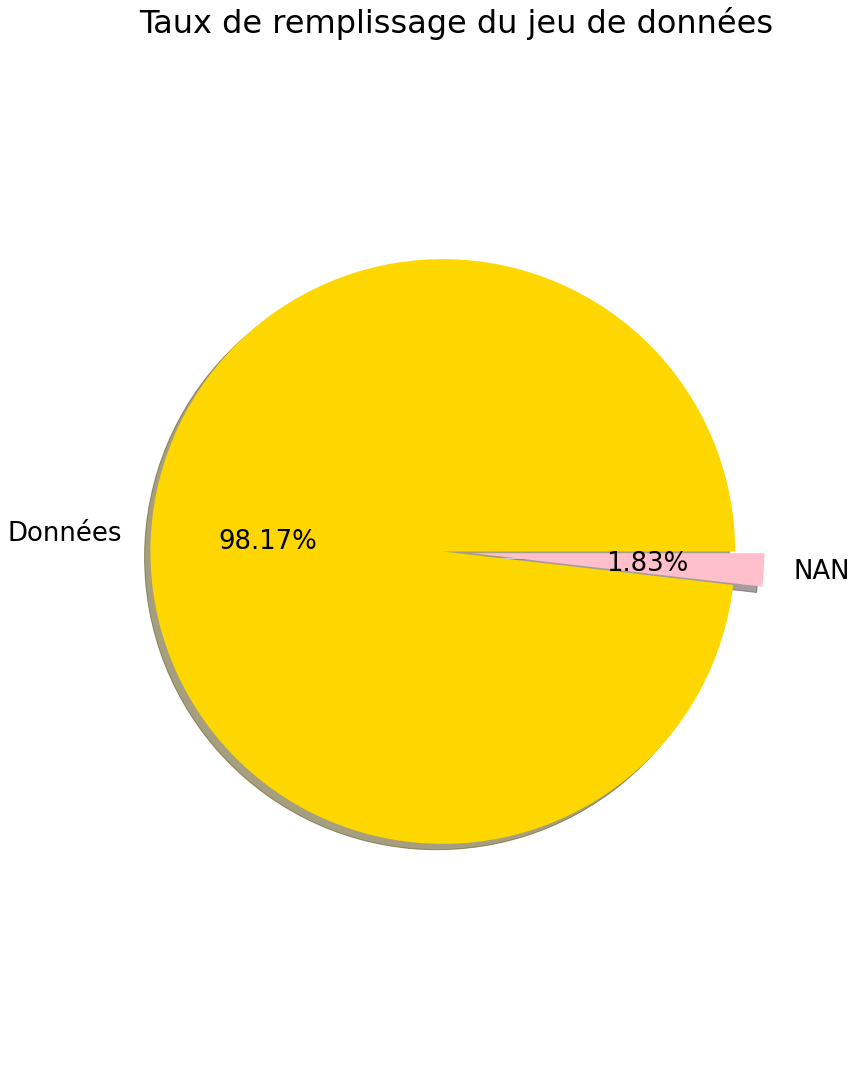

In [35]:
pie_NaN(train, (12, 15))

In [36]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Les données manquantes restantes se trouve pour l'âge des clients et le lieu où les passagers ont embarqués.

## <font color='green'>Imputation</font>

### <font color='grey'>Age</font>

Imputation de l'âge selon le titre de chaqu personne pour définir si il s'agit d'un enfant ou autres et selon la classe sur le bateau

In [37]:
train['Title'] = train["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

In [38]:
train.groupby(['Title', 'Pclass'])['Age'].agg(['mean', 'count'])

mean  count
Title    Pclass                  
Capt     1       70.000000      1
Col      1       58.000000      2
Countess 1       33.000000      1
Don      1       40.000000      1
Dr       1       43.750000      4
         2       38.500000      2
Jonkheer 1       38.000000      1
Lady     1       48.000000      1
Major    1       48.500000      2
Master   1        5.333333      3
         2        2.333333      9
         3        5.333333     24
Miss     1       30.000000     45
         2       22.375000     32
         3       16.115942     69
Mlle     1       24.000000      2
Mme      1       24.000000      1
Mr       1       41.586207     87
         2       32.756098     82
         3       28.711790    229
Mrs      1       40.882353     34
         2       33.682927     41
         3       33.515152     33
Ms       2       28.000000      1
Rev      2       43.166667      6
Sir      1       49.000000      1

on réduit le nombre de groupe en regroupant certains titre

In [39]:
TitleDict = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Dr": "Royalty",
    "Rev": "Royalty",
    "Countess": "Royalty",
    "Lady": "Royalty",
    "Mme": "Mme",  #Mrs = femme mariée
    "Mlle": "Miss",
    "Ms": "Miss",  #Ms on ne peut pas dire si la personne est mariée ou non
    "Mr": "Mr",
    "Mrs": "Mme",  #Mrs signifie femme mariée
    "Miss": "Miss",  #Miss
    "Master": "Kid"
}  #Master

In [40]:
train['Title'] = train['Title'].map(TitleDict)

In [41]:
train.groupby(['Title', 'Pclass'])['Age'].agg(['mean', 'count'])

mean  count
Title   Pclass                  
Kid     1        5.333333      3
        2        2.333333      9
        3        5.333333     24
Miss    1       29.744681     47
        2       22.545455     33
        3       16.115942     69
Mme     1       40.400000     35
        2       33.682927     41
        3       33.515152     33
Mr      1       41.586207     87
        2       32.756098     82
        3       28.711790    229
Officer 1       56.600000      5
Royalty 1       42.555556      9
        2       42.000000      8

Imputation par la moyenne arrondie de chaque classe

In [42]:
train['Age'].fillna(train.groupby(['Pclass', 'Sex',
                                   'Title'])['Age'].transform('mean').round(1),
                    inplace=True)

### <font color='grey'>Embarked</font>

In [43]:
print(train.loc[train['Embarked'].isna()])

    PassengerId Survived Pclass                                       Name  \
61           62        1      1                        Icard, Miss. Amelie   
829         830        1      1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Embarked Title  
61   female  38.0      0      0  113572  80.0      NaN  Miss  
829  female  62.0      0      0  113572  80.0      NaN   Mme  


#### <font color='orange'>Fare</font>

Certains ticket se retrouveplusieurs fois pour des passagers différents. il ne s'agit pas de doublons mais le fait que plusieur personnes peuvent ête sur le même ticket

Création dune colonne donnant le nombre de personne par ticket

In [44]:
train['PeoplePerTicket'] = train['Ticket'].map(train['Ticket'].value_counts())

Création dune colonne avec le prix déduit par personne quand il y a plusieurs personnes sur un ticket

In [45]:
train['FarePerPerson'] = train['Fare'] / train['PeoplePerTicket']

In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,PeoplePerTicket,FarePerPerson
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C,Mme,1,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mme,2,26.5500
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,1,8.0500


#### <font color='orange'>Embarked</font>

In [47]:
print(train.loc[train['Embarked'].isna()])

    PassengerId Survived Pclass                                       Name  \
61           62        1      1                        Icard, Miss. Amelie   
829         830        1      1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Embarked Title  PeoplePerTicket  \
61   female  38.0      0      0  113572  80.0      NaN  Miss                2   
829  female  62.0      0      0  113572  80.0      NaN   Mme                2   

     FarePerPerson  
61            40.0  
829           40.0  


Ces deux personnes sont ensembles sur le même ticket et payent donc le même prix par ticket et sont monté à bord en même temps. il reste à déterminer à partir du prix par personne et selon leur classe 1 de quelle endroit elles sont montées.

In [48]:
train.groupby(['Pclass', 'Embarked'])['FarePerPerson'].agg(['mean'])

mean
Pclass Embarked           
1      C         54.016585
       Q         45.000000
       S         36.748546
2      C         15.109312
       Q         12.350000
       S         13.155183
3      C          7.968377
       Q          7.925754
       S          8.140477

Lorsque l'on regarde le prix moyen d'un billet en classe 1, les deux passagers pourrait venir de Q ou S car le prix moyens des billets se rapproche des 40 que chacun à payer. Pour être plus précis, regardont le prix moyen d'un billet par class etpar titre.

Miss et Mrs en classe 1

In [49]:
train.groupby(['Title', 'Pclass', 'Embarked'])['FarePerPerson'].agg(['mean'])

mean
Title   Pclass Embarked           
Kid     1      S         49.915267
        2      C         18.502100
               S         11.182292
        3      C          7.345838
               Q          5.825000
               S          6.865213
Miss    1      C         59.329078
               Q         45.000000
               S         41.937498
        2      C         13.239344
               Q         12.350000
               S         13.916667
        3      C          7.394202
               Q          7.893617
               S          7.952393
Mme     1      C         53.541188
               S         39.246411
        2      C         13.671708
               S         15.544595
        3      C          9.136569
               Q          7.108333
               S          8.770235
Mr      1      C         54.274944
               S         34.420030
        2      C         15.994593
               S         12.052642
        3      C          7.968759
               Q          8.263451
               S          8.211994
Officer 1      C         35.500000
               S         29.775000
Royalty 1      C         33.177080
               Q         45.000000
               S         30.396883
        2      Q         12.350000
               S         12.432143

Pour Miss qui paie 40 doit être monté en S qui a un prix moyen de 41
Mrs qui paie 40 doit être monté en S qui a un prix moyen de 39

In [50]:
train['Embarked'].fillna('S', inplace=True)

In [51]:
train.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Embarked           0
Title              0
PeoplePerTicket    0
FarePerPerson      0
dtype: int64

## <font color='green'>Sélection colonne</font>

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,PeoplePerTicket,FarePerPerson
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C,Mme,1,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mme,2,26.5500
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,1,8.0500


In [53]:
train.drop(['Name', 'Ticket', 'Fare', 'PeoplePerTicket'], inplace=True, axis=1)

In [54]:
train.rename(columns={
    'SibSp': 'nbSiSp',
    'Parch': 'nbParents_child',
    'FarePerPerson': 'Fare'
},
             inplace=True)

In [55]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,nbSiSp,nbParents_child,Embarked,Title,Fare
0,1,0,3,male,22.0,1,0,S,Mr,7.2500
1,2,1,1,female,38.0,1,0,C,Mme,71.2833
2,3,1,3,female,26.0,0,0,S,Miss,7.9250
3,4,1,1,female,35.0,1,0,S,Mme,26.5500
4,5,0,3,male,35.0,0,0,S,Mr,8.0500


## <font color='green'>Outliers</font>


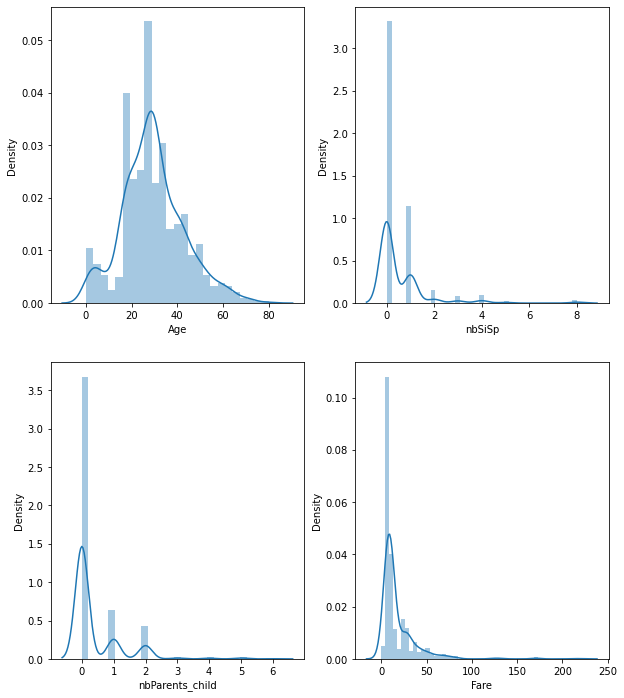

In [56]:
plot_multiple_histograms(train, (10, 12))

In [57]:
verif_normalite(train)

__
Age
p = 3.59294e-07
H0 is rejected : Age is not normally distributed
__
nbSiSp
p = 1.07126e-157
H0 is rejected : nbSiSp is not normally distributed
__
nbParents_child
p = 1.20611e-118
H0 is rejected : nbParents_child is not normally distributed
__
Fare
p = 1.53491e-184
H0 is rejected : Fare is not normally distributed


Les données n'étant pas normale, on supprime les outliers par la méthode des percentiles

In [58]:
delete_outliers_percentiles(train)

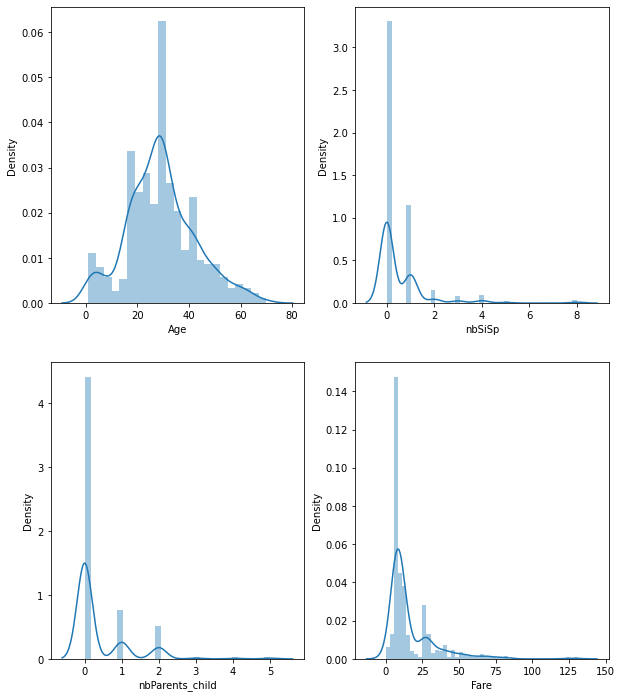

In [59]:
plot_multiple_histograms(train, (10, 12))

## <font color='green'>Conversion de donnée en intervalle de données</font>

### <font color='grey'>Age</font>

Mesures statistiques pour la variable Age
 
La moyenne de la variable Age est : 29.2 
La mediane de la variable Age est : 28.7 
Quartile Q1 vaut : 21.0 
Quartile Q3 vaut : 36.0 
Le maximum vaut : 70.0 
Le minimum vaut : 1.0 
 
 
Mesures de dispersion pour la variable Age
 
La variance de la variable Age est : 174.75 
L'écart type de la variable Age est : 13.22 
Le coefficient de variation de la variable Age est de : 0.45
L'écart interquartile de la variable Age est de : 15.0 
 
 
Mesures de forme pour la variable Age
 
Le skewewness empirique pour la variable Age est de 0.3212 
La distribution de la variable Age est étalée vers la droite.
 
Le Kurtosis empirique pour la variable Age est de 0.2667 
La distribution de la variable Age est moins applatie que la distribution normale, les observations sont plus concentrées.
 


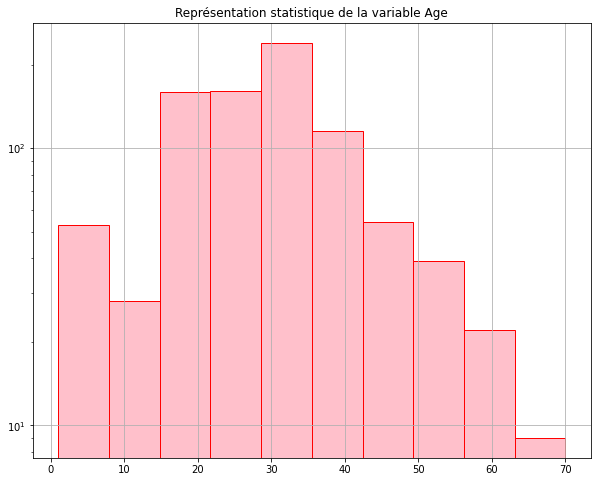

 
Boxplot pour la variable Age


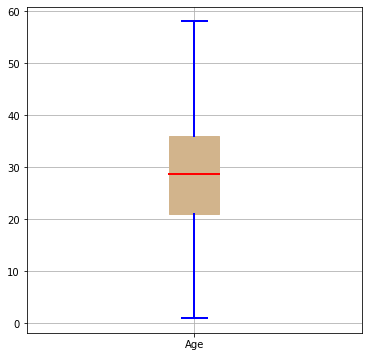

In [60]:
description_var(train, 'Age')

In [61]:
train['Age_bin'] = pd.cut(x=train['Age'],
                          bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
                          right=False)
#train['Age_bin'] = pd.cut(train['Age'], bins = np.linspace(0, 90, num = 10), right=False)

In [62]:
train['age_by_decade'] = pd.cut(train['Age'],
                                bins=np.linspace(0, 90, num=10),
                                labels=[
                                    'little_kid', '10s', '20s', '30s', '40s',
                                    '50s', '60s', '70s', '80s'
                                ])

In [63]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,nbSiSp,nbParents_child,Embarked,Title,Fare,Age_bin,age_by_decade
0,1,0,3,male,22.0,1.0,0.0,S,Mr,7.2500,"[20, 30)",20s
1,2,1,1,female,38.0,1.0,0.0,C,Mme,71.2833,"[30, 40)",30s
2,3,1,3,female,26.0,0.0,0.0,S,Miss,7.9250,"[20, 30)",20s
3,4,1,1,female,35.0,1.0,0.0,S,Mme,26.5500,"[30, 40)",30s
4,5,0,3,male,35.0,0.0,0.0,S,Mr,8.0500,"[30, 40)",30s


### <font color='grey'>Fare</font>

Mesures statistiques pour la variable Fare
 
La moyenne de la variable Fare est : 16.78 
La mediane de la variable Fare est : 8.75 
Quartile Q1 vaut : 7.75 
Quartile Q3 vaut : 21.17 
Le maximum vaut : 131.1875 
Le minimum vaut : 0.0 
 
 
Mesures de dispersion pour la variable Fare
 
La variance de la variable Fare est : 282.63 
L'écart type de la variable Fare est : 16.81 
Le coefficient de variation de la variable Fare est de : 1.0
L'écart interquartile de la variable Fare est de : 13.42 
 
 
Mesures de forme pour la variable Fare
 
Le skewewness empirique pour la variable Fare est de 2.7259 
La distribution de la variable Fare est étalée vers la droite.
 
Le Kurtosis empirique pour la variable Fare est de 10.1573 
La distribution de la variable Fare est moins applatie que la distribution normale, les observations sont plus concentrées.
 


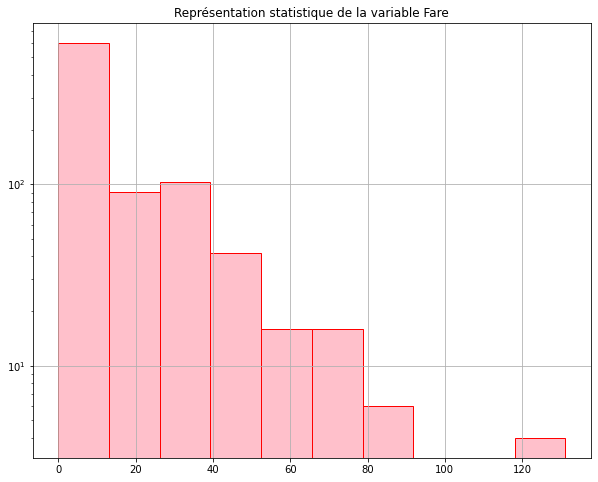

 
Boxplot pour la variable Fare


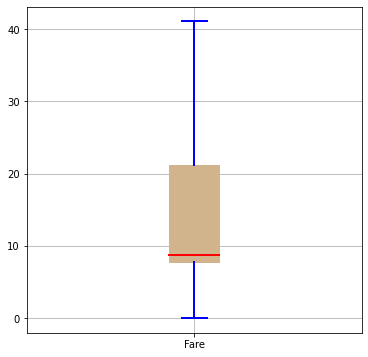

In [64]:
description_var(train, 'Fare')

In [65]:
train.loc[train['Fare'] == 0]

,PassengerId,Survived,Pclass,Sex,Age,nbSiSp,nbParents_child,Embarked,Title,Fare,Age_bin,age_by_decade
179,180,0,3,male,36.0,0.0,0.0,S,Mr,0.0,"[30, 40)",30s
263,264,0,1,male,40.0,0.0,0.0,S,Mr,0.0,"[40, 50)",30s
271,272,1,3,male,25.0,0.0,0.0,S,Mr,0.0,"[20, 30)",20s
277,278,0,2,male,32.8,0.0,0.0,S,Mr,0.0,"[30, 40)",30s
302,303,0,3,male,19.0,0.0,0.0,S,Mr,0.0,"[10, 20)",10s
413,414,0,2,male,32.8,0.0,0.0,S,Mr,0.0,"[30, 40)",30s
466,467,0,2,male,32.8,0.0,0.0,S,Mr,0.0,"[30, 40)",30s
481,482,0,2,male,32.8,0.0,0.0,S,Mr,0.0,"[30, 40)",30s
597,598,0,3,male,49.0,0.0,0.0,S,Mr,0.0,"[40, 50)",40s
633,634,0,1,male,41.6,0.0,0.0,S,Mr,0.0,"[40, 50)",40s


In [66]:
train.loc[train['Fare'] > 200]

,PassengerId,Survived,Pclass,Sex,Age,nbSiSp,nbParents_child,Embarked,Title,Fare,Age_bin,age_by_decade


In [67]:
train['Fare_bin'] = pd.cut(
    x=train['Fare'],
    bins=[0, 1, 10, 20, 30, 40, 50, 60, 70, 80, 150, 200, 250],
    right=False)
train['Fare_bin'] = train['Fare_bin'].astype('object')

In [68]:
"""train.loc[(train["Fare"] == 0) , "Fare_bin"]='[0, 0)'
train.loc[(train["Fare"] > 200), "Fare_bin"]='[200, 250)'"""

'train.loc[(train["Fare"] == 0) , "Fare_bin"]=\'[0, 0)\'\ntrain.loc[(train["Fare"] > 200), "Fare_bin"]=\'[200, 250)\''

In [69]:
train['Fare_bin'] = train['Fare_bin'].astype('category')

In [70]:
train['Fare_bin'].value_counts()

[1, 10)      469
[10, 20)     174
[20, 30)      92
[30, 40)      53
[40, 50)      26
[50, 60)      21
[0, 1)        15
[60, 70)      12
[70, 80)      10
[80, 150)      8
Name: Fare_bin, dtype: int64

In [71]:
train.dtypes

PassengerId          object
Survived             object
Pclass               object
Sex                  object
Age                 float64
nbSiSp              float64
nbParents_child     float64
Embarked             object
Title                object
Fare                float64
Age_bin            category
age_by_decade      category
Fare_bin           category
dtype: object

In [72]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,nbSiSp,nbParents_child,Embarked,Title,Fare,Age_bin,age_by_decade,Fare_bin
0,1,0,3,male,22.0,1.0,0.0,S,Mr,7.2500,"[20, 30)",20s,"[1, 10)"
1,2,1,1,female,38.0,1.0,0.0,C,Mme,71.2833,"[30, 40)",30s,"[70, 80)"
2,3,1,3,female,26.0,0.0,0.0,S,Miss,7.9250,"[20, 30)",20s,"[1, 10)"
3,4,1,1,female,35.0,1.0,0.0,S,Mme,26.5500,"[30, 40)",30s,"[20, 30)"
4,5,0,3,male,35.0,0.0,0.0,S,Mr,8.0500,"[30, 40)",30s,"[1, 10)"


## <font color='green'>Conversion des colonnes pour la modelisation</font>

In [73]:
one_hot = pd.get_dummies(train, columns=['Sex', 'Title'])

In [74]:
one_hot.drop(['Sex_female'], inplace=True, axis=1)

Comme Sex est du type binaire, une seule colonne doit être gardée car si ce n'est pas un homme, c'est une femme
For Sex :
A value of 0 represents “Female”
A value of 1 represents “Male

In [75]:
one_hot

,PassengerId,Survived,Pclass,Age,nbSiSp,nbParents_child,Embarked,Fare,Age_bin,age_by_decade,Fare_bin,Sex_male,Title_Kid,Title_Miss,Title_Mme,Title_Mr,Title_Officer,Title_Royalty
0,1,0,3,22.0,1.0,0.0,S,7.2500,"[20, 30)",20s,"[1, 10)",1,0,0,0,1,0,0
1,2,1,1,38.0,1.0,0.0,C,71.2833,"[30, 40)",30s,"[70, 80)",0,0,0,1,0,0,0
2,3,1,3,26.0,0.0,0.0,S,7.9250,"[20, 30)",20s,"[1, 10)",0,0,1,0,0,0,0
3,4,1,1,35.0,1.0,0.0,S,26.5500,"[30, 40)",30s,"[20, 30)",0,0,0,1,0,0,0
4,5,0,3,35.0,0.0,0.0,S,8.0500,"[30, 40)",30s,"[1, 10)",1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0.0,0.0,S,13.0000,"[20, 30)",20s,"[10, 20)",1,0,0,0,0,0,1
887,888,1,1,19.0,0.0,0.0,S,30.0000,"[10, 20)",10s,"[30, 40)",0,0,1,0,0,0,0
888,889,0,3,16.1,1.0,2.0,S,11.7250,"[10, 20)",10s,"[10, 20)",0,0,1,0,0,0,0
889,890,1,1,26.0,0.0,0.0,C,30.0000,"[20, 30)",20s,"[30, 40)",1,0,0,0,1,0,0


In [76]:
data_types_dict = {"Survived": 'int64', 'Pclass': 'int64'}

In [77]:
one_hot = one_hot.astype(data_types_dict)

Text(0.5, 1.0, 'Matrice de corrélation entre les différentes variables du jeu de données')

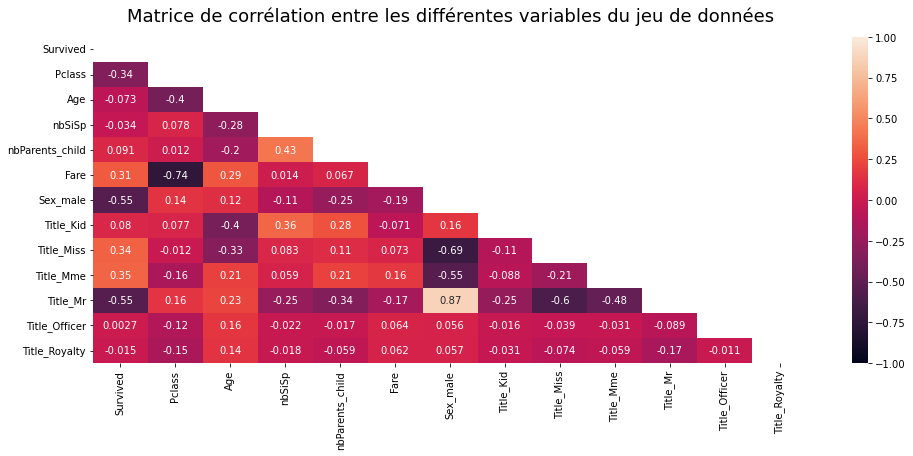

In [78]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(one_hot.corr(), dtype=np.bool))
heatmap = sns.heatmap(one_hot.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title(
    'Matrice de corrélation entre les différentes variables du jeu de données',
    fontdict={'fontsize': 18},
    pad=16)

In [79]:
one_hot.head()

,PassengerId,Survived,Pclass,Age,nbSiSp,nbParents_child,Embarked,Fare,Age_bin,age_by_decade,Fare_bin,Sex_male,Title_Kid,Title_Miss,Title_Mme,Title_Mr,Title_Officer,Title_Royalty
0,1,0,3,22.0,1.0,0.0,S,7.2500,"[20, 30)",20s,"[1, 10)",1,0,0,0,1,0,0
1,2,1,1,38.0,1.0,0.0,C,71.2833,"[30, 40)",30s,"[70, 80)",0,0,0,1,0,0,0
2,3,1,3,26.0,0.0,0.0,S,7.9250,"[20, 30)",20s,"[1, 10)",0,0,1,0,0,0,0
3,4,1,1,35.0,1.0,0.0,S,26.5500,"[30, 40)",30s,"[20, 30)",0,0,0,1,0,0,0
4,5,0,3,35.0,0.0,0.0,S,8.0500,"[30, 40)",30s,"[1, 10)",1,0,0,0,1,0,0


In [80]:
one_hot.dtypes

PassengerId          object
Survived              int64
Pclass                int64
Age                 float64
nbSiSp              float64
nbParents_child     float64
Embarked             object
Fare                float64
Age_bin            category
age_by_decade      category
Fare_bin           category
Sex_male              uint8
Title_Kid             uint8
Title_Miss            uint8
Title_Mme             uint8
Title_Mr              uint8
Title_Officer         uint8
Title_Royalty         uint8
dtype: object

In [81]:
one_hot.drop(['Embarked', 'Fare', 'Age_bin', 'age_by_decade', 'Fare_bin'],
             inplace=True,
             axis=1)

L'endroit où ont embarqué les personnes n'ont pas de lien avec le fait de survivre ou non
idem pour le prix du billet contrairement à la class.

In [82]:
one_hot.to_csv('train_cleaned.csv', index=False)

# <font color='red'>Informations et nettoyage du dataset test</font>

## <font color='green'>Informations générales</font>

In [83]:
test = pd.read_csv("test.csv")

In [84]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [85]:
info_generales(test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
 
 
 
Le jeu de données a 418 lignes et 11 colonnes.


pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex	

Age	Age in years	

sibsp	# of siblings / spouses aboard the Titanic	 Nombre de frères et sœurs / conjoints à bord du Titanic

parch	# of parents / children aboard the Titanic	 Nombre de parents / enfants à bord du Titanic

ticket	Ticket number	

fare	Passenger fare	

cabin	Cabin number	# numéro de cabine

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [86]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## <font color='green'>Type de données</font>

In [87]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [88]:
data_types_dict = {'PassengerId': object, 'Pclass': object}
test = test.astype(data_types_dict)

In [89]:
test.dtypes

PassengerId     object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [90]:
train['Age'] = train['Age'].round()

## <font color='green'>Doublons</font>

In [91]:
duplicate(test, 'PassengerId')

Nombre de lignes dupliquées supprimées : 0


Il n'y a pas de doublon

## <font color='green'>Données manquantes</font>

Le jeux de données est rempli à 91.00%
et il a 9.00% de données manquantes
 
 


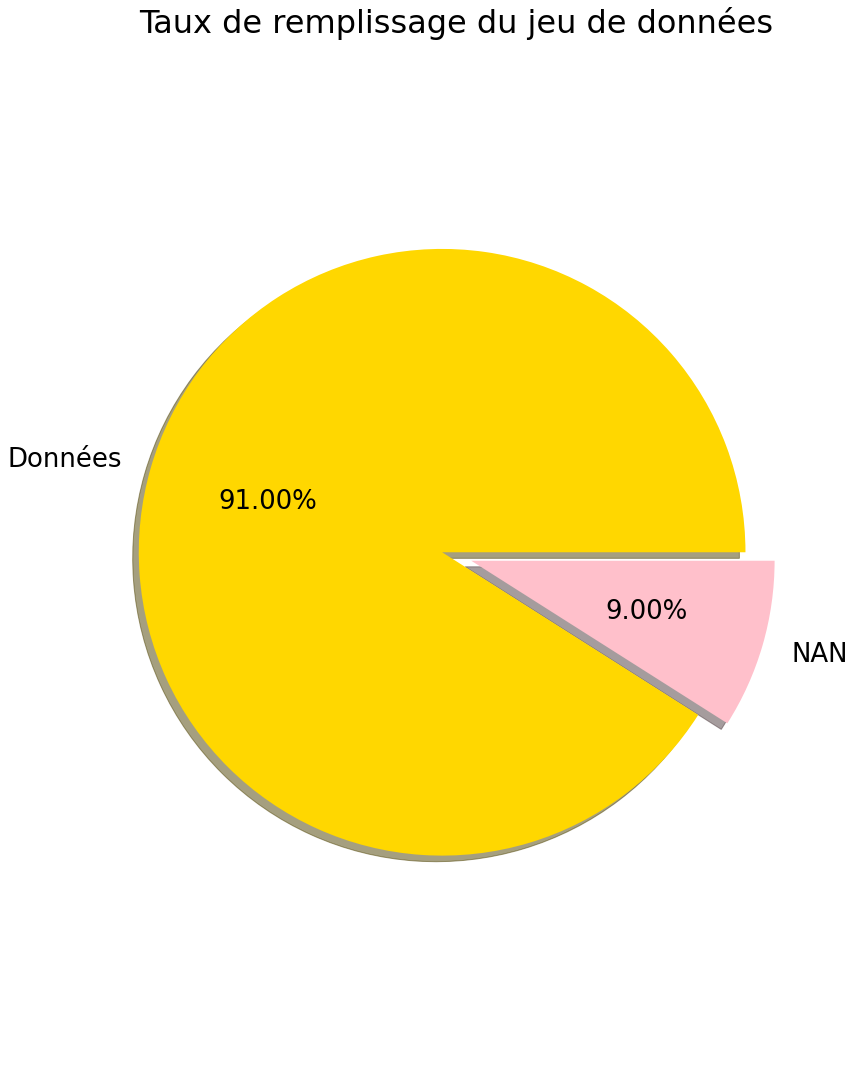

In [92]:
pie_NaN(test, (12, 15))

In [93]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

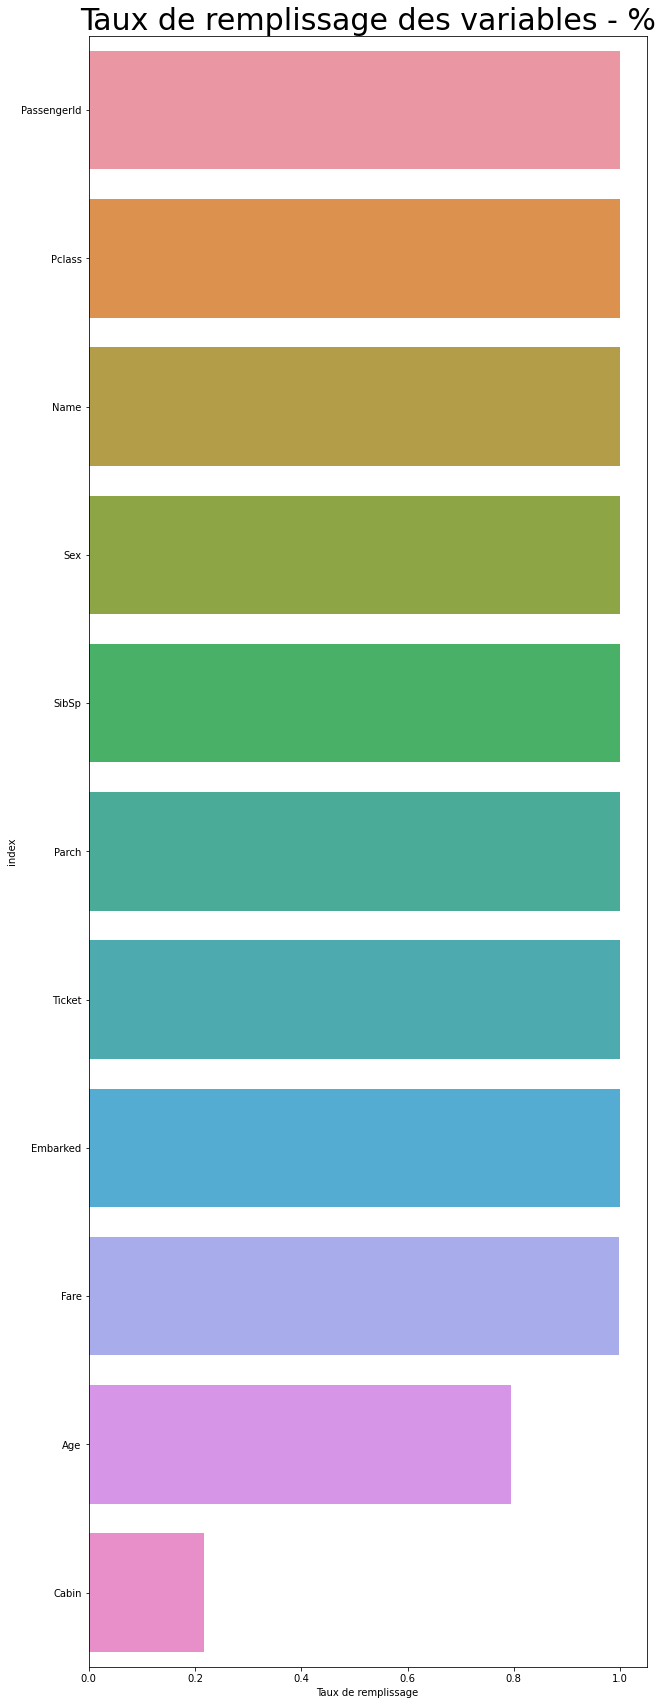

In [94]:
graphe_remplissage_variable(test, (10, 30))

Les données manquantes se situent au niveau de l'âge, du numéro de cabine et si oui ou non ils ont embarqués.

## <font color='green'>Filtration colonne</font>

Suppression des colonnes avec 20 % de données manquantes

In [95]:
test = filtration_columns(test, 0.7)

Number of columns with a fill rate greater than 70.00%: 10 columns.
Number of deleted columns: 1 columns




In [96]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Suppression des colonnes Ticket (num"ro du ticket) et Name(nom du passager) qui sont propre à chaque passager et ne permettent pas de prévoir si oui ou non le passager va survivre.

Le jeux de données est rempli à 97.92%
et il a 2.08% de données manquantes
 
 


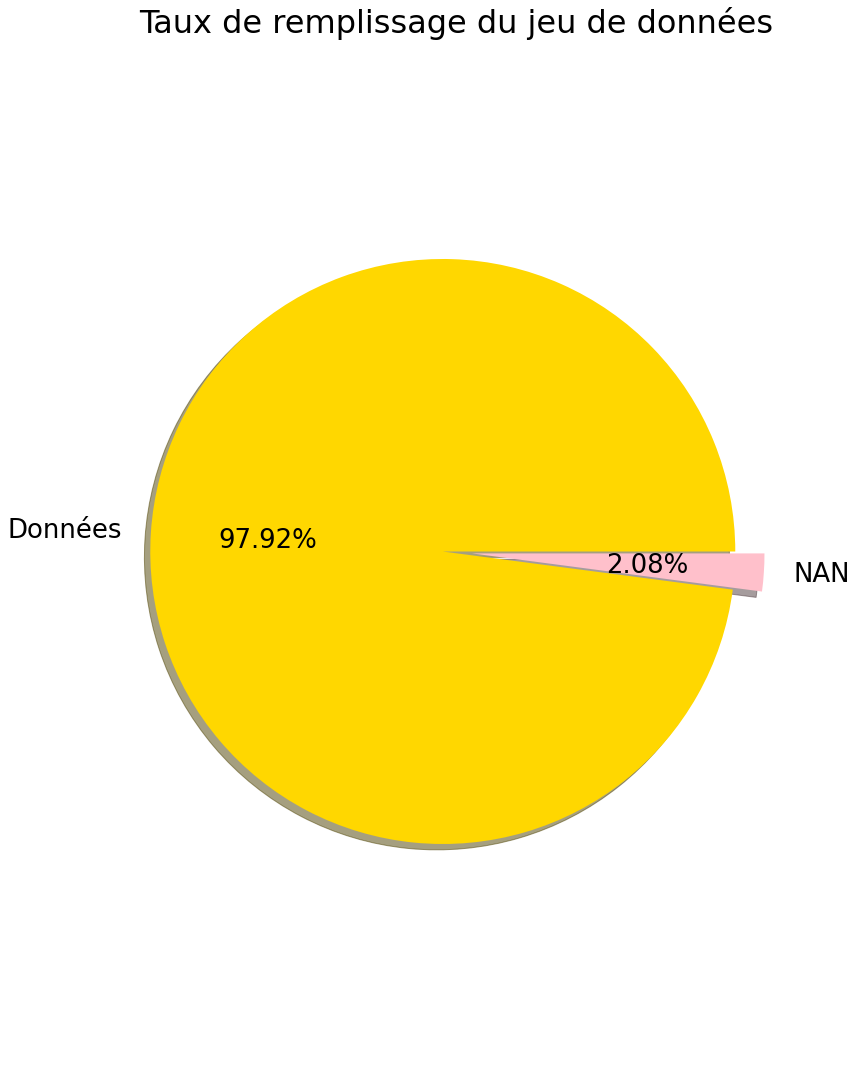

In [97]:
pie_NaN(test, (12, 15))

In [98]:
test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

Les données manquantes restantes se trouve pour l'âge des clients et un prix de billet..

## <font color='green'>Imputation</font>

### <font color='grey'>Age</font>

Imputation de l'âge selon le titre de chaqu personne pour définir si il s'agit d'un enfant ou autres et selon la classe sur le bateau

In [99]:
test['Title'] = test["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

In [100]:
test.groupby(['Title', 'Pclass'])['Age'].agg(['mean', 'count'])

mean  count
Title  Pclass                  
Col    1       50.000000      2
Dona   1       39.000000      1
Dr     1       53.000000      1
Master 1        9.500000      2
       2        5.000000      2
       3        7.454615     13
Miss   1       31.428571     14
       2       17.370000     16
       3       19.872647     34
Mr     1       41.200000     45
       2       31.718182     55
       3       27.198795     83
Mrs    1       45.606061     33
       2       33.000000     13
       3       29.875000     16
Ms     3             NaN      0
Rev    2       35.500000      2

on réduit le nombre de groupe en regroupant certains titre

In [101]:
TitleDict = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Dona": "Royalty",
    "Sir": "Royalty",
    "Dr": "Royalty",
    "Rev": "Royalty",
    "Countess": "Royalty",
    "Lady": "Royalty",
    "Mme": "Mme",  #Mrs = femme mariée = Mme
    "Mlle": "Miss",
    "Ms": "Miss",  #Ms on ne peut pas dire si la personne est mariée ou non
    "Mr": "Mr",
    "Mrs": "Mme",  #Mrs signifie femme mariée = Mme
    "Miss": "Miss",  #Miss
    "Master": "Kid"
}  #Master

In [102]:
test['Title'] = test['Title'].map(TitleDict)

In [103]:
test.groupby(['Title', 'Pclass'])['Age'].agg(['mean', 'count'])

mean  count
Title   Pclass                  
Kid     1        9.500000      2
        2        5.000000      2
        3        7.454615     13
Miss    1       31.428571     14
        2       17.370000     16
        3       19.872647     34
Mme     1       45.606061     33
        2       33.000000     13
        3       29.875000     16
Mr      1       41.200000     45
        2       31.718182     55
        3       27.198795     83
Officer 1       50.000000      2
Royalty 1       46.000000      2
        2       35.500000      2

Imputation par la moyenne arrondie de chaque classe

In [104]:
test['Age'].fillna(test.groupby(['Pclass', 'Sex',
                                 'Title'])['Age'].transform('mean').round(1),
                   inplace=True)

In [105]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
Title          0
dtype: int64

### <font color='grey'>Fare</font>

Certains ticket se retrouveplusieurs fois pour des passagers différents. il ne s'agit pas de doublons mais le fait que plusieur personnes peuvent ête sur le même ticket

Création dune colonne donnant le nombre de personne par ticket

In [106]:
test['PeoplePerTicket'] = test['Ticket'].map(test['Ticket'].value_counts())

Création dune colonne avec le prix déduit par personne quand il y a plusieurs personnes sur un ticket

In [107]:
test['FarePerPerson'] = test['Fare'] / test['PeoplePerTicket']

In [108]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,PeoplePerTicket,FarePerPerson
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr,1,7.8292
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mme,1,7.0000
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr,1,9.6875
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr,1,8.6625
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mme,1,12.2875


In [109]:
print(test.loc[test['Fare'].isna()])

    PassengerId Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152        1044      3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Embarked Title  PeoplePerTicket  FarePerPerson  
152   NaN        S    Mr                1            NaN  


Cette personne est en classe 3, c'est un homme avec pour titre Mr et il a embarqué à S. Il reste à déterminer à partir le prix moyen payé par cette personne à partir de la classe 3, de quelle endroit elles sont montées et du titre de la personne.

In [110]:
test.groupby(['Pclass', 'Embarked', 'Title'])['FarePerPerson'].agg(['mean'])

mean
Pclass Embarked Title              
1      C        Kid       48.654167
                Miss      44.217192
                Mme       91.782121
                Mr        49.313106
                Officer  128.012500
                Royalty  108.900000
       Q        Mme       90.000000
       S        Miss     100.253708
                Mme       52.665373
                Mr        37.887254
                Royalty   40.929150
2      C        Miss      27.718750
                Mme       32.362500
                Mr        14.451771
       Q        Mr        11.273950
       S        Kid       13.875000
                Miss      20.574405
                Mme       16.614583
                Mr        15.780382
                Royalty   19.500000
3      C        Kid       13.114050
                Miss       7.622900
                Mme        9.773529
                Mr         8.399196
       Q        Kid       29.125000
                Miss       9.051813
                Mr         7.743629
       S        Kid       11.447914
                Miss      11.367669
                Mme       12.316926
                Mr         9.864391

Lorsque l'on regarde le prix moyen d'un billet en classe 3, d'une personne qui est monté en S et qu'il s'agit d'un homme. L'homme aurait payé en moyenne 9,86.

In [111]:
test['FarePerPerson'].fillna(9.86, inplace=True)

Comme le billet que l'homme a acheté n'était que pour 1 personne alors le prix total du billet peut être imputer par ce même tarif.

In [112]:
test['Fare'].fillna(9.86, inplace=True)

In [113]:
test.isna().sum()

PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Embarked           0
Title              0
PeoplePerTicket    0
FarePerPerson      0
dtype: int64

## <font color='green'>Sélection colonne</font>

In [114]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,PeoplePerTicket,FarePerPerson
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr,1,7.8292
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mme,1,7.0000
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr,1,9.6875
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr,1,8.6625
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mme,1,12.2875


In [115]:
test.drop(['Name', 'Ticket', 'Fare', 'PeoplePerTicket'], inplace=True, axis=1)

L'endroit où ont embarqué les personnes n'ont pas de lien avec le fait de survivre ou non
idem pour le prix du billet contrairement à la class.

In [116]:
test.rename(columns={
    'SibSp': 'nbSiSp',
    'Parch': 'nbParents_child',
    'FarePerPerson': 'Fare'
},
            inplace=True)

In [117]:
test.head()

,PassengerId,Pclass,Sex,Age,nbSiSp,nbParents_child,Embarked,Title,Fare
0,892,3,male,34.5,0,0,Q,Mr,7.8292
1,893,3,female,47.0,1,0,S,Mme,7.0000
2,894,2,male,62.0,0,0,Q,Mr,9.6875
3,895,3,male,27.0,0,0,S,Mr,8.6625
4,896,3,female,22.0,1,1,S,Mme,12.2875


## <font color='green'>Conversion de donnée en intervalle de données</font>

### <font color='grey'>Age</font>

Mesures statistiques pour la variable Age
 
La moyenne de la variable Age est : 29.61 
La mediane de la variable Age est : 27.2 
Quartile Q1 vaut : 21.25 
Quartile Q3 vaut : 36.38 
Le maximum vaut : 76.0 
Le minimum vaut : 0.17 
 
 
Mesures de dispersion pour la variable Age
 
La variance de la variable Age est : 171.84 
L'écart type de la variable Age est : 13.11 
Le coefficient de variation de la variable Age est de : 0.44
L'écart interquartile de la variable Age est de : 15.12 
 
 
Mesures de forme pour la variable Age
 
Le skewewness empirique pour la variable Age est de 0.5565 
La distribution de la variable Age est étalée vers la droite.
 
Le Kurtosis empirique pour la variable Age est de 0.5492 
La distribution de la variable Age est moins applatie que la distribution normale, les observations sont plus concentrées.
 


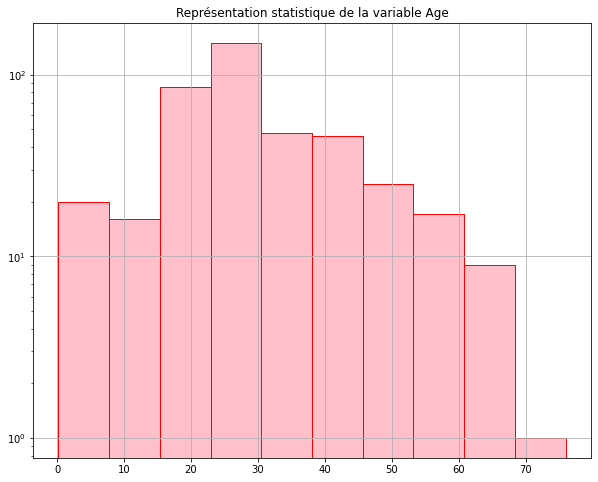

 
Boxplot pour la variable Age


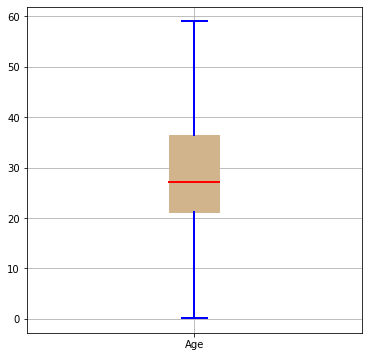

In [118]:
description_var(test, 'Age')

In [119]:
test['Age_bin'] = pd.cut(x=test['Age'],
                         bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
                         right=False)
#train['Age_bin'] = pd.cut(train['Age'], bins = np.linspace(0, 90, num = 10), right=False)

In [120]:
test['age_by_decade'] = pd.cut(test['Age'],
                               bins=np.linspace(0, 90, num=10),
                               labels=[
                                   'little_kid', '10s', '20s', '30s', '40s',
                                   '50s', '60s', '70s', '80s'
                               ])

In [121]:
test.head()

,PassengerId,Pclass,Sex,Age,nbSiSp,nbParents_child,Embarked,Title,Fare,Age_bin,age_by_decade
0,892,3,male,34.5,0,0,Q,Mr,7.8292,"[30, 40)",30s
1,893,3,female,47.0,1,0,S,Mme,7.0000,"[40, 50)",40s
2,894,2,male,62.0,0,0,Q,Mr,9.6875,"[60, 70)",60s
3,895,3,male,27.0,0,0,S,Mr,8.6625,"[20, 30)",20s
4,896,3,female,22.0,1,1,S,Mme,12.2875,"[20, 30)",20s


### <font color='grey'>Fare</font>

Mesures statistiques pour la variable Fare
 
La moyenne de la variable Fare est : 24.14 
La mediane de la variable Fare est : 12.35 
Quartile Q1 vaut : 7.85 
Quartile Q3 vaut : 26.55 
Le maximum vaut : 512.3292 
Le minimum vaut : 0.0 
 
 
Mesures de dispersion pour la variable Fare
 
La variance de la variable Fare est : 1357.64 
L'écart type de la variable Fare est : 36.85 
Le coefficient de variation de la variable Fare est de : 1.53
L'écart interquartile de la variable Fare est de : 18.7 
 
 
Mesures de forme pour la variable Fare
 
Le skewewness empirique pour la variable Fare est de 7.2873 
La distribution de la variable Fare est étalée vers la droite.
 
Le Kurtosis empirique pour la variable Fare est de 79.9335 
La distribution de la variable Fare est moins applatie que la distribution normale, les observations sont plus concentrées.
 


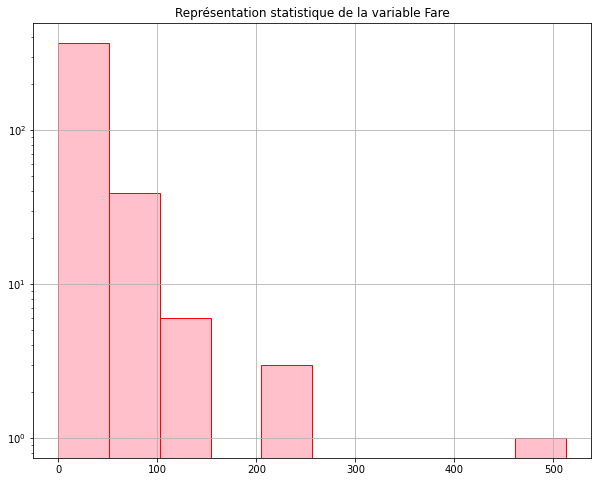

 
Boxplot pour la variable Fare


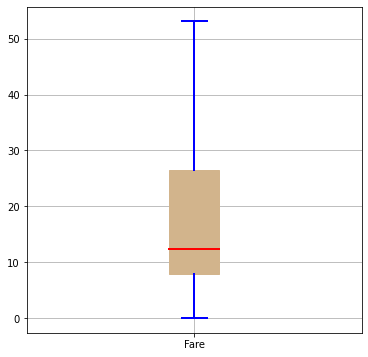

In [122]:
description_var(test, 'Fare')

In [123]:
test.loc[test['Fare'] == 0]

,PassengerId,Pclass,Sex,Age,nbSiSp,nbParents_child,Embarked,Title,Fare,Age_bin,age_by_decade
266,1158,1,male,41.2,0,0,S,Mr,0.0,"[40, 50)",40s
372,1264,1,male,49.0,0,0,S,Mr,0.0,"[40, 50)",40s


In [124]:
test.loc[test['Fare'] > 200]

,PassengerId,Pclass,Sex,Age,nbSiSp,nbParents_child,Embarked,Title,Fare,Age_bin,age_by_decade
184,1076,1,female,27.0,1,1,C,Mme,247.5208,"[20, 30)",20s
202,1094,1,male,47.0,1,0,C,Officer,227.5250,"[40, 50)",40s
324,1216,1,female,39.0,0,0,S,Miss,211.3375,"[30, 40)",30s
343,1235,1,female,58.0,0,1,C,Mme,512.3292,"[50, 60)",50s


In [125]:
test['Fare_bin'] = pd.cut(
    x=test['Fare'],
    bins=[0, 1, 10, 20, 30, 40, 50, 60, 70, 80, 150, 200, 520],
    right=False)
test['Fare_bin'] = test['Fare_bin'].astype('object')

In [126]:
"""train.loc[(train["Fare"] == 0) , "Fare_bin"]='[0, 0)'
train.loc[(train["Fare"] > 200), "Fare_bin"]='[200, 250)'"""

'train.loc[(train["Fare"] == 0) , "Fare_bin"]=\'[0, 0)\'\ntrain.loc[(train["Fare"] > 200), "Fare_bin"]=\'[200, 250)\''

In [127]:
test['Fare_bin'] = test['Fare_bin'].astype('category')

In [128]:
test['Fare_bin'].value_counts()

[1, 10)       167
[10, 20)      105
[20, 30)       61
[50, 60)       20
[30, 40)       16
[40, 50)       16
[70, 80)       11
[80, 150)      10
[60, 70)        6
[200, 520)      4
[0, 1)          2
Name: Fare_bin, dtype: int64

In [129]:
test.dtypes

PassengerId          object
Pclass               object
Sex                  object
Age                 float64
nbSiSp                int64
nbParents_child       int64
Embarked             object
Title                object
Fare                float64
Age_bin            category
age_by_decade      category
Fare_bin           category
dtype: object

In [130]:
test.head()

,PassengerId,Pclass,Sex,Age,nbSiSp,nbParents_child,Embarked,Title,Fare,Age_bin,age_by_decade,Fare_bin
0,892,3,male,34.5,0,0,Q,Mr,7.8292,"[30, 40)",30s,"[1, 10)"
1,893,3,female,47.0,1,0,S,Mme,7.0000,"[40, 50)",40s,"[1, 10)"
2,894,2,male,62.0,0,0,Q,Mr,9.6875,"[60, 70)",60s,"[1, 10)"
3,895,3,male,27.0,0,0,S,Mr,8.6625,"[20, 30)",20s,"[1, 10)"
4,896,3,female,22.0,1,1,S,Mme,12.2875,"[20, 30)",20s,"[10, 20)"


## <font color='green'>Convertir des colonnes pour la modelisation</font>

In [131]:
one_hot = pd.get_dummies(test, columns=['Sex', 'Title'])

In [132]:
one_hot.head()

,PassengerId,Pclass,Age,nbSiSp,nbParents_child,Embarked,Fare,Age_bin,age_by_decade,Fare_bin,Sex_female,Sex_male,Title_Kid,Title_Miss,Title_Mme,Title_Mr,Title_Officer,Title_Royalty
0,892,3,34.5,0,0,Q,7.8292,"[30, 40)",30s,"[1, 10)",0,1,0,0,0,1,0,0
1,893,3,47.0,1,0,S,7.0000,"[40, 50)",40s,"[1, 10)",1,0,0,0,1,0,0,0
2,894,2,62.0,0,0,Q,9.6875,"[60, 70)",60s,"[1, 10)",0,1,0,0,0,1,0,0
3,895,3,27.0,0,0,S,8.6625,"[20, 30)",20s,"[1, 10)",0,1,0,0,0,1,0,0
4,896,3,22.0,1,1,S,12.2875,"[20, 30)",20s,"[10, 20)",1,0,0,0,1,0,0,0


In [133]:
one_hot.drop(['Sex_female'], inplace=True, axis=1)

Comme Sex est du type binaire, une seule colonne doit être gardée car si ce n'est pas un homme, c'est une femme
For Sex :
A value of 0 represents “Female”
A value of 1 represents “Male

In [134]:
data_types_dict = {'Pclass': 'int64'}

In [135]:
one_hot = one_hot.astype(data_types_dict)

In [136]:
one_hot.head()

,PassengerId,Pclass,Age,nbSiSp,nbParents_child,Embarked,Fare,Age_bin,age_by_decade,Fare_bin,Sex_male,Title_Kid,Title_Miss,Title_Mme,Title_Mr,Title_Officer,Title_Royalty
0,892,3,34.5,0,0,Q,7.8292,"[30, 40)",30s,"[1, 10)",1,0,0,0,1,0,0
1,893,3,47.0,1,0,S,7.0000,"[40, 50)",40s,"[1, 10)",0,0,0,1,0,0,0
2,894,2,62.0,0,0,Q,9.6875,"[60, 70)",60s,"[1, 10)",1,0,0,0,1,0,0
3,895,3,27.0,0,0,S,8.6625,"[20, 30)",20s,"[1, 10)",1,0,0,0,1,0,0
4,896,3,22.0,1,1,S,12.2875,"[20, 30)",20s,"[10, 20)",0,0,0,1,0,0,0


In [137]:
one_hot.dtypes

PassengerId          object
Pclass                int64
Age                 float64
nbSiSp                int64
nbParents_child       int64
Embarked             object
Fare                float64
Age_bin            category
age_by_decade      category
Fare_bin           category
Sex_male              uint8
Title_Kid             uint8
Title_Miss            uint8
Title_Mme             uint8
Title_Mr              uint8
Title_Officer         uint8
Title_Royalty         uint8
dtype: object

In [138]:
one_hot.drop(['Embarked', 'Fare', 'Age_bin', 'age_by_decade', 'Fare_bin'],
             inplace=True,
             axis=1)

In [139]:
one_hot.to_csv('test_cleaned.csv', index=False)

# <font color='red'>Analyse Exploratoire du dataset Train</font>

In [140]:
train

,PassengerId,Survived,Pclass,Sex,Age,nbSiSp,nbParents_child,Embarked,Title,Fare,Age_bin,age_by_decade,Fare_bin
0,1,0,3,male,22.0,1.0,0.0,S,Mr,7.2500,"[20, 30)",20s,"[1, 10)"
1,2,1,1,female,38.0,1.0,0.0,C,Mme,71.2833,"[30, 40)",30s,"[70, 80)"
2,3,1,3,female,26.0,0.0,0.0,S,Miss,7.9250,"[20, 30)",20s,"[1, 10)"
3,4,1,1,female,35.0,1.0,0.0,S,Mme,26.5500,"[30, 40)",30s,"[20, 30)"
4,5,0,3,male,35.0,0.0,0.0,S,Mr,8.0500,"[30, 40)",30s,"[1, 10)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0.0,0.0,S,Royalty,13.0000,"[20, 30)",20s,"[10, 20)"
887,888,1,1,female,19.0,0.0,0.0,S,Miss,30.0000,"[10, 20)",10s,"[30, 40)"
888,889,0,3,female,16.0,1.0,2.0,S,Miss,11.7250,"[10, 20)",10s,"[10, 20)"
889,890,1,1,male,26.0,0.0,0.0,C,Mr,30.0000,"[20, 30)",20s,"[30, 40)"


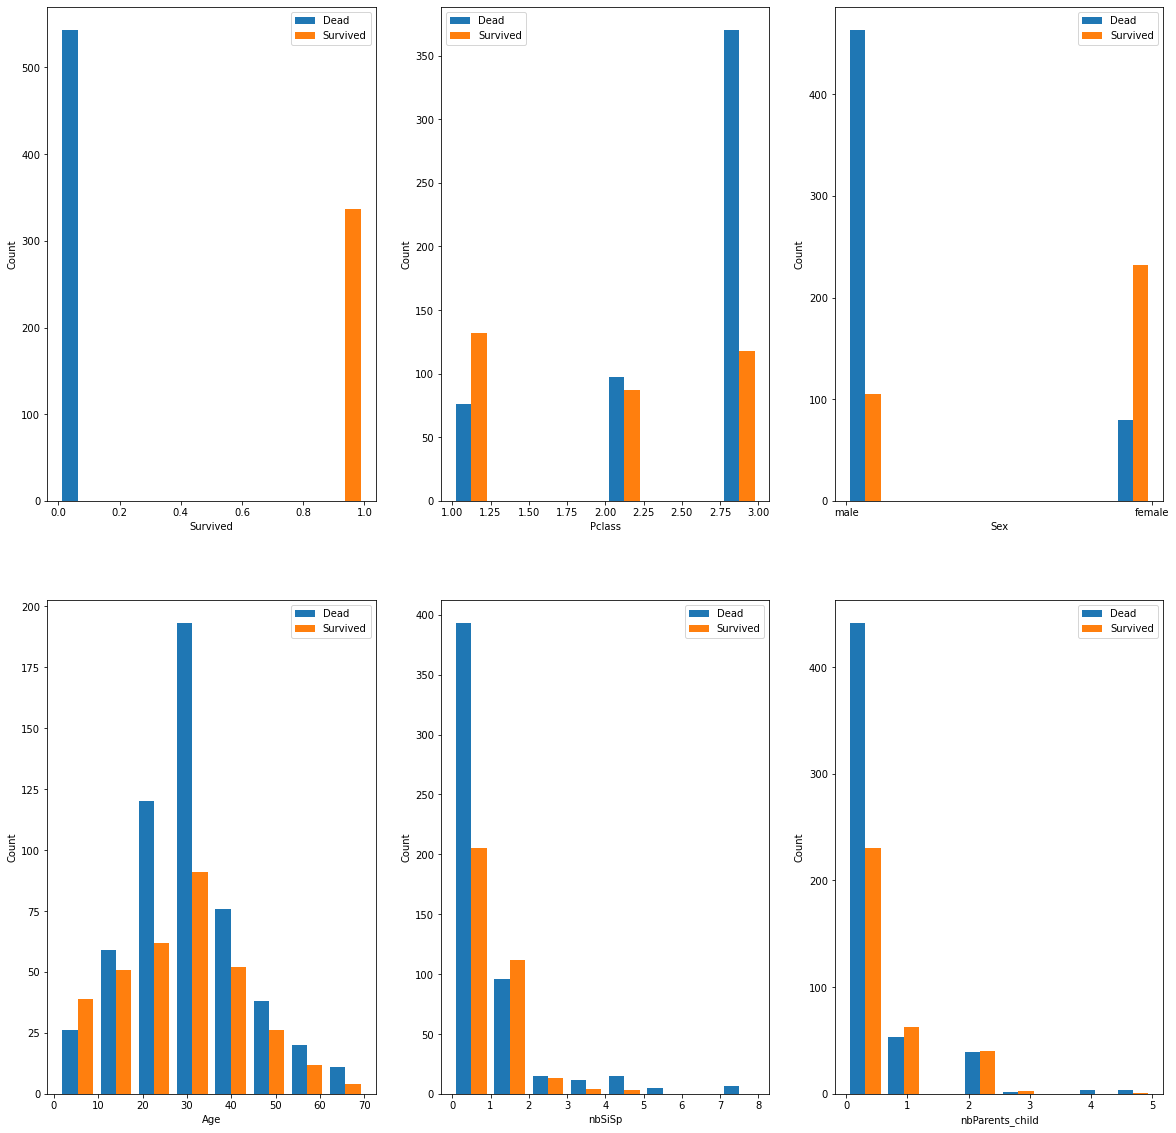

In [141]:
features = ['Survived', 'Pclass', 'Sex', 'Age', 'nbSiSp', 'nbParents_child']
plt.figure(figsize=(20, 20))

for ftr in range(len(features)):
    plt.subplot(2, 3, ftr + 1)
    plt.hist([
        train[train['Survived'] == 0][features[ftr]],
        train[train['Survived'] == 1][features[ftr]]
    ],
             bins=8,
             label=["Dead", "Survived"])
    plt.legend()
    plt.xlabel(features[ftr])
    plt.ylabel('Count')

plt.show()

in Pclass, Peaple in higher Class like 1 and 2 had more survival chance as compared to Class 3
Majority of Male Died, but majoirity of Female survived. (In rescue boats, initially only Children and ladies were allowed, as a common practice)
in Age group only Kids had more survival chance, same reason before
Age group 20-30 had worst survival rate than all others
in SibSp with 1 or 2 Siblings had better chance of surviving, If siblings aboard it's more likely these are kids than adult siblings traveling together
Similar trend in Parch as well. If they had 1,2 or 3 parents or kids aboard, they have much higher chance of surviving

## <font color='green'>Colonne : Survived</font>

### <font color='grey'>Analyse Univariée</font>

Survival	0 = No, 1 = Yes

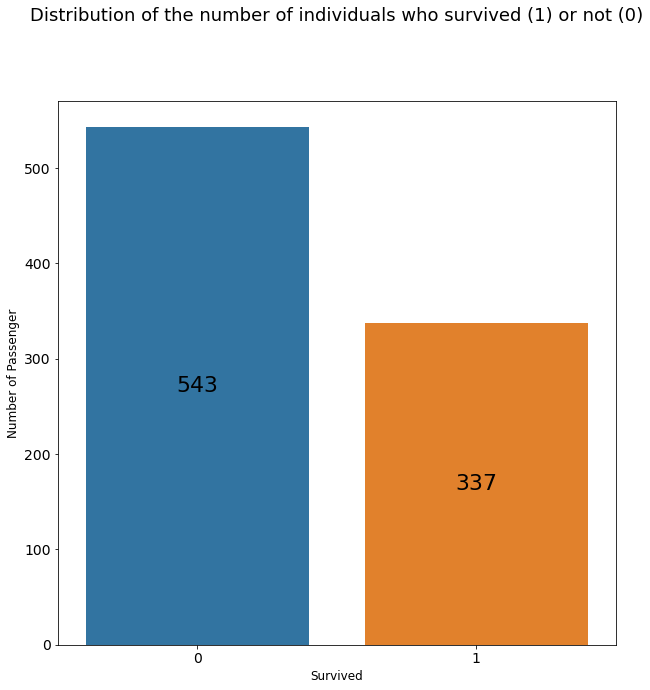

In [142]:
barplot((10, 10), train, 'Survived')

plt.title(
    'Distribution of the number of individuals who survived (1) or not (0)',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("Survived", size=12)
plt.ylabel("Number of Passenger", size=12)

plt.show()

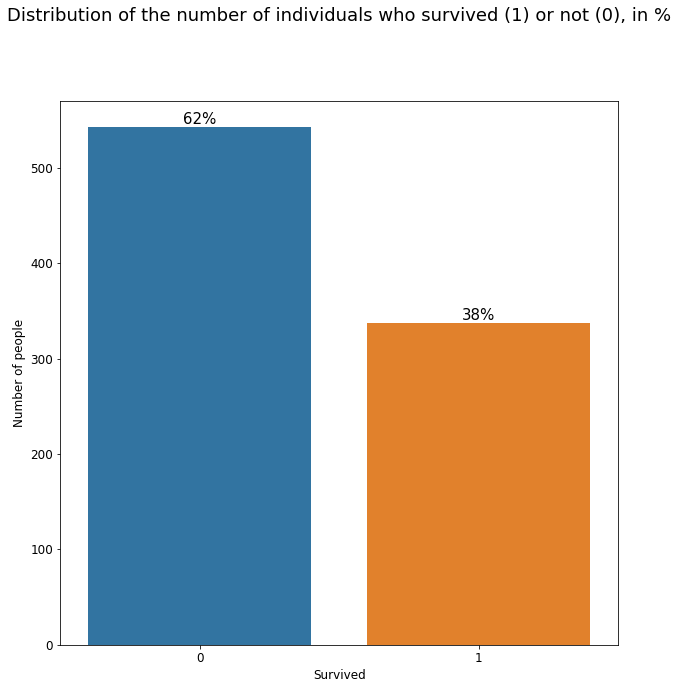

In [143]:
ax = countplot((10, 10), train, 'Survived')

plt.title(
    'Distribution of the number of individuals who survived (1) or not (0), in %',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("Survived", size=12)
plt.ylabel("Number of people", size=12)

print_without_hue(ax, train['Survived'])

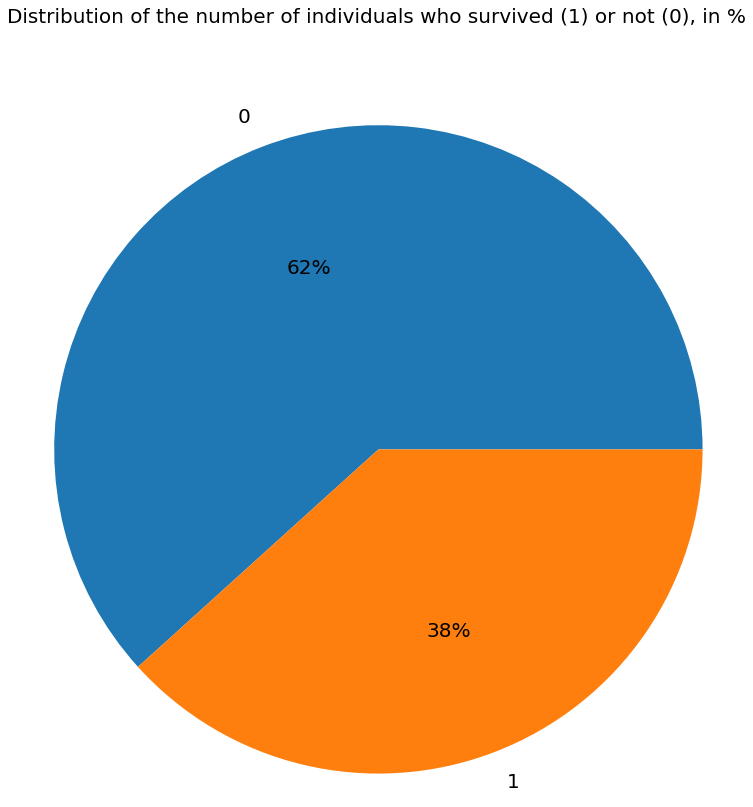

In [144]:
pie_plot((10, 10), train, 'Survived')

plt.title(
    "Distribution of the number of individuals who survived (1) or not (0), in %",
    fontsize=20,
    pad=80,
    loc='center')
plt.show()

## <font color='green'>Colonne : Pclass</font>

### <font color='grey'>Analyse Univariée</font>

sum of the data for each column according to the class in which the passenger was

1 = 1st, 2 = 2nd, 3 = 3rd

In [145]:
print(train[['Pclass', 'Survived']].groupby('Pclass').count())

        Survived
Pclass          
1            208
2            184
3            488


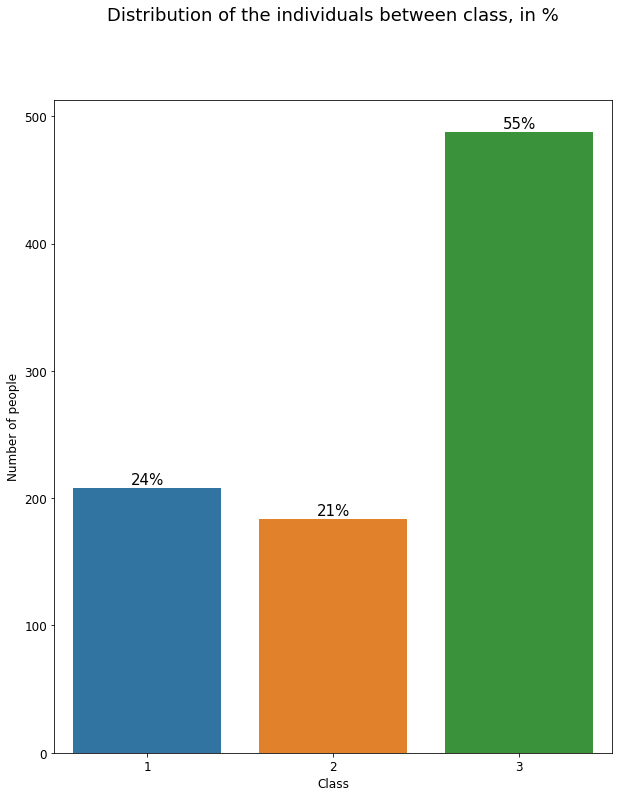

In [146]:
ax = countplot((10, 12), train, 'Pclass')

plt.title('Distribution of the individuals between class, in %',
          size=18,
          loc='center',
          pad=80)
plt.xlabel("Class", size=12)
plt.ylabel("Number of people", size=12)

print_without_hue(ax, train['Pclass'])

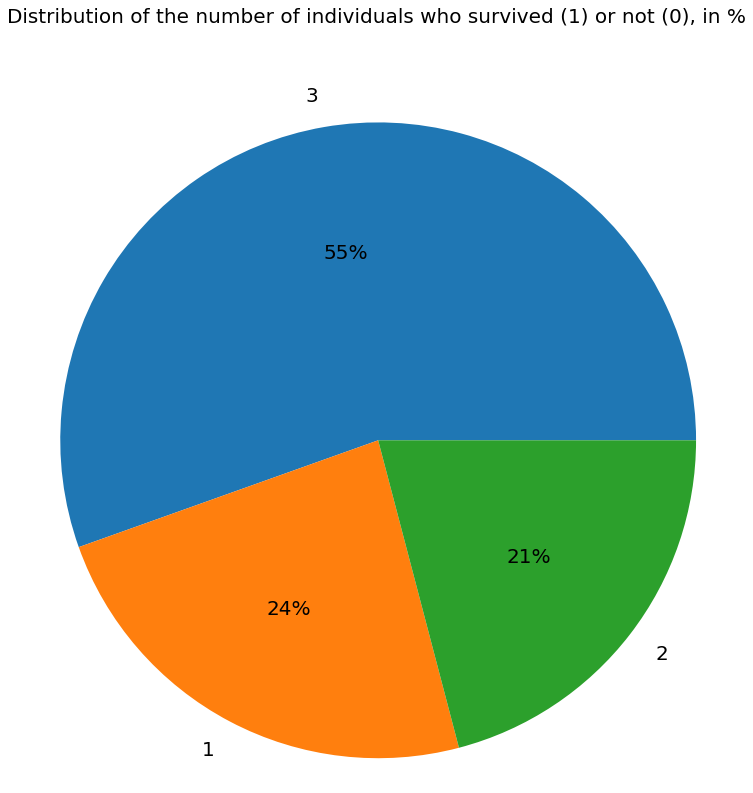

In [147]:
pie_plot((10, 10), train, 'Pclass')

plt.title(
    "Distribution of the number of individuals who survived (1) or not (0), in %",
    fontsize=20,
    pad=80,
    loc='center')
plt.show()

### <font color='grey'>Analyse Multivariée</font>

Selon les classe, combien de personnes ont suivécu Survived col=1

In [148]:
print(train[['Pclass', 'Survived']].groupby('Pclass').count())

        Survived
Pclass          
1            208
2            184
3            488


La somme des personnes qui ont survécu n'est pas pertinente car chaque classe n'a pas le ême nombre de passager. Il faut mettre en pourcentage pour avoir une meilleure vue générale.

In [149]:
print(round((train[['Pclass', 'Survived']].groupby('Pclass').mean()) * 100))

        Survived
Pclass          
1           63.0
2           47.0
3           24.0


63 % de la classe 1 à survécu, 47% de la 2 et 24% de la 3

In [150]:
print(
    round((train[['Pclass', 'Survived', 'Sex']].groupby(['Pclass', 'Sex'
                                                         ]).mean()) * 100))

               Survived
Pclass Sex             
1      female      97.0
       male        37.0
2      female      92.0
       male        16.0
3      female      50.0
       male        13.0


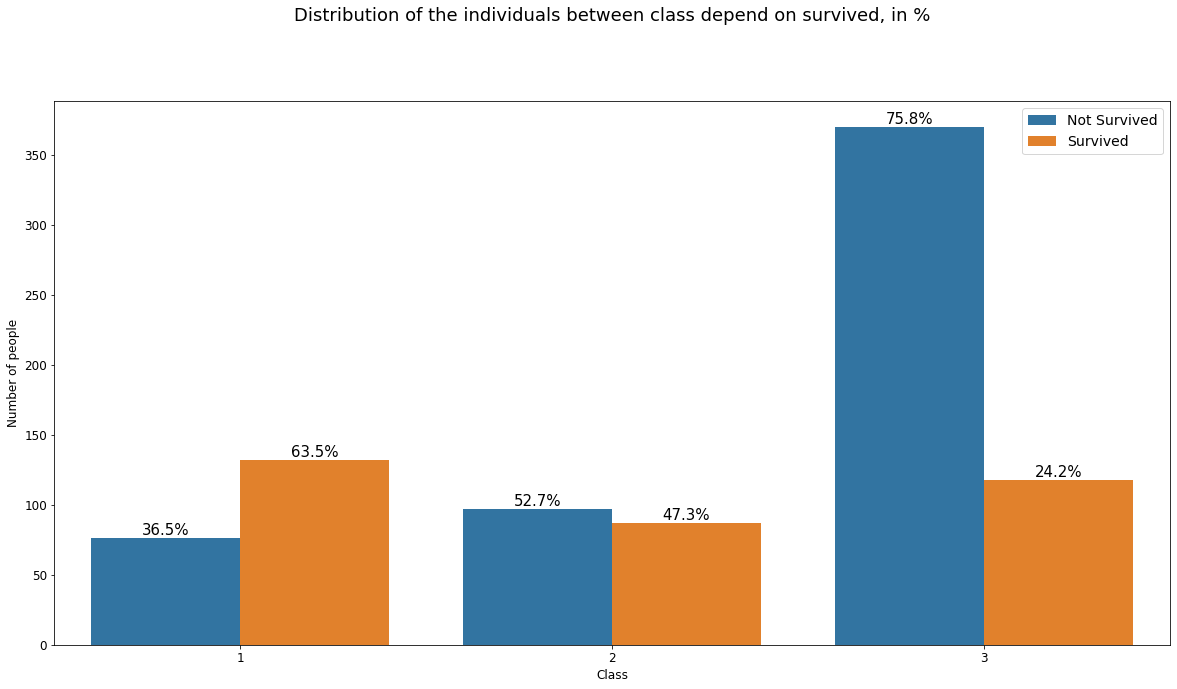

In [151]:
ax = countplot_with_hue((20, 10), train, 'Pclass', 'Survived')
plt.title(
    'Distribution of the individuals between class depend on survived, in %',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("Class", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14, labels=["Not Survived", "Survived"])
print_with_hue_01(train, 'Pclass', ax)

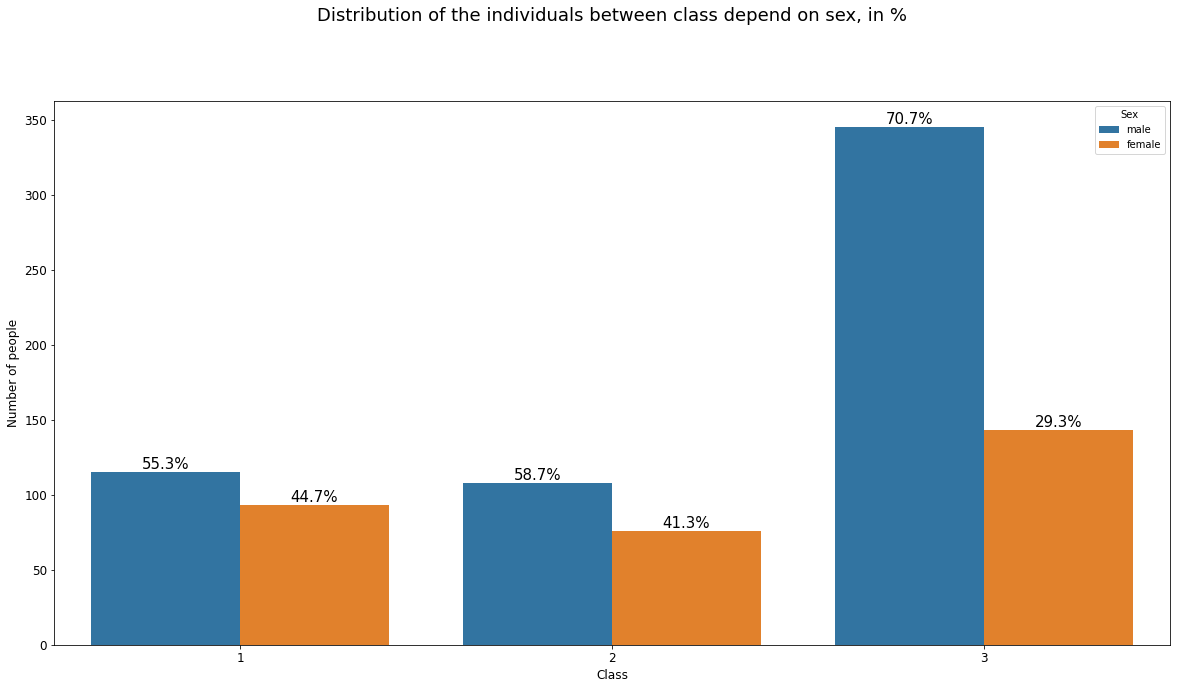

In [152]:
ax = countplot_with_hue((20, 10), train, 'Pclass', 'Sex')
plt.title('Distribution of the individuals between class depend on sex, in %',
          size=18,
          loc='center',
          pad=80)
plt.xlabel("Class", size=12)
plt.ylabel("Number of people", size=12)
print_with_hue_01(train, 'Pclass', ax)

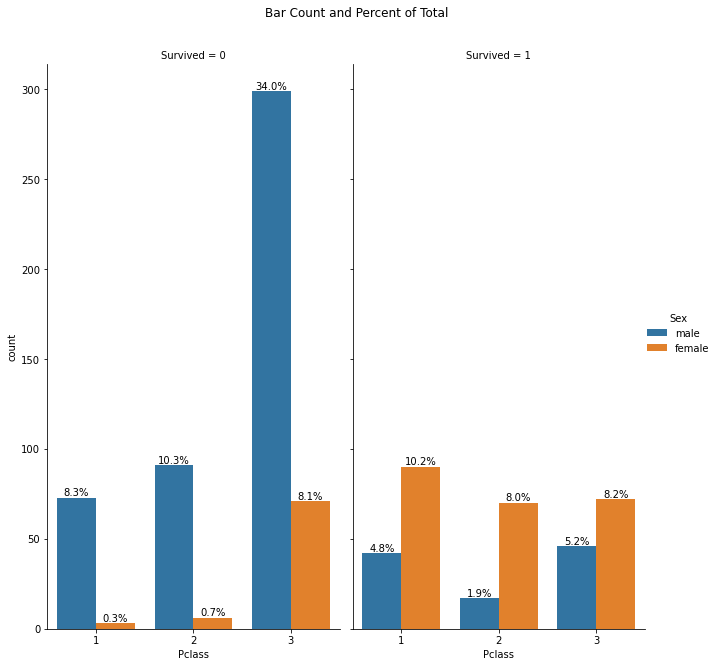

In [153]:
catplot_two_hue((10, 10), train, 'Pclass', 'Sex', 'Survived')

8,1% de la totalité des passagers sont des femmes et se trouvent dans la classe 3 et on survécues

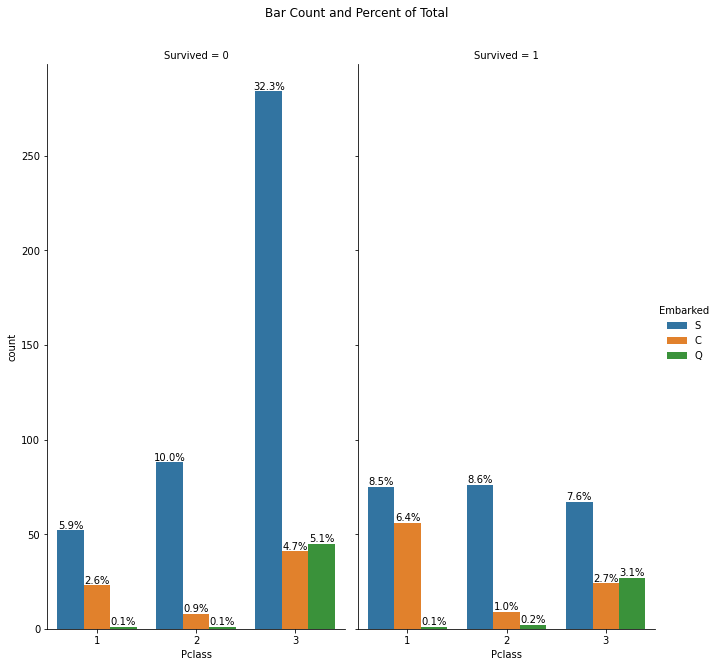

In [154]:
catplot_two_hue((10, 10), train, 'Pclass', 'Embarked', 'Survived')

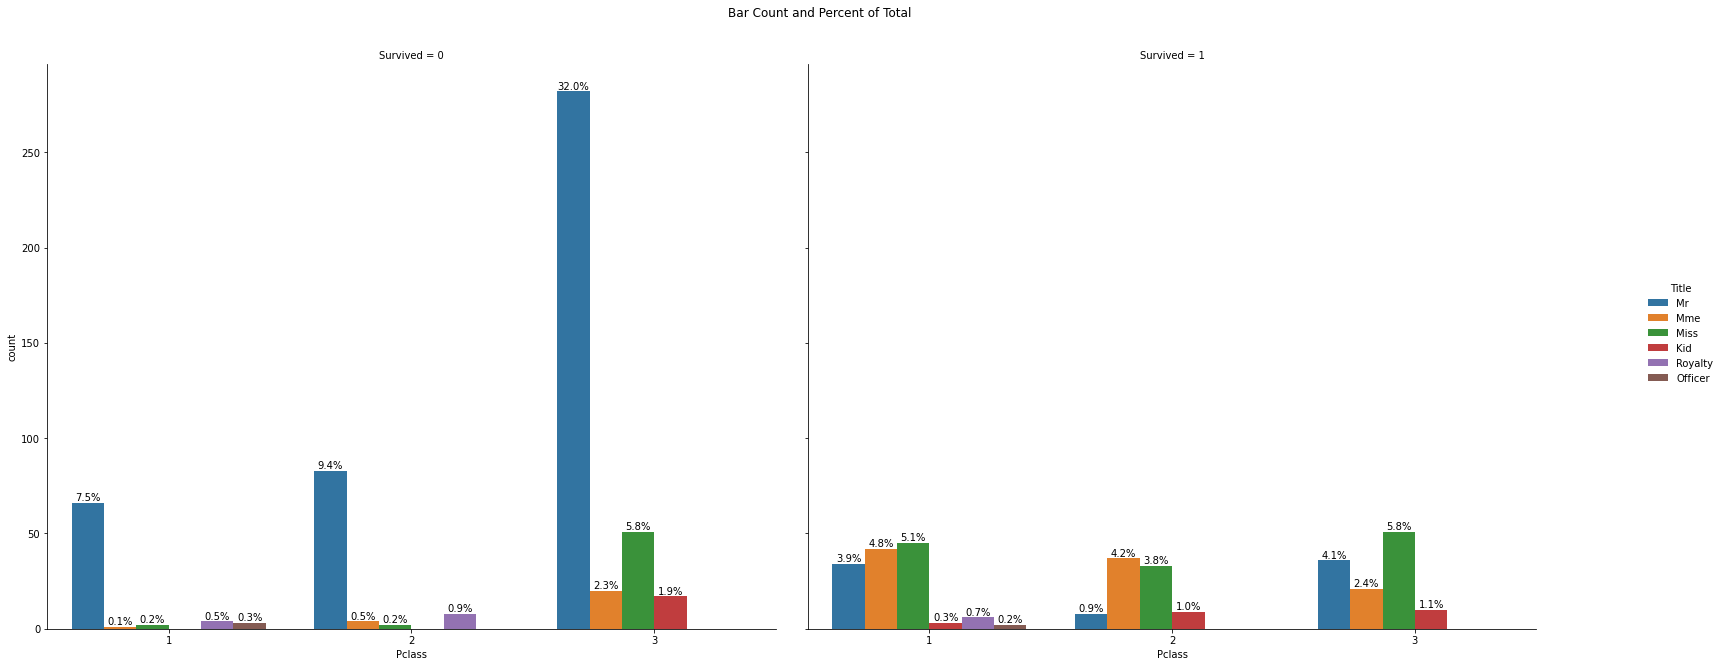

In [155]:
catplot_two_hue((25, 10), train, 'Pclass', 'Title', 'Survived')

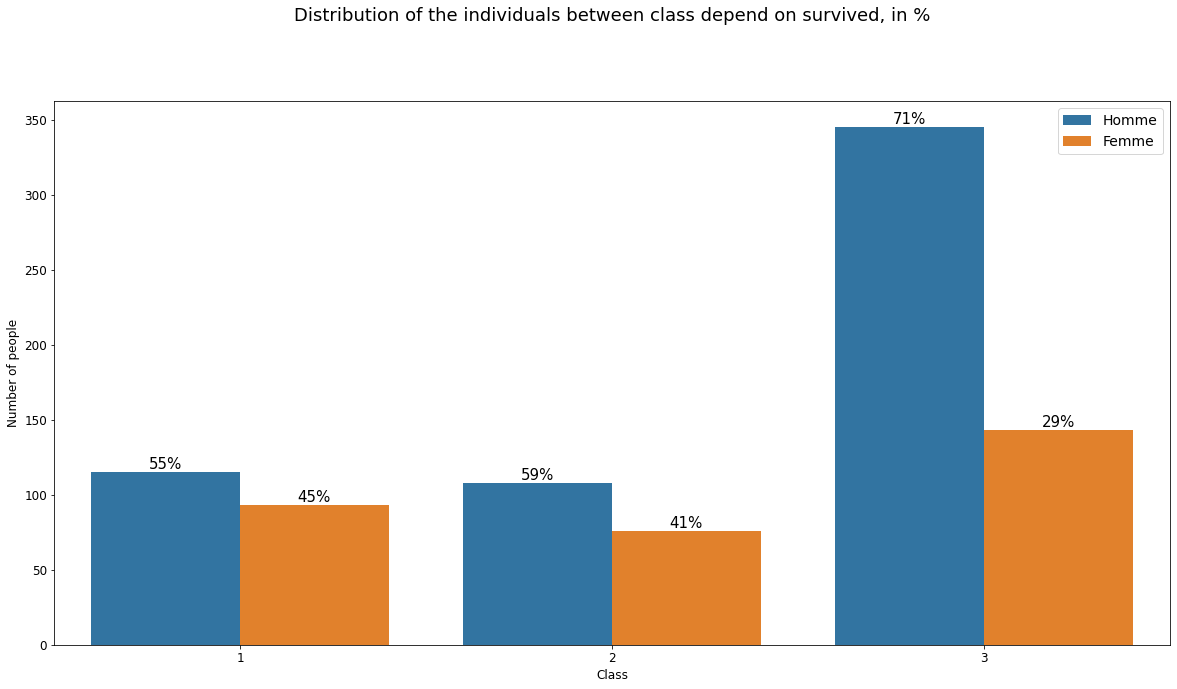

In [156]:
ax = countplot_with_hue((20, 10), train, 'Pclass', 'Sex')
plt.title(
    'Distribution of the individuals between class depend on survived, in %',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("Class", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14, labels=["Homme", "Femme"])
print_with_hue(train, 'Pclass', ax)

In [157]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,nbSiSp,nbParents_child,Embarked,Title,Fare,Age_bin,age_by_decade,Fare_bin
0,1,0,3,male,22.0,1.0,0.0,S,Mr,7.2500,"[20, 30)",20s,"[1, 10)"
1,2,1,1,female,38.0,1.0,0.0,C,Mme,71.2833,"[30, 40)",30s,"[70, 80)"
2,3,1,3,female,26.0,0.0,0.0,S,Miss,7.9250,"[20, 30)",20s,"[1, 10)"
3,4,1,1,female,35.0,1.0,0.0,S,Mme,26.5500,"[30, 40)",30s,"[20, 30)"
4,5,0,3,male,35.0,0.0,0.0,S,Mr,8.0500,"[30, 40)",30s,"[1, 10)"


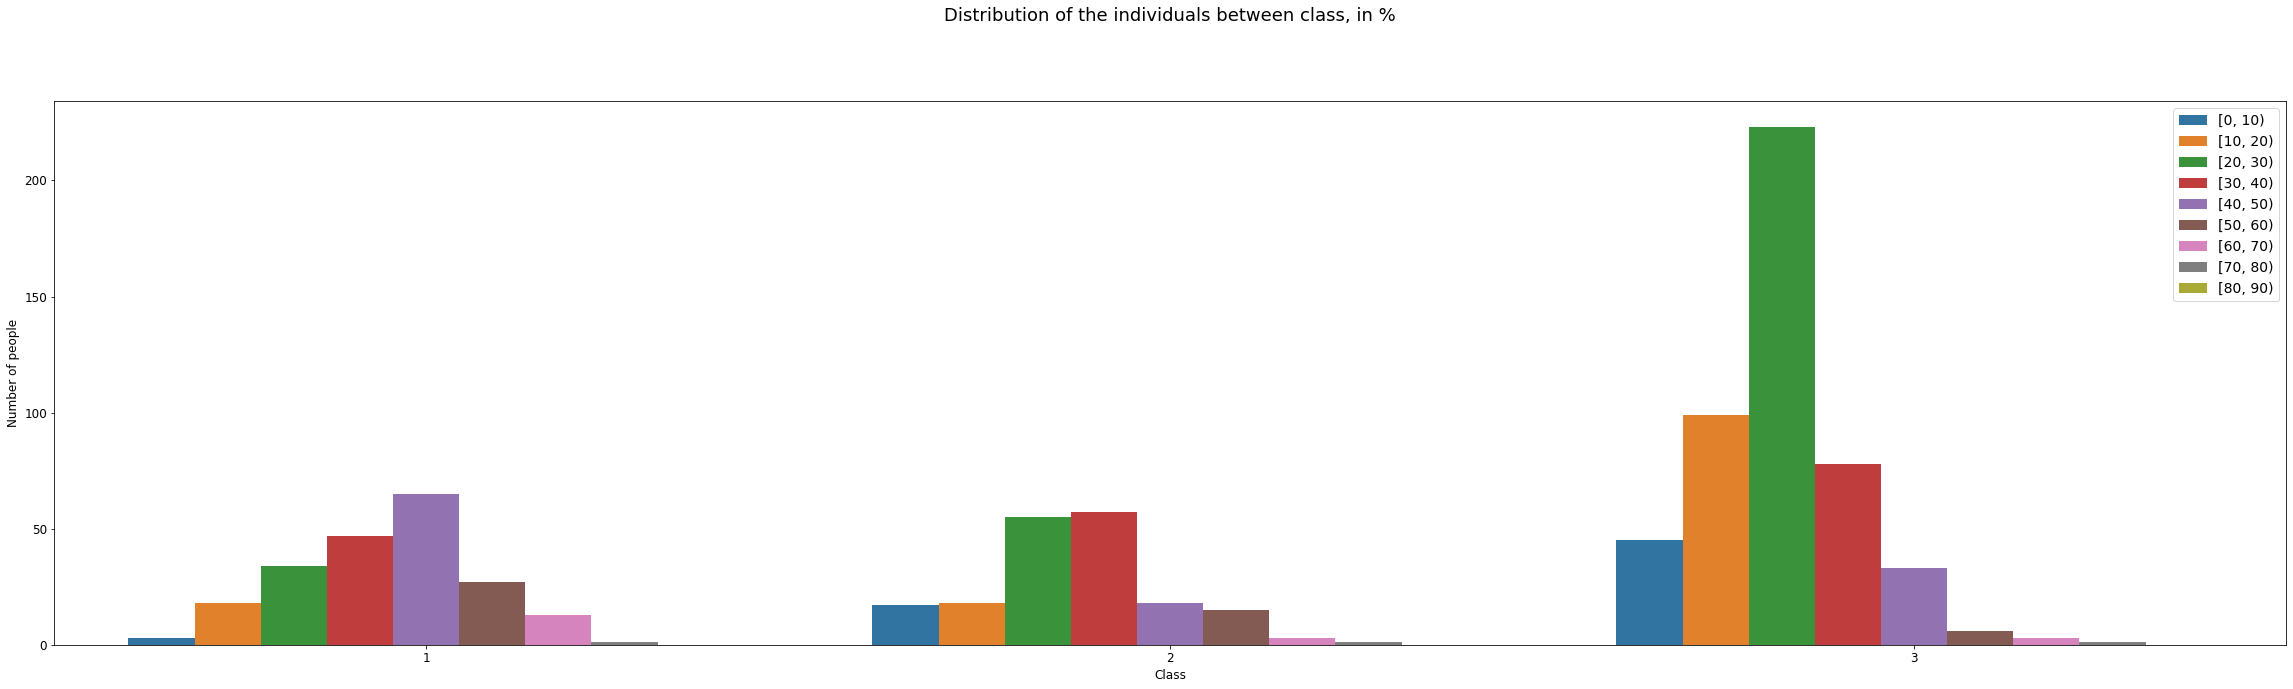

In [158]:
ax = countplot_with_hue((40, 10), train, 'Pclass', 'Age_bin')
plt.title('Distribution of the individuals between class, in %',
          size=18,
          loc='center',
          pad=80)
plt.xlabel("Class", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14)

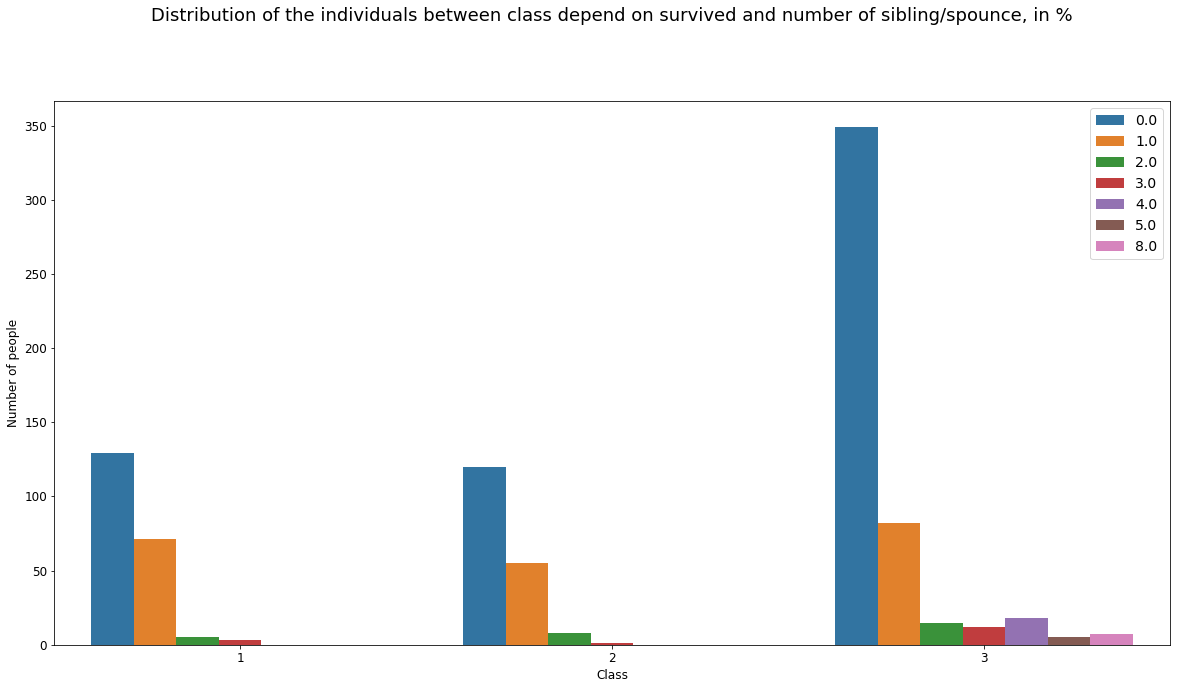

In [159]:
ax = countplot_with_hue((20, 10), train, 'Pclass', 'nbSiSp')
plt.title(
    'Distribution of the individuals between class depend on survived and number of sibling/spounce, in %',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("Class", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14)
plt.show()

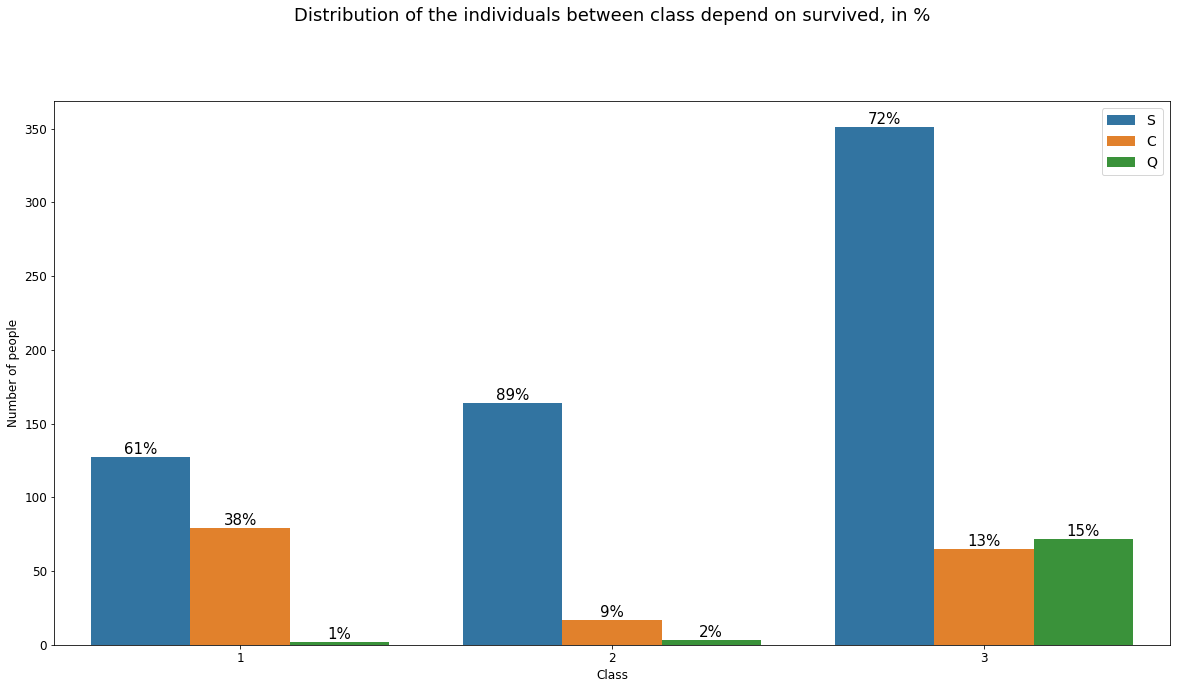

In [160]:
ax = countplot_with_hue((20, 10), train, 'Pclass', 'Embarked')
plt.title(
    'Distribution of the individuals between class depend on survived, in %',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("Class", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14)
print_with_hue(train, 'Pclass', ax)

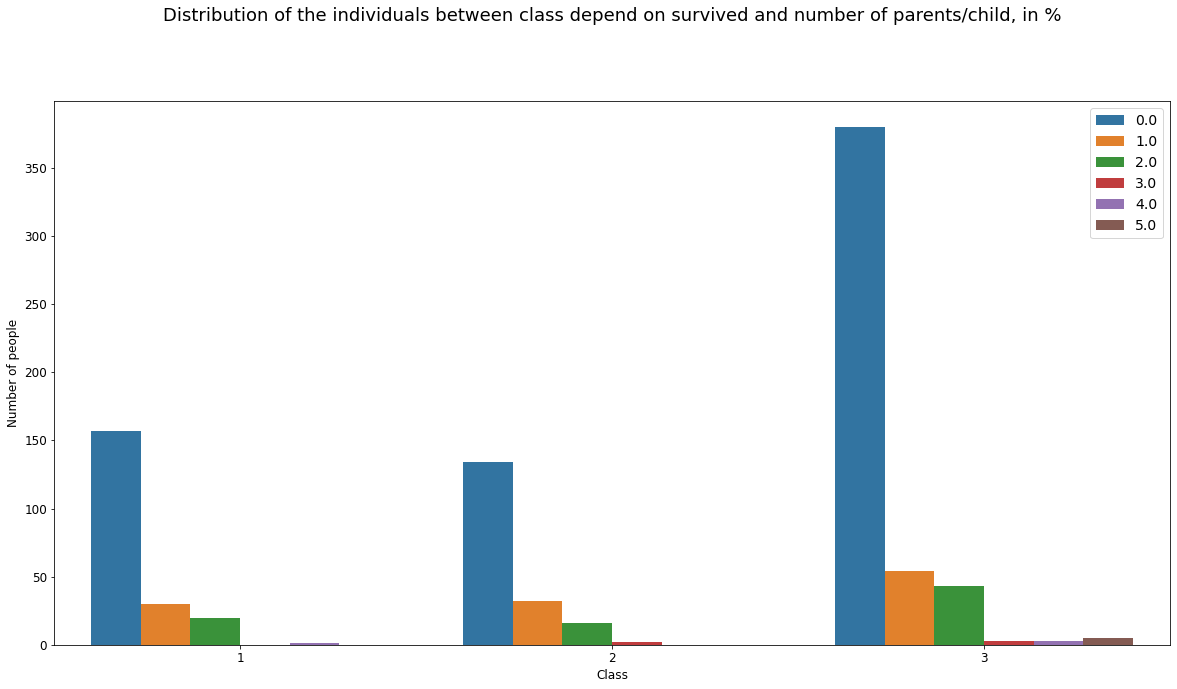

In [161]:
ax = countplot_with_hue((20, 10), train, 'Pclass', 'nbParents_child')
plt.title(
    'Distribution of the individuals between class depend on survived and number of parents/child, in %',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("Class", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14)
plt.show()

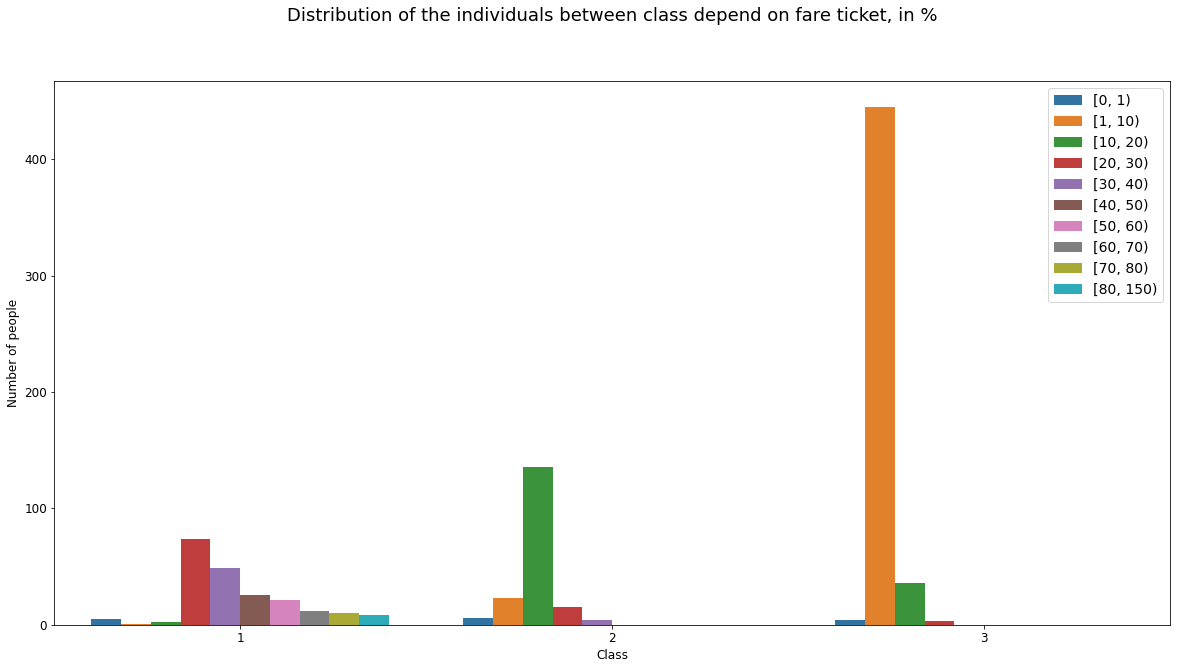

In [162]:
ax = countplot_with_hue((20, 10), train, 'Pclass', 'Fare_bin')
plt.title(
    'Distribution of the individuals between class depend on fare ticket, in %',
    size=18,
    loc='center',
    pad=60)
plt.xlabel("Class", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14)
plt.show()

<Figure size 432x288 with 0 Axes>

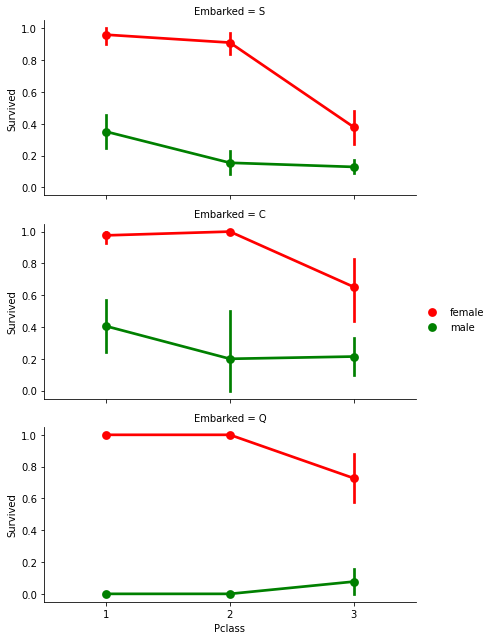

In [163]:
plt.figure()
fg = sns.FacetGrid(train, row='Embarked', aspect=2)
fg.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', \
       hue_order=['female', 'male'], order=[1,2,3], palette={'female': "r", 'male': "g"})
fg.add_legend()

## <font color='green'>Colonne : Sex</font>

### <font color='grey'>Analyse Univariée</font>

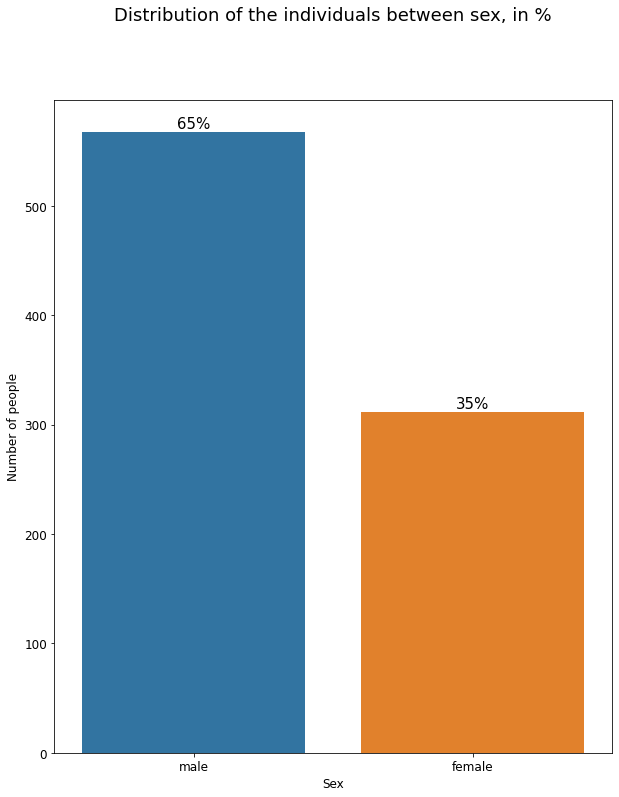

In [164]:
ax = countplot((10, 12), train, 'Sex')

plt.title('Distribution of the individuals between sex, in %',
          size=18,
          loc='center',
          pad=80)
plt.xlabel("Sex", size=12)
plt.ylabel("Number of people", size=12)

print_without_hue(ax, train['Sex'])

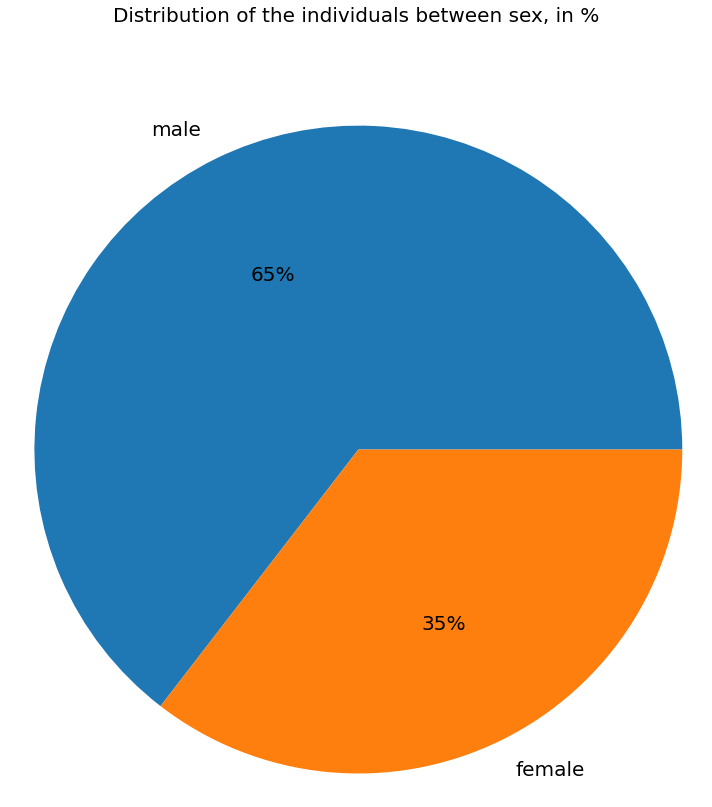

In [165]:
pie_plot((10, 10), train, 'Sex')

plt.title("Distribution of the individuals between sex, in %",
          fontsize=20,
          pad=80,
          loc='center')
plt.show()

### <font color='grey'>Analyse Multivariée</font>

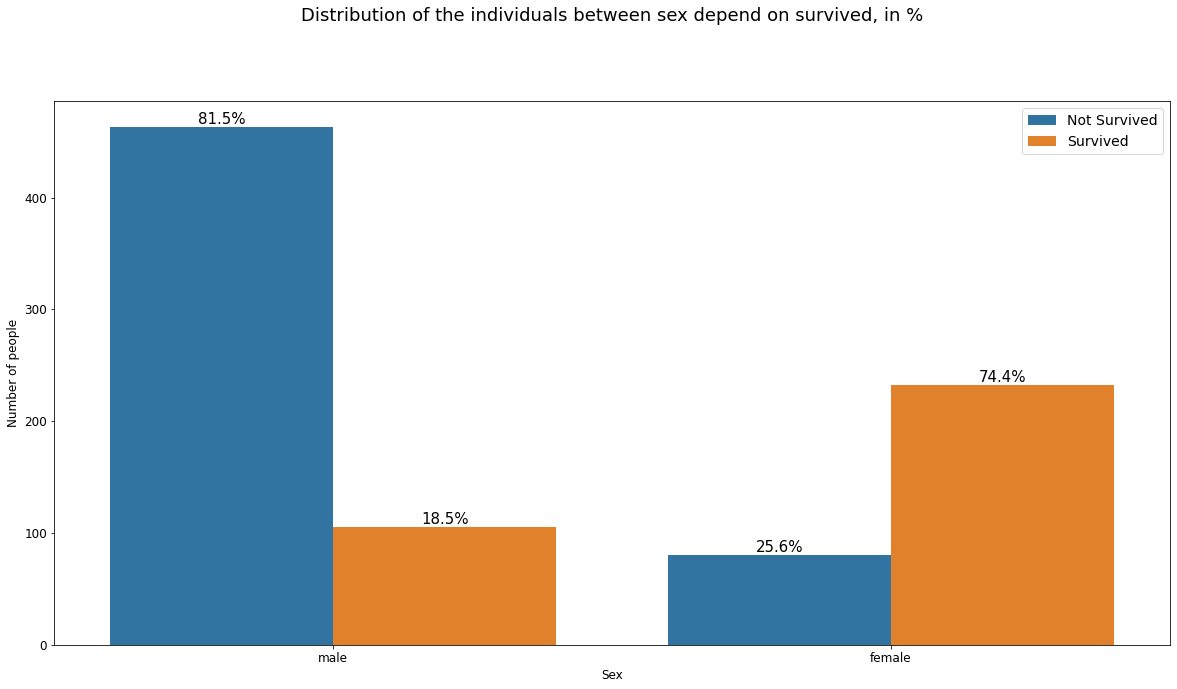

In [166]:
ax = countplot_with_hue((20, 10), train, 'Sex', 'Survived')

plt.title(
    'Distribution of the individuals between sex depend on survived, in %',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("Sex", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14, labels=["Not Survived", "Survived"])

print_with_hue_01(train, 'Sex', ax)

## <font color='green'>Colonne : Age</font>

### <font color='grey'>Analyse Univariée</font>

<AxesSubplot:xlabel='Age', ylabel='Density'>

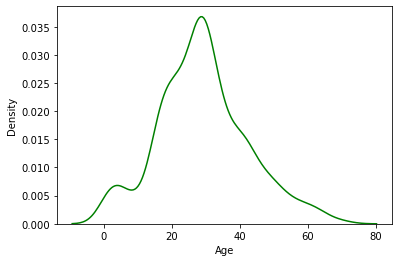

In [167]:
sns.kdeplot(train['Age'], color="green")

<AxesSubplot:xlabel='Age', ylabel='Density'>

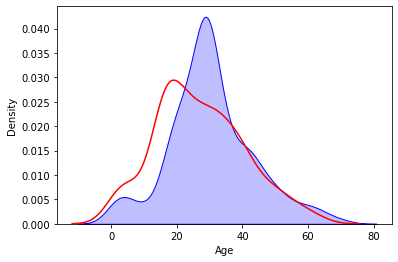

In [168]:
plt.figure()
sns.kdeplot(train[train['Sex'] == 'female']['Age'], color="red")
sns.kdeplot(train[train['Sex'] == 'male']['Age'], color="blue", shade=True)

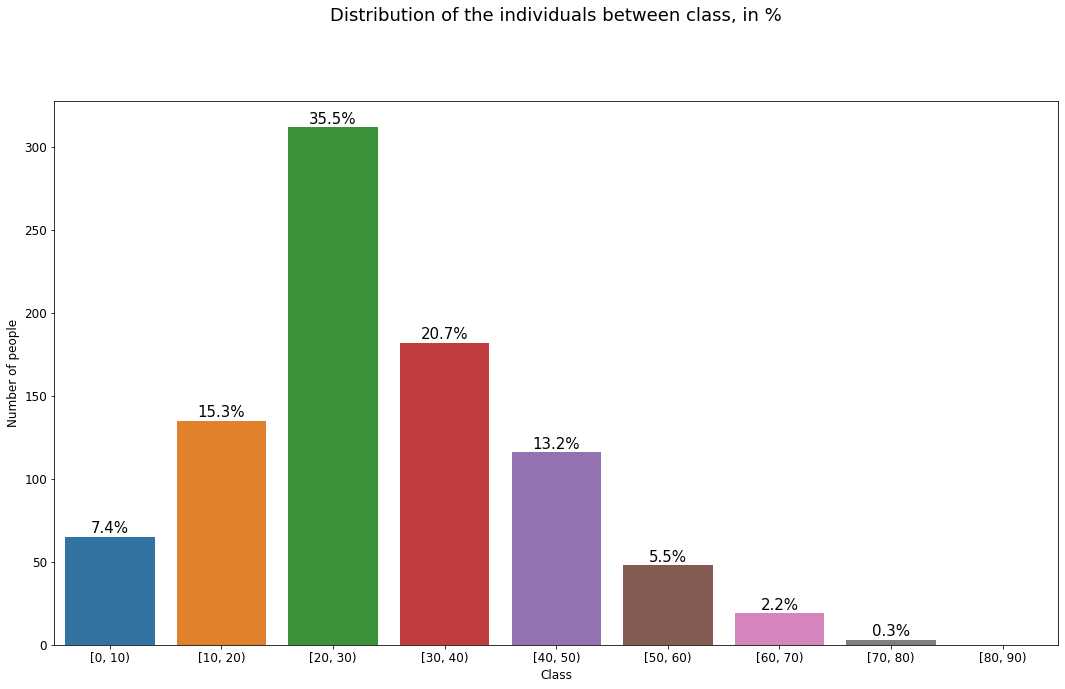

In [169]:
ax = countplot((18, 10), train, 'Age_bin')

plt.title('Distribution of the individuals between class, in %',
          size=18,
          loc='center',
          pad=80)
plt.xlabel("Class", size=12)
plt.ylabel("Number of people", size=12)

print_without_hue_01(ax, train['Age_bin'])

### <font color='grey'>Analyse Multivariée</font>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


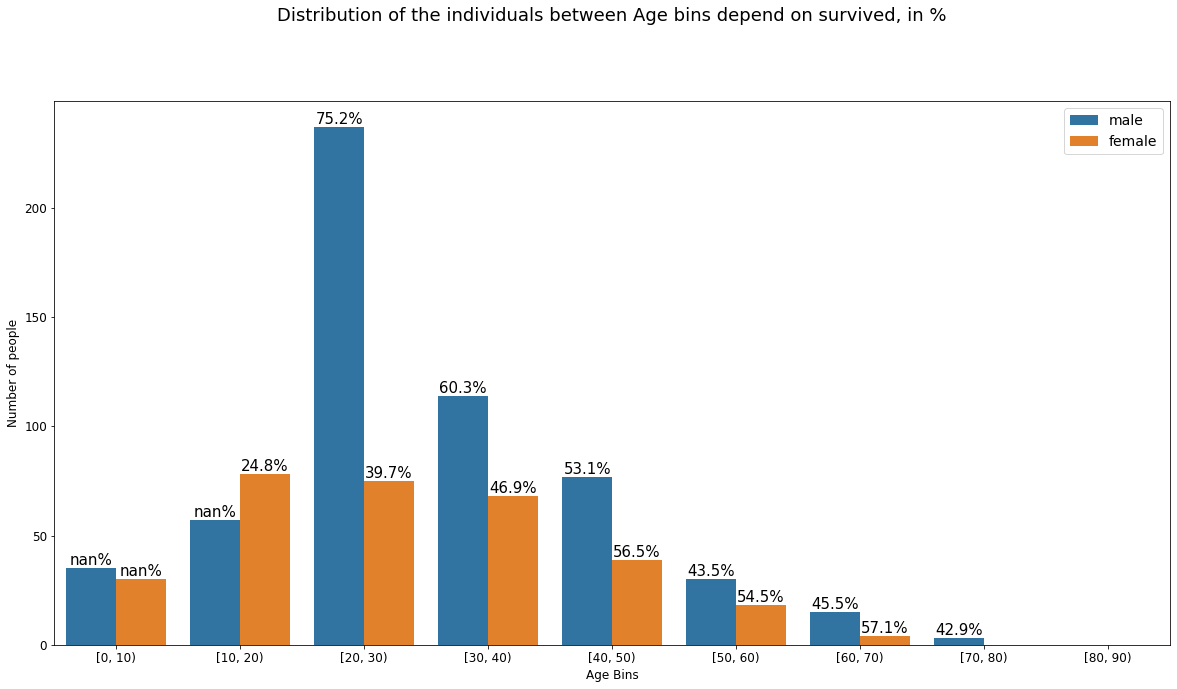

In [170]:
ax = countplot_with_hue((20, 10), train, 'Age_bin', 'Sex')
plt.title(
    'Distribution of the individuals between Age bins depend on survived, in %',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("Age Bins", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14)
print_with_hue_01(train, 'Age_bin', ax)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


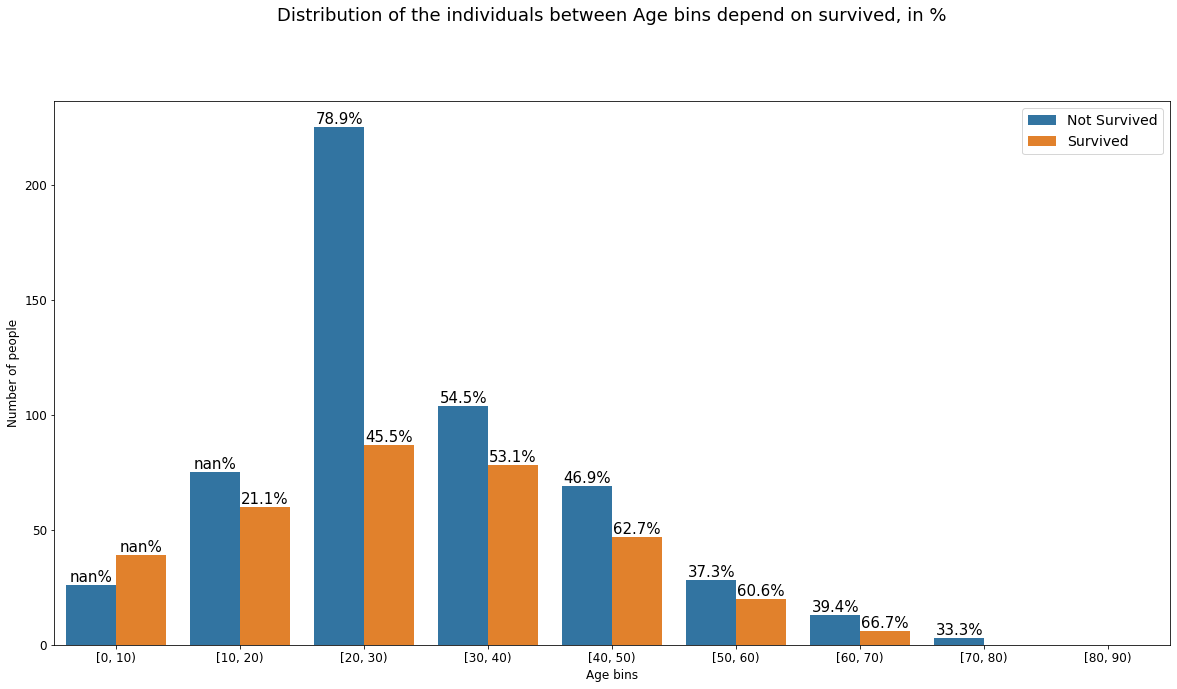

In [171]:
ax = countplot_with_hue((20, 10), train, 'Age_bin', 'Survived')
plt.title(
    'Distribution of the individuals between Age bins depend on survived, in %',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("Age bins", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14, labels=["Not Survived", "Survived"])
print_with_hue_01(train, 'Age_bin', ax)

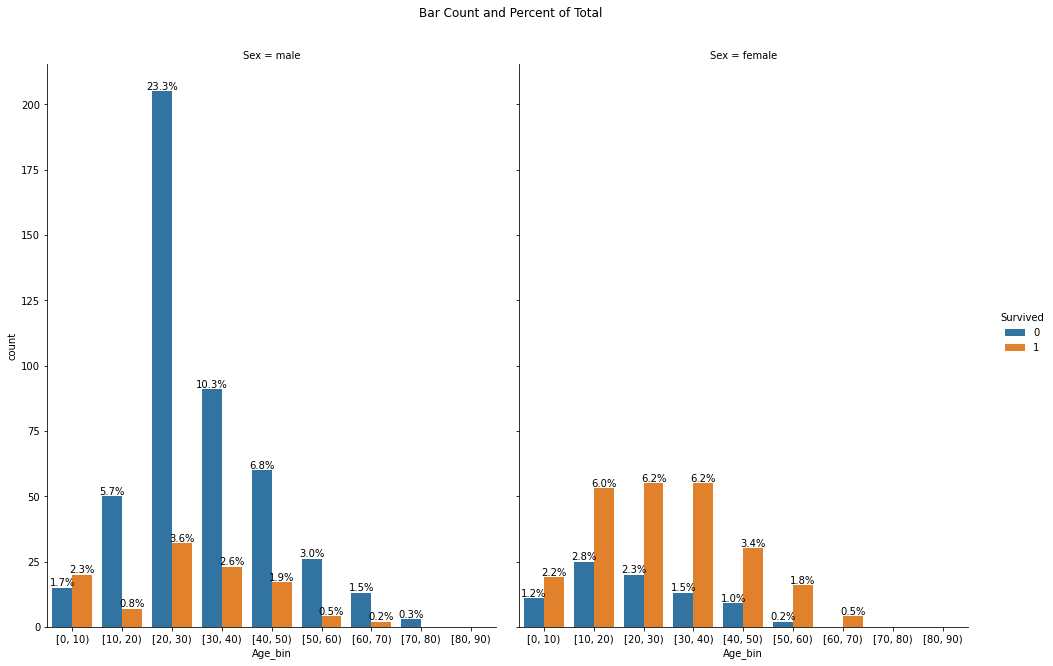

In [172]:
catplot_two_hue((15, 10), train, 'Age_bin', 'Survived', 'Sex')

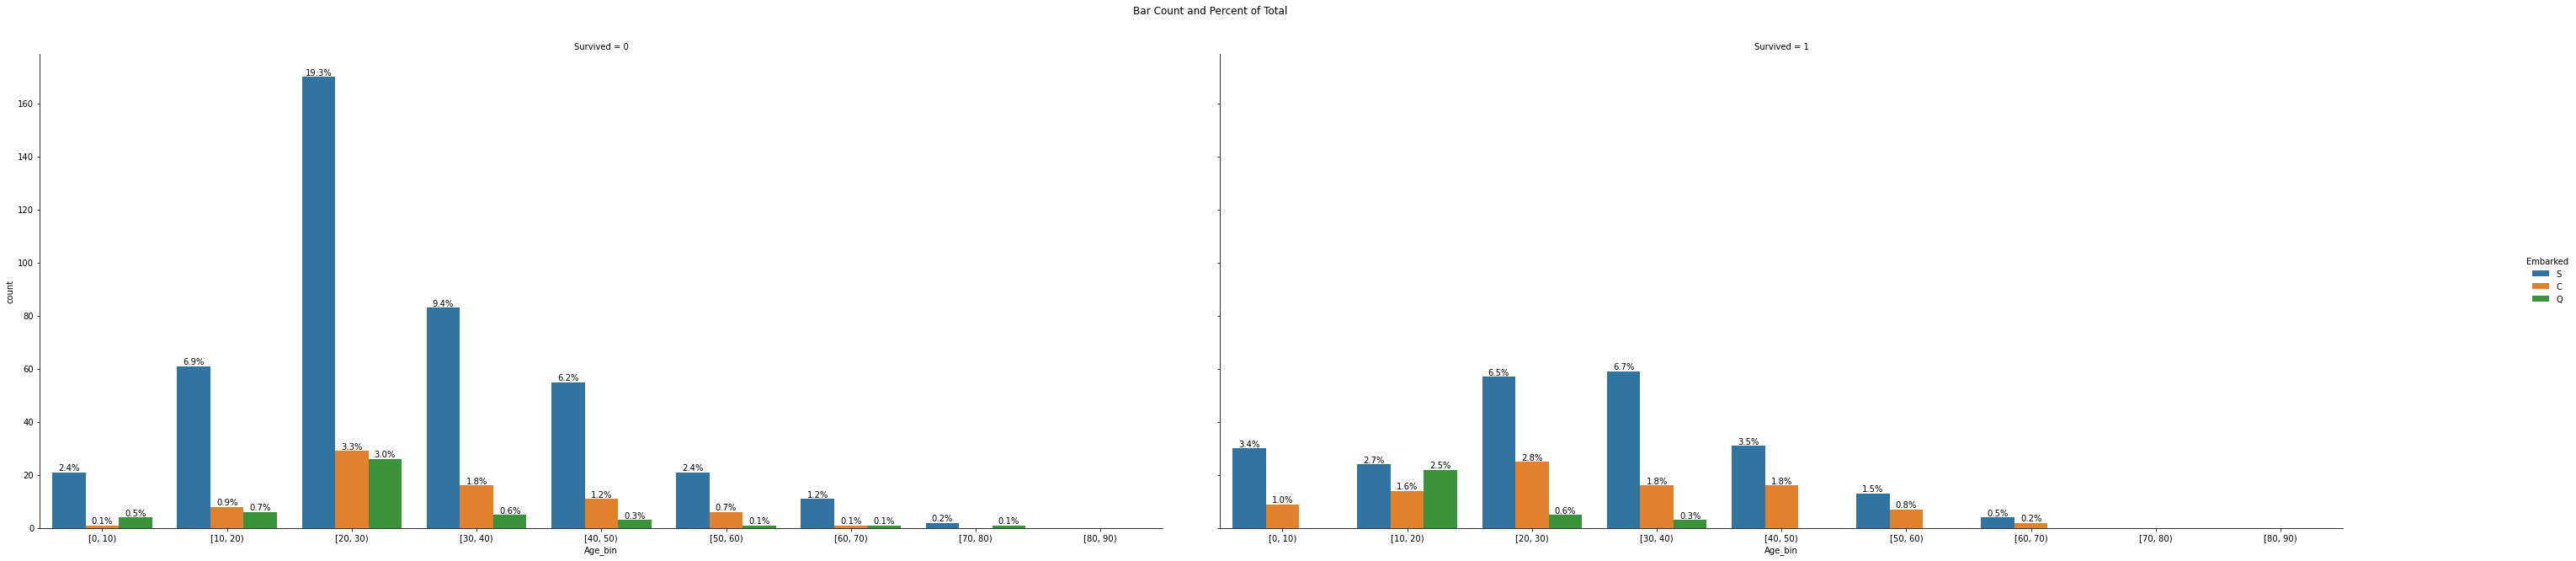

In [173]:
catplot_two_hue((45, 10), train, 'Age_bin', 'Embarked', 'Survived')

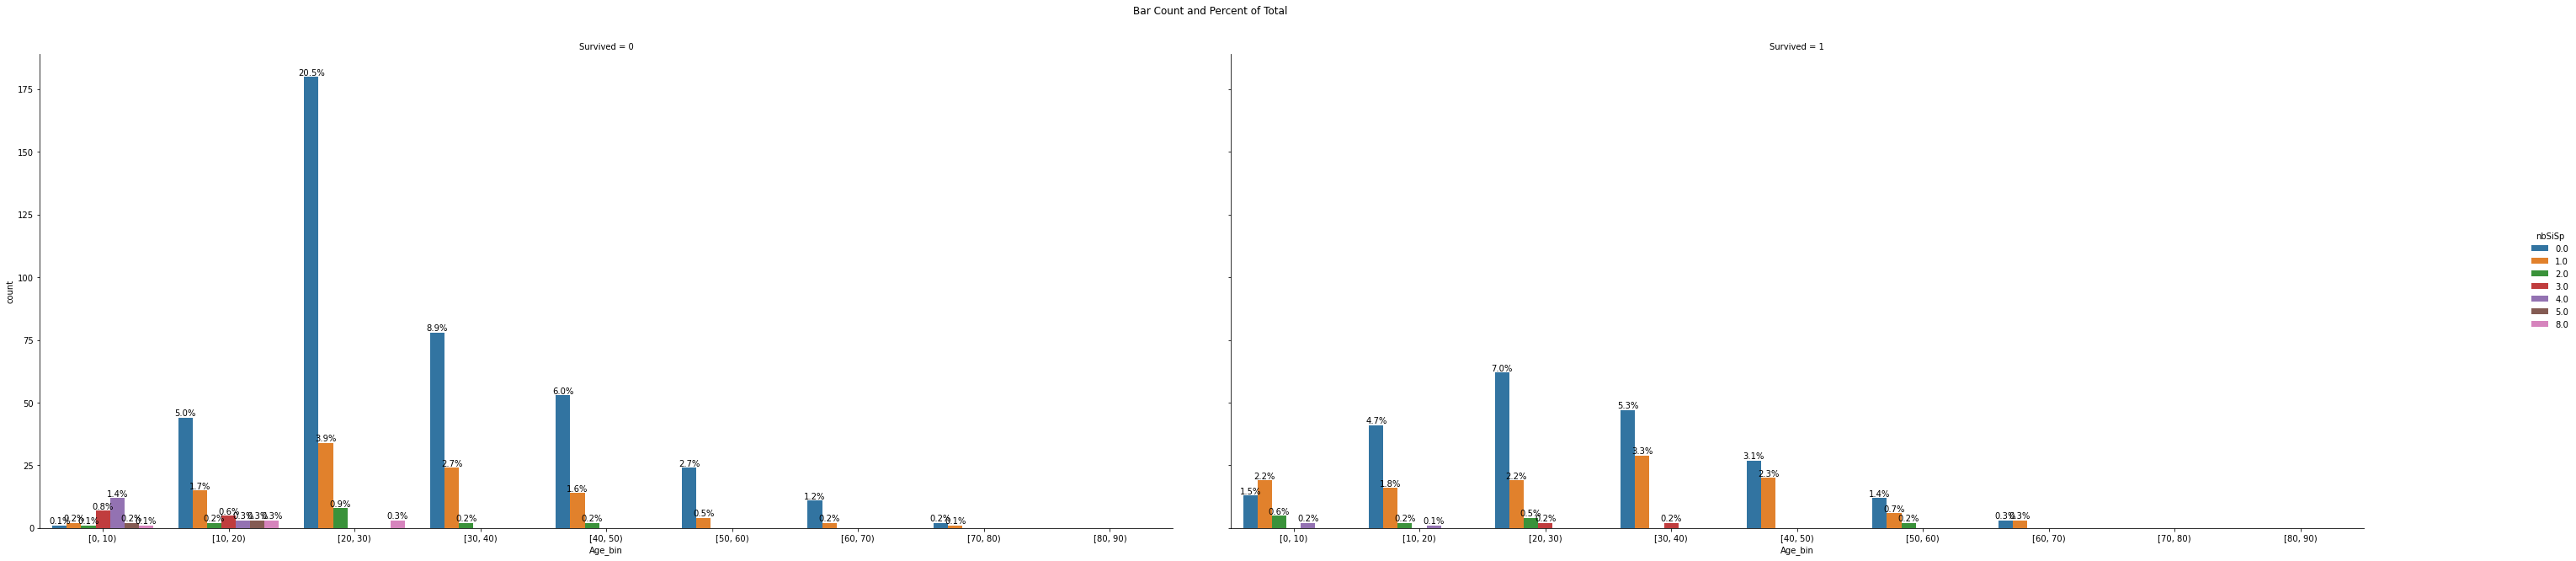

In [174]:
catplot_two_hue((45, 10), train, 'Age_bin', 'nbSiSp', 'Survived')

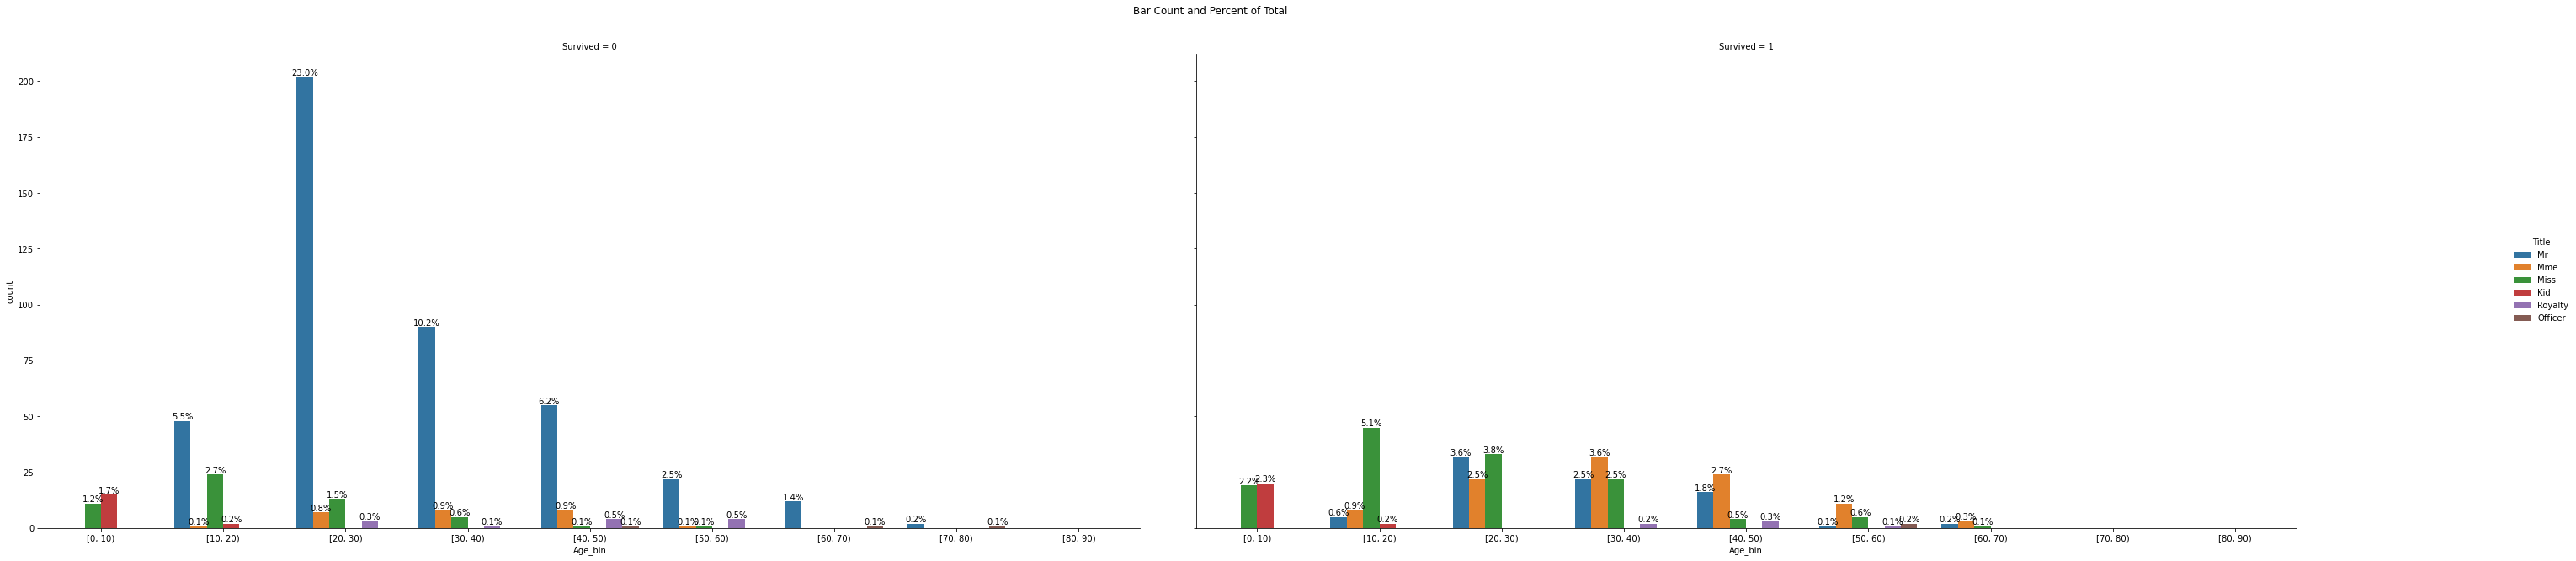

In [175]:
catplot_two_hue((45, 10), train, 'Age_bin', 'Title', 'Survived')

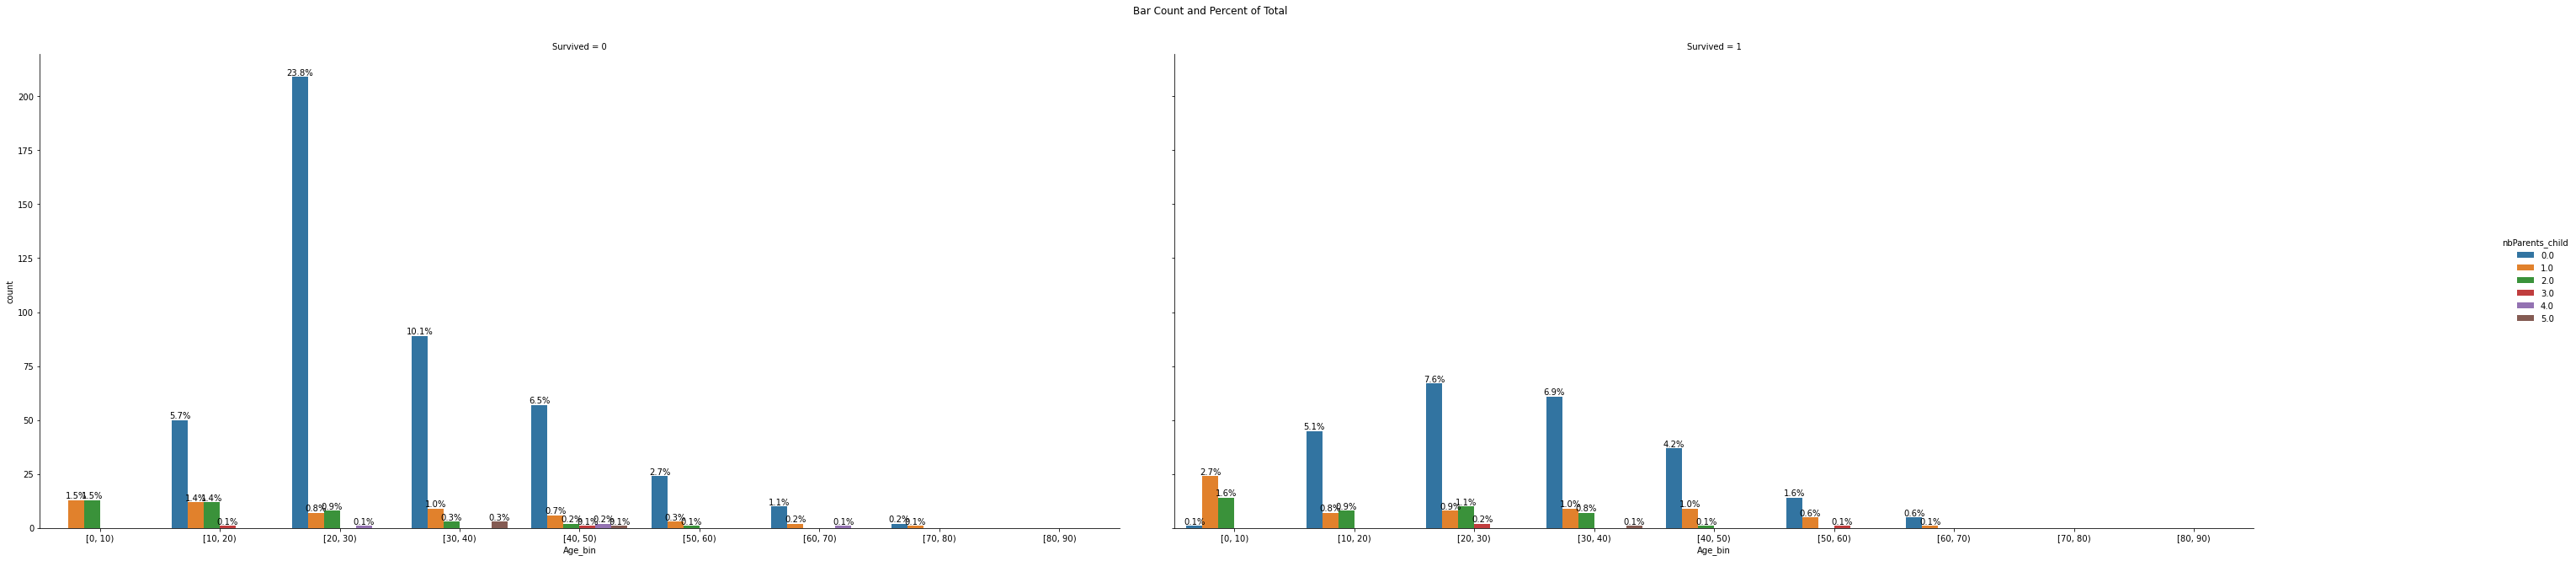

In [176]:
catplot_two_hue((45, 10), train, 'Age_bin', 'nbParents_child', 'Survived')

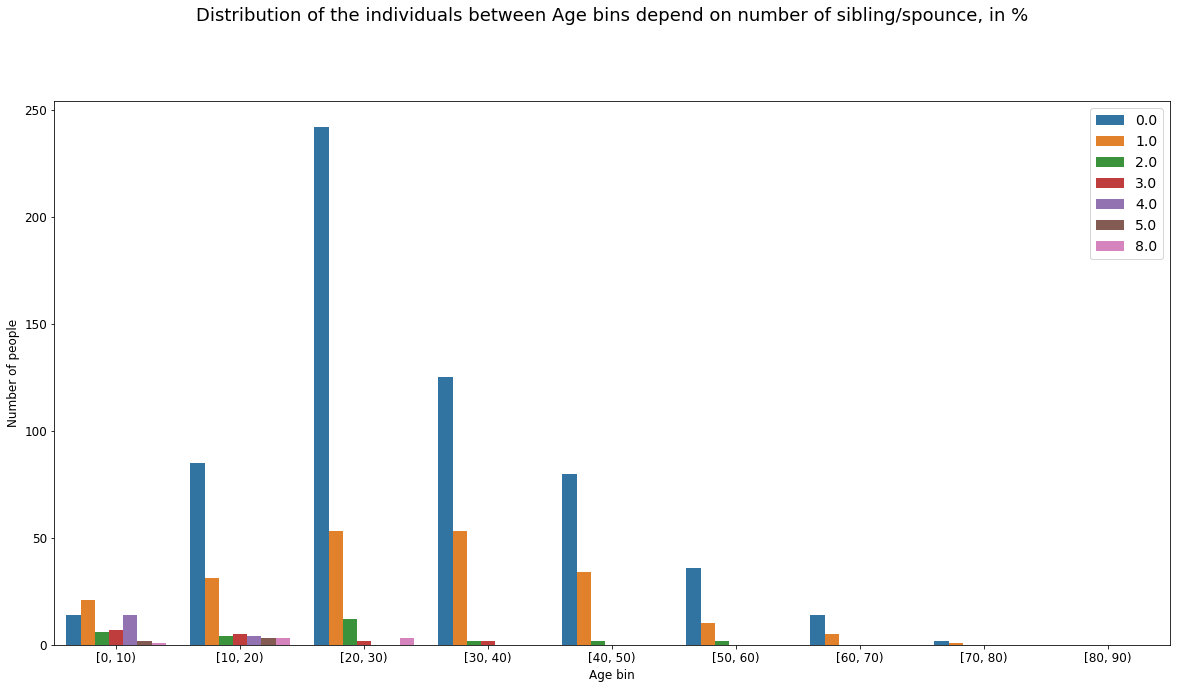

In [177]:
ax = countplot_with_hue((20, 10), train, 'Age_bin', 'nbSiSp')
plt.title(
    'Distribution of the individuals between Age bins depend on number of sibling/spounce, in %',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("Age bin", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14)
plt.show()

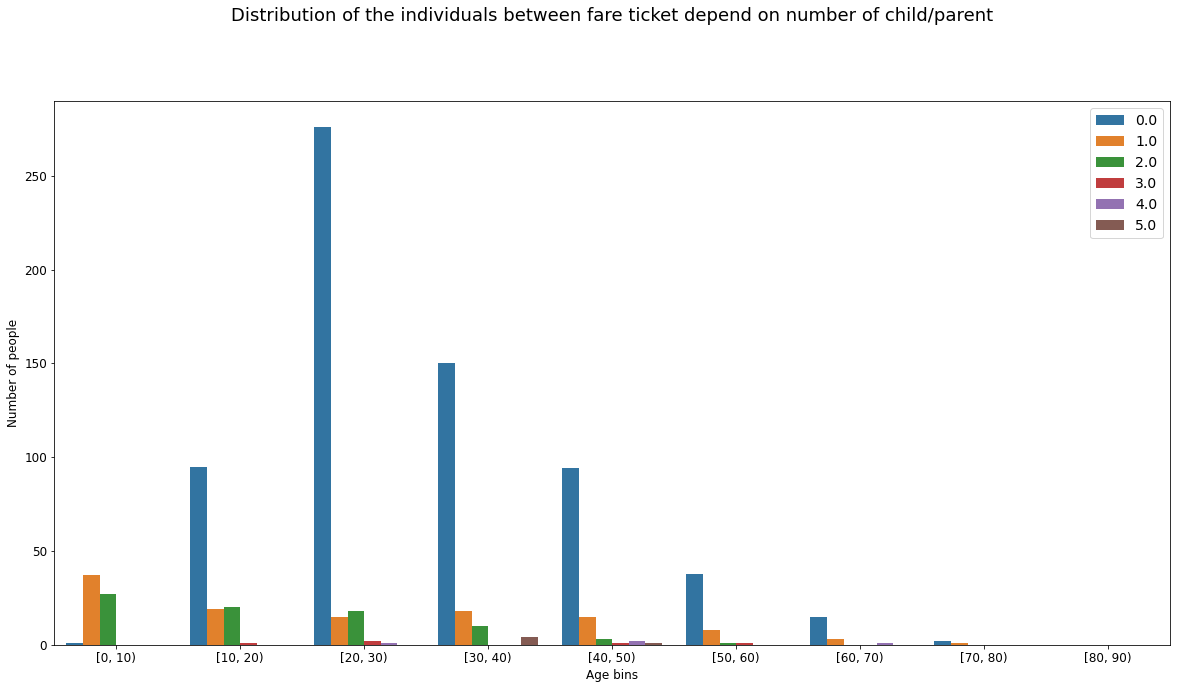

In [178]:
ax = countplot_with_hue((20, 10), train, 'Age_bin', 'nbParents_child')
plt.title(
    'Distribution of the individuals between fare ticket depend on number of child/parent',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("Age bins", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14)
plt.show()

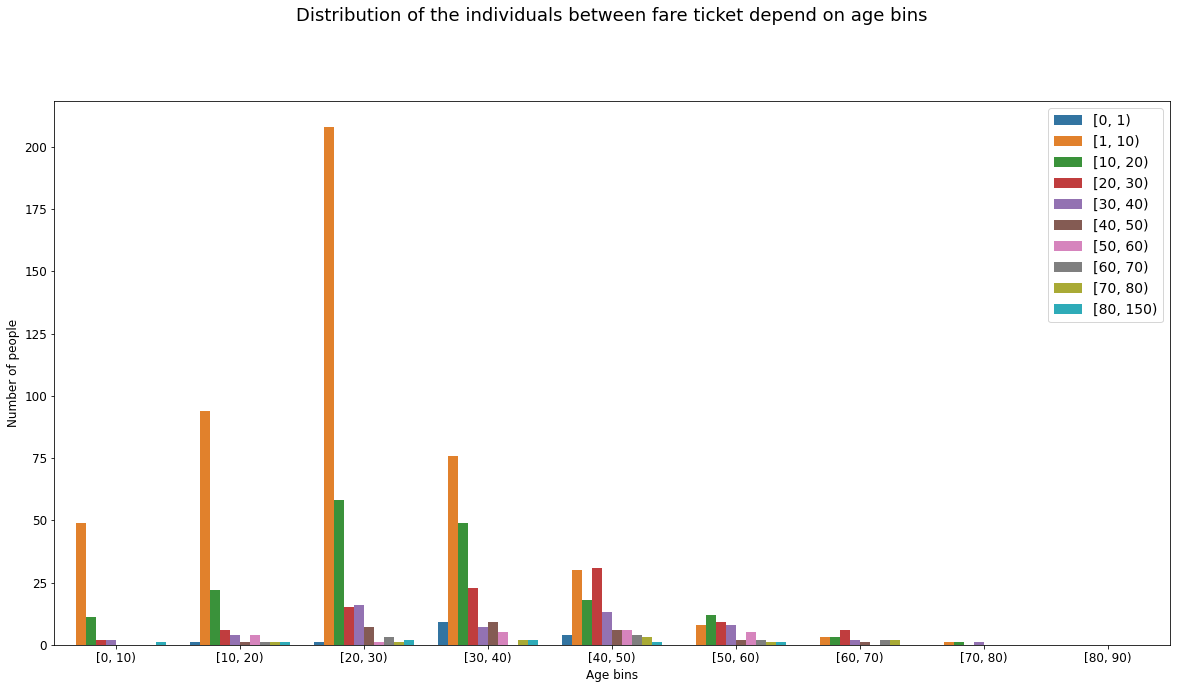

In [179]:
ax = countplot_with_hue((20, 10), train, 'Age_bin', 'Fare_bin')
plt.title(
    'Distribution of the individuals between fare ticket depend on age bins',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("Age bins", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14)
plt.show()

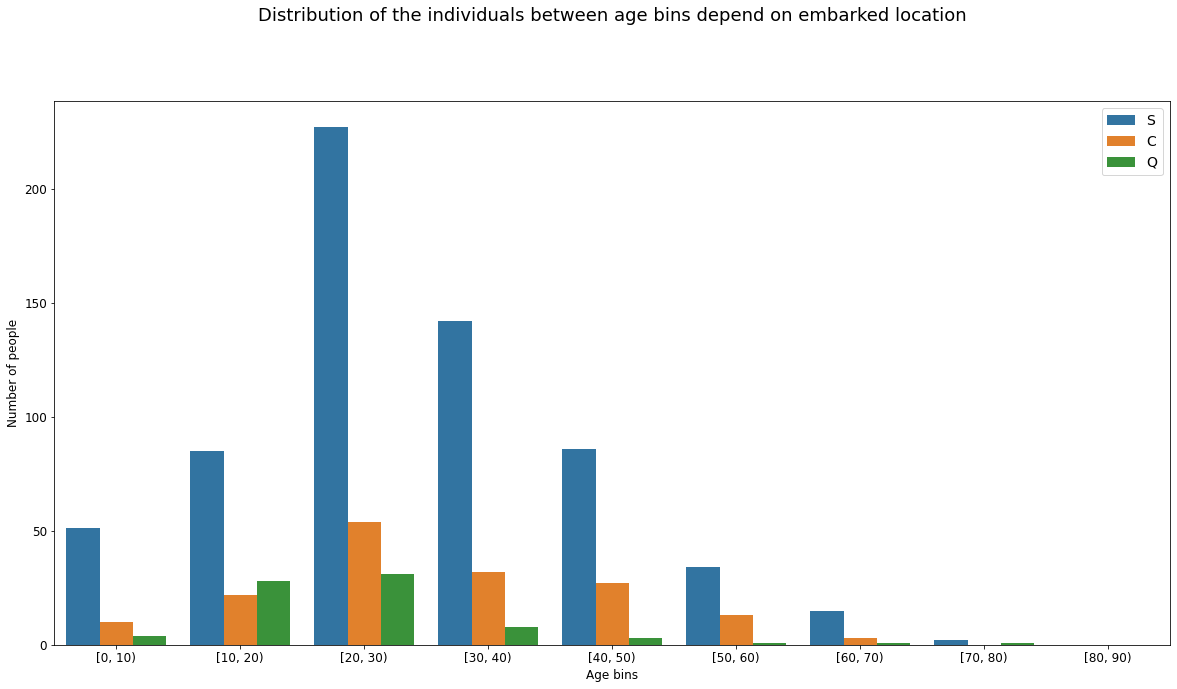

In [180]:
ax = countplot_with_hue((20, 10), train, 'Age_bin', 'Embarked')
plt.title(
    'Distribution of the individuals between age bins depend on embarked location',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("Age bins", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14)
plt.show()

## <font color='green'>Colonne : nbSiSp (Sibcp) </font>

### <font color='grey'>Analyse Univariée</font>

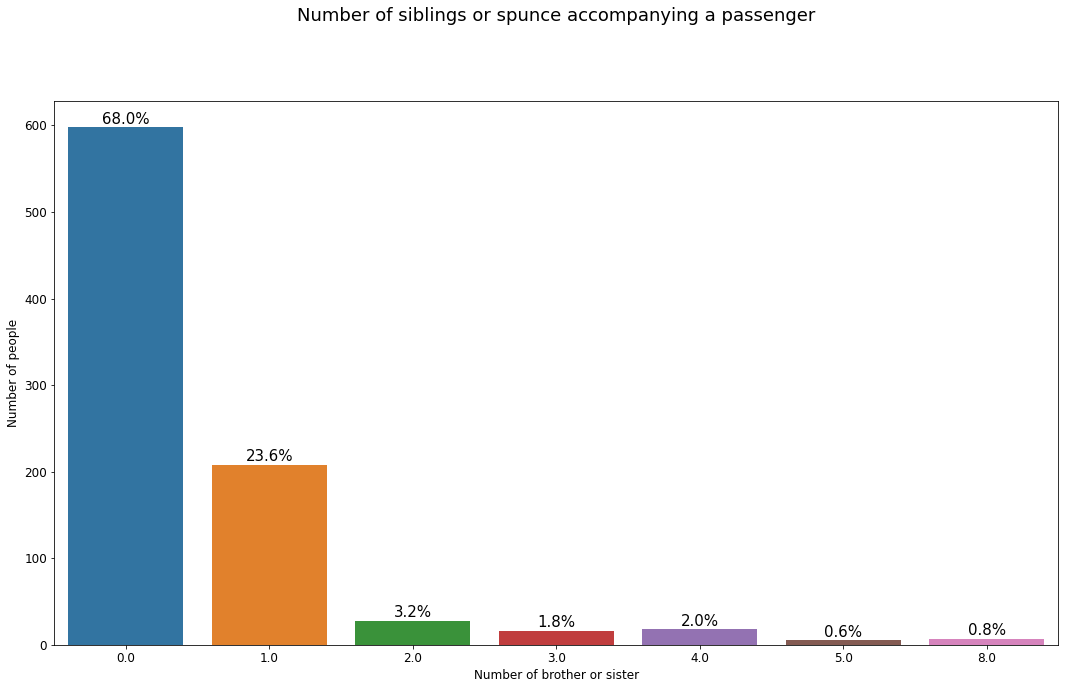

In [181]:
ax = countplot((18, 10), train, 'nbSiSp')

plt.title('Number of siblings or spunce accompanying a passenger',
          size=18,
          loc='center',
          pad=80)
plt.xlabel("Number of brother or sister", size=12)
plt.ylabel("Number of people", size=12)

print_without_hue_01(ax, train['nbSiSp'])

### <font color='grey'>Analyse Multivariée</font>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


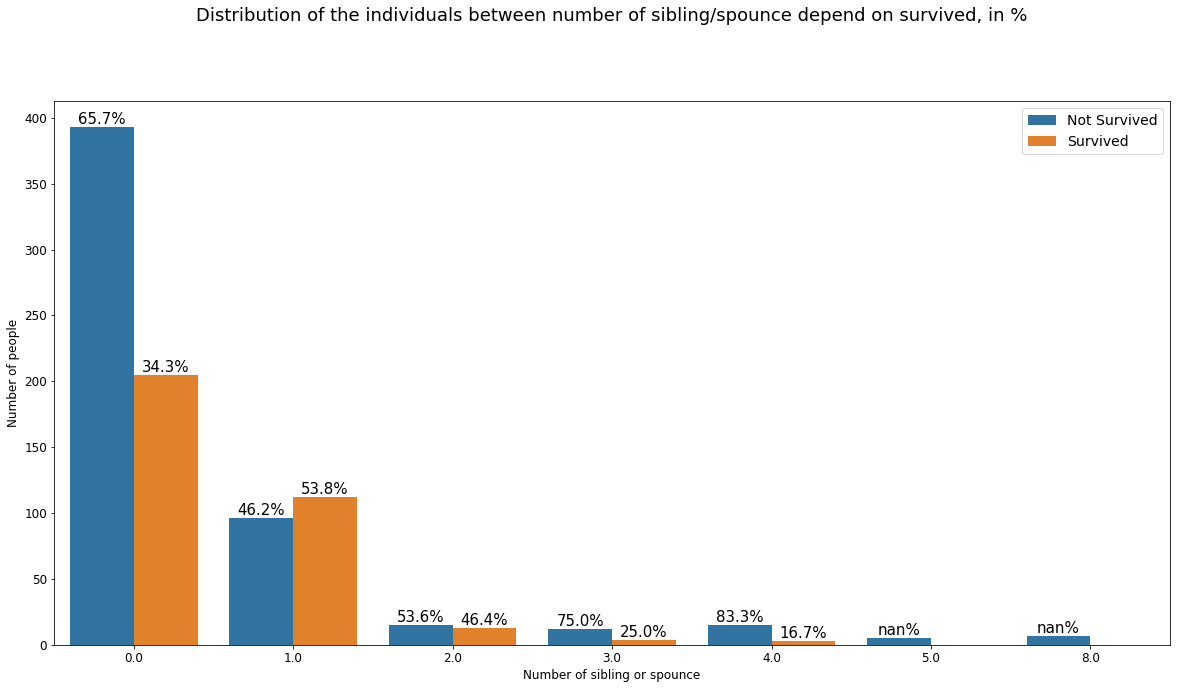

In [182]:
ax = countplot_with_hue((20, 10), train, 'nbSiSp', 'Survived')
plt.title(
    'Distribution of the individuals between number of sibling/spounce depend on survived, in %',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("Number of sibling or spounce", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14, labels=["Not Survived", "Survived"])
print_with_hue_01(train, 'nbSiSp', ax)

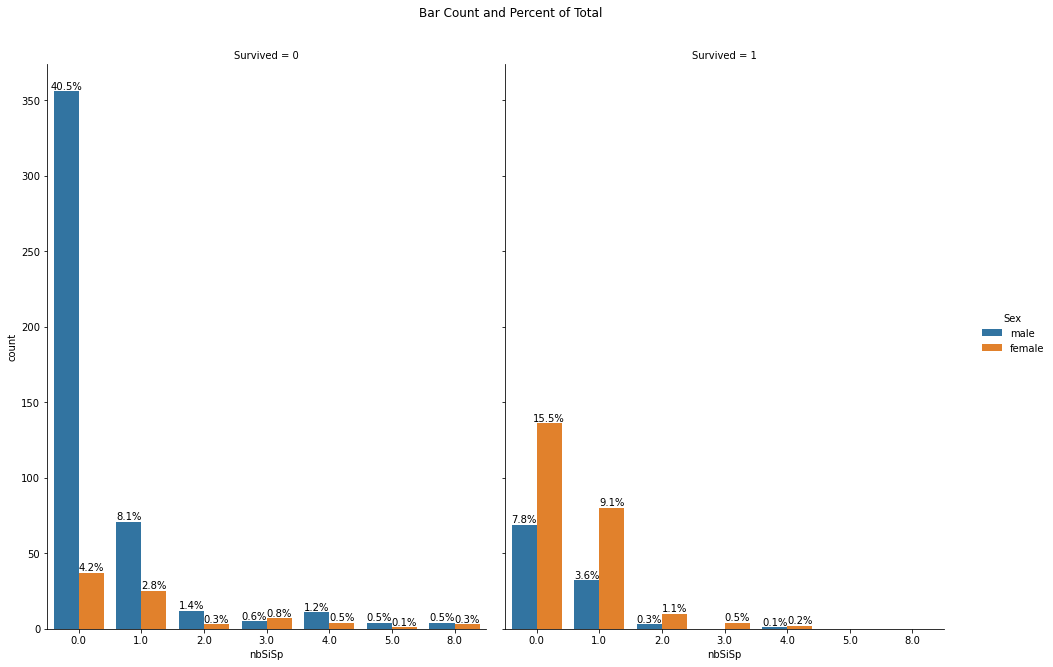

In [183]:
catplot_two_hue((15, 10), train, 'nbSiSp', 'Sex', 'Survived')

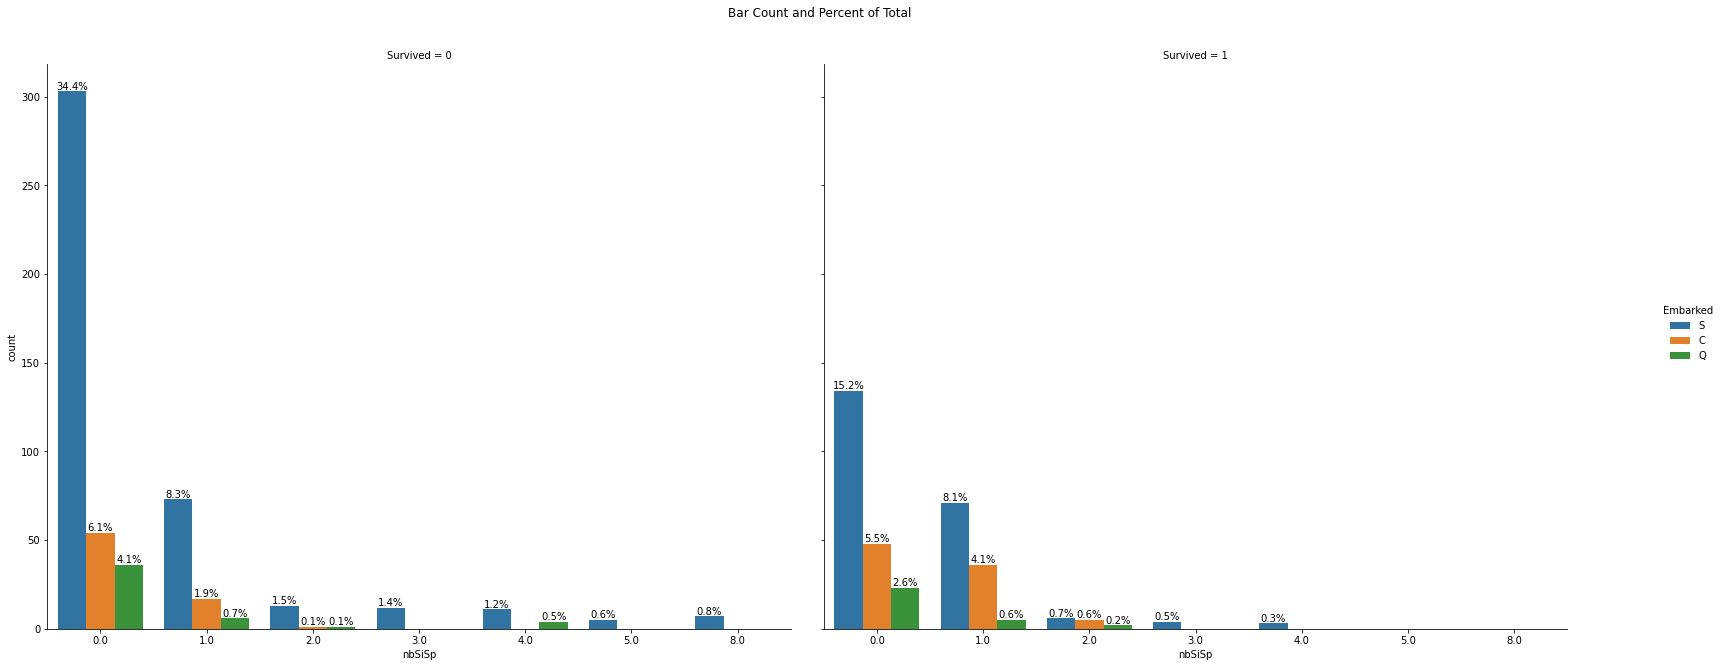

In [184]:
catplot_two_hue((25, 10), train, 'nbSiSp', 'Embarked', 'Survived')

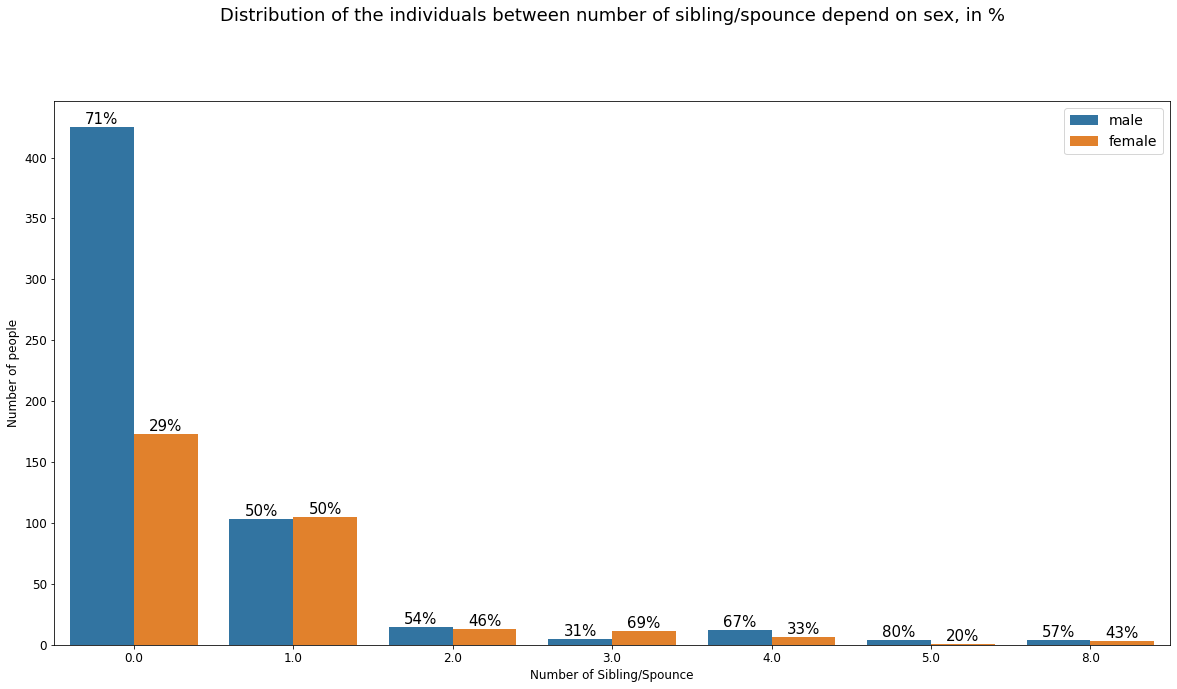

In [185]:
ax = countplot_with_hue((20, 10), train, 'nbSiSp', 'Sex')
plt.title(
    'Distribution of the individuals between number of sibling/spounce depend on sex, in %',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("Number of Sibling/Spounce", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14)
print_with_hue(train, 'nbSiSp', ax)

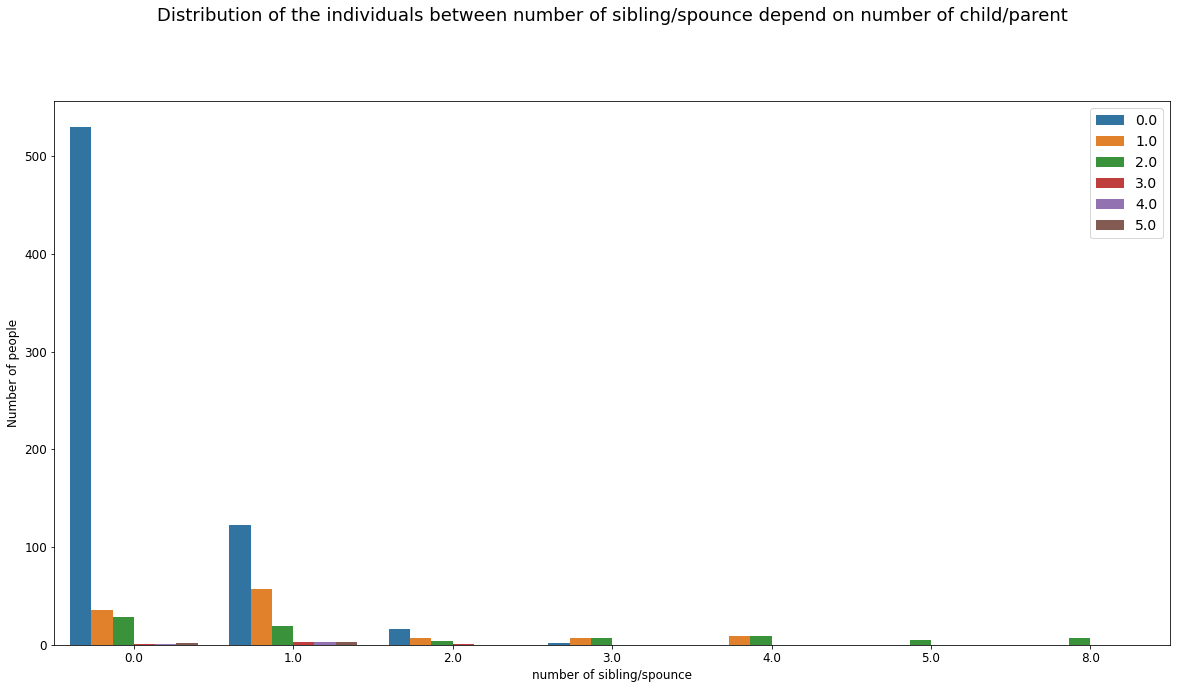

In [186]:
ax = countplot_with_hue((20, 10), train, 'nbSiSp', 'nbParents_child')
plt.title(
    'Distribution of the individuals between number of sibling/spounce depend on number of child/parent',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("number of sibling/spounce", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14)
plt.show()

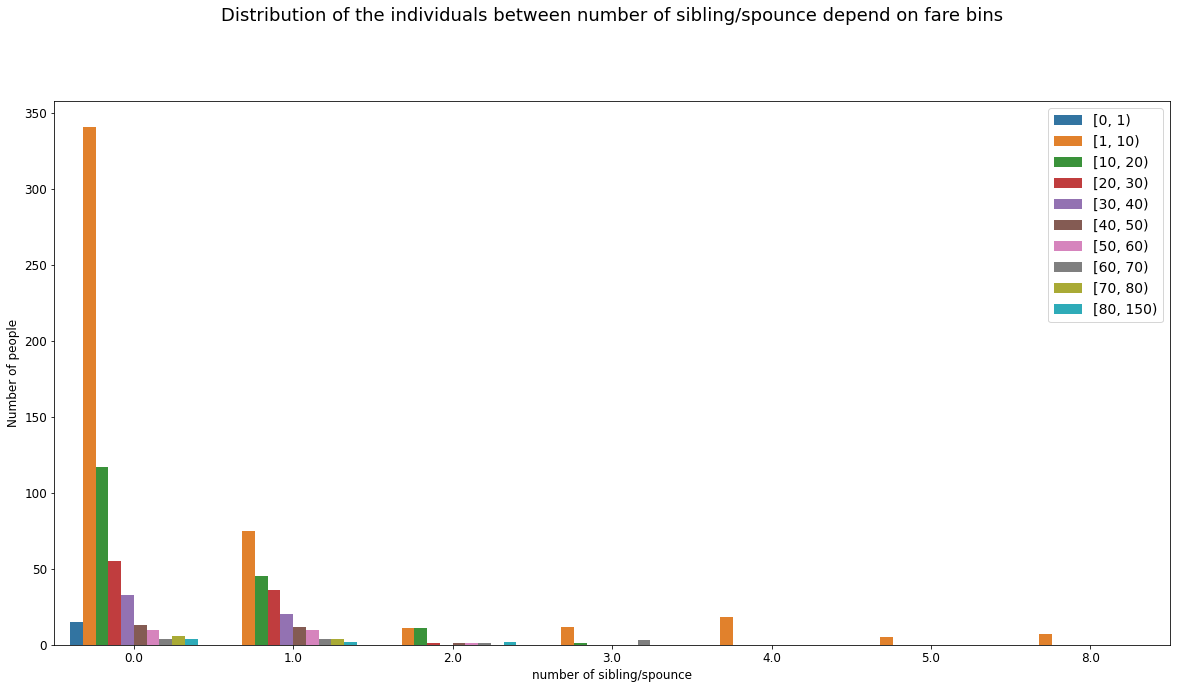

In [187]:
ax = countplot_with_hue((20, 10), train, 'nbSiSp', 'Fare_bin')
plt.title(
    'Distribution of the individuals between number of sibling/spounce depend on fare bins',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("number of sibling/spounce", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14)
plt.show()

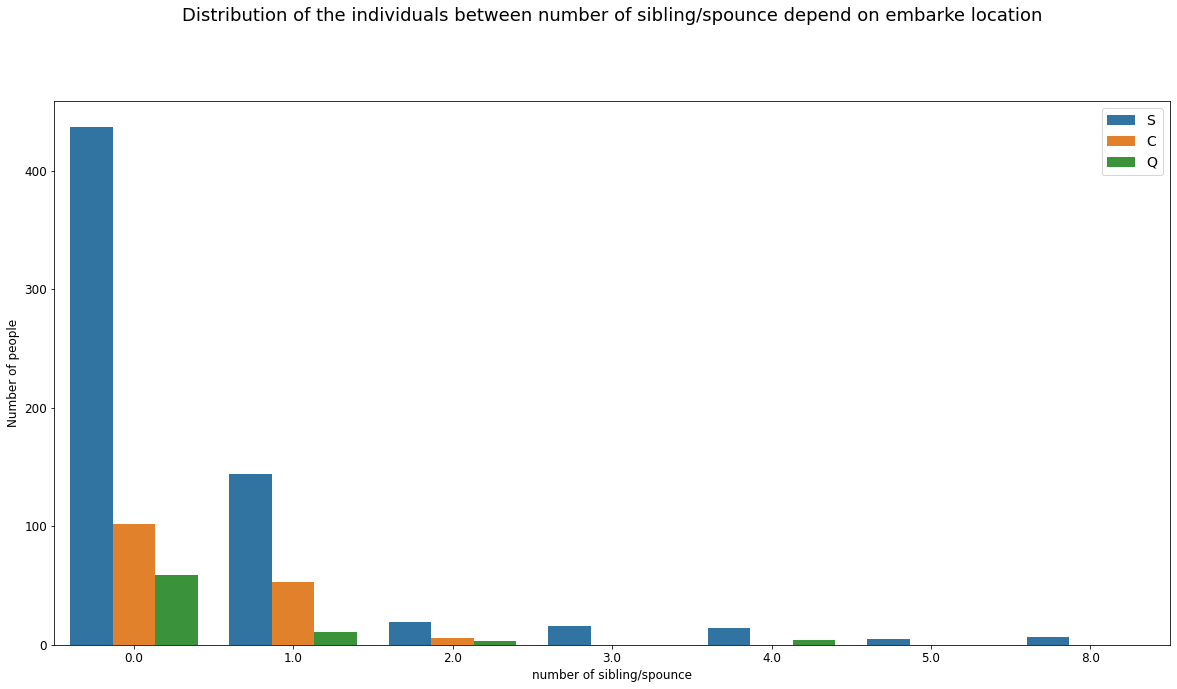

In [188]:
ax = countplot_with_hue((20, 10), train, 'nbSiSp', 'Embarked')
plt.title(
    'Distribution of the individuals between number of sibling/spounce depend on embarke location',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("number of sibling/spounce", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14)
plt.show()

## <font color='green'>Colonne : nbParents (Parch) </font>

### <font color='grey'>Analyse Univariée</font>

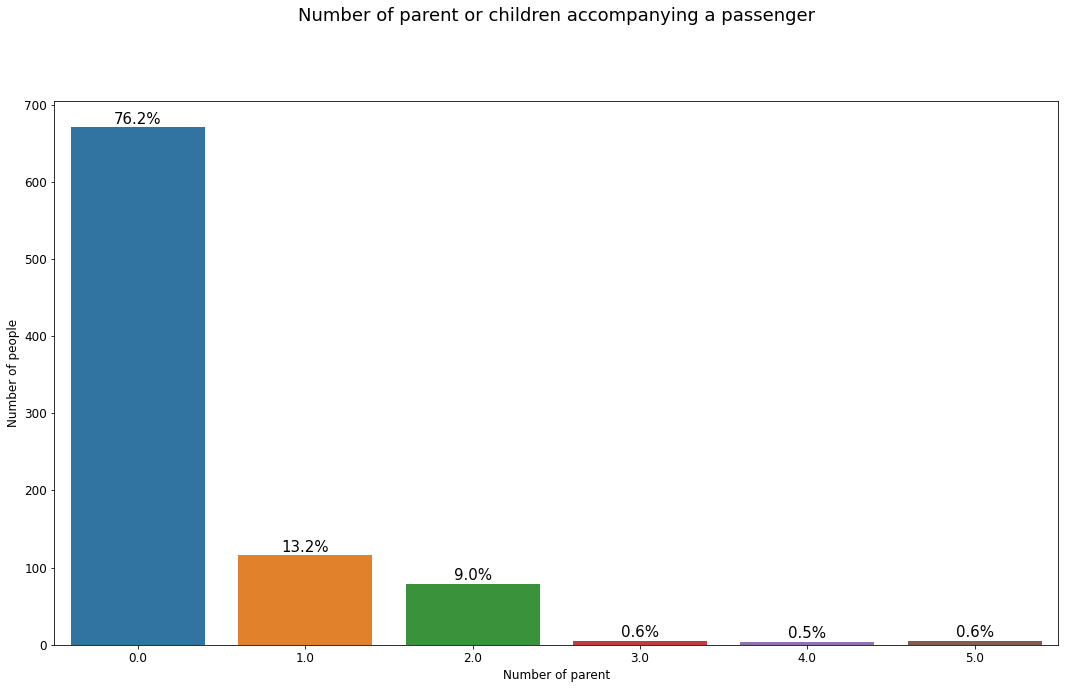

In [189]:
ax = countplot((18, 10), train, 'nbParents_child')

plt.title('Number of parent or children accompanying a passenger',
          size=18,
          loc='center',
          pad=80)
plt.xlabel("Number of parent", size=12)
plt.ylabel("Number of people", size=12)

print_without_hue_01(ax, train['nbParents_child'])

### <font color='grey'>Analyse Multivariée</font>

posx and posy should be finite values
posx and posy should be finite values


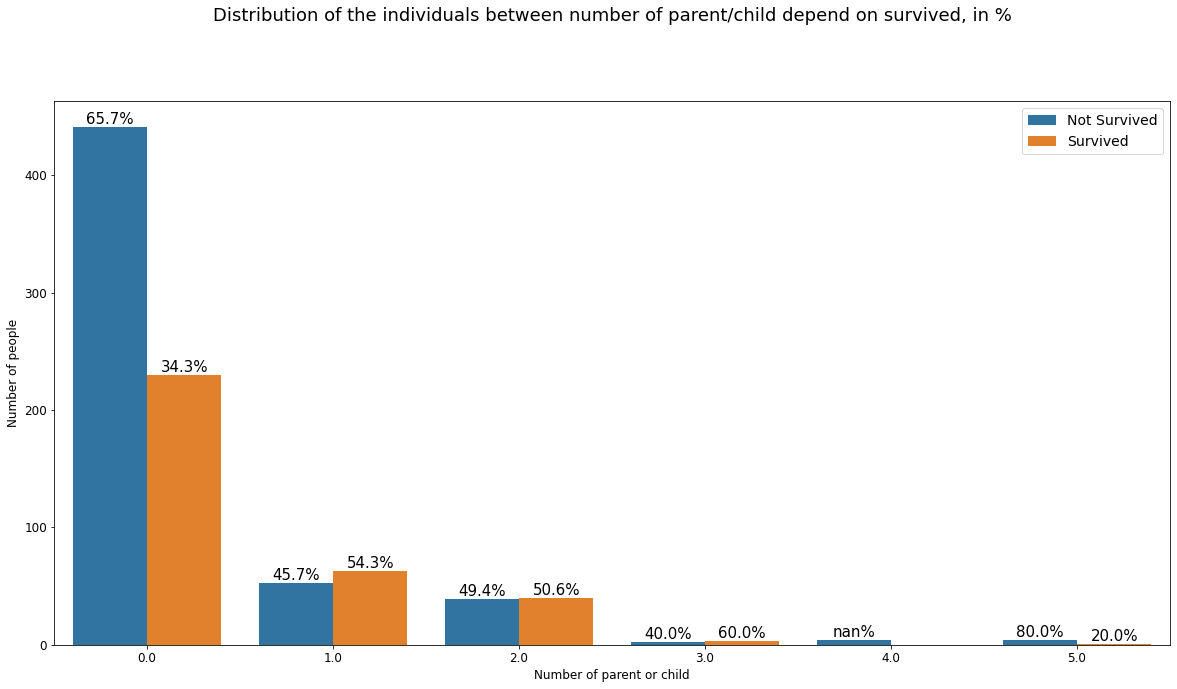

In [190]:
ax = countplot_with_hue((20, 10), train, 'nbParents_child', 'Survived')
plt.title(
    'Distribution of the individuals between number of parent/child depend on survived, in %',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("Number of parent or child", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14, labels=["Not Survived", "Survived"])
print_with_hue_01(train, 'nbParents_child', ax)

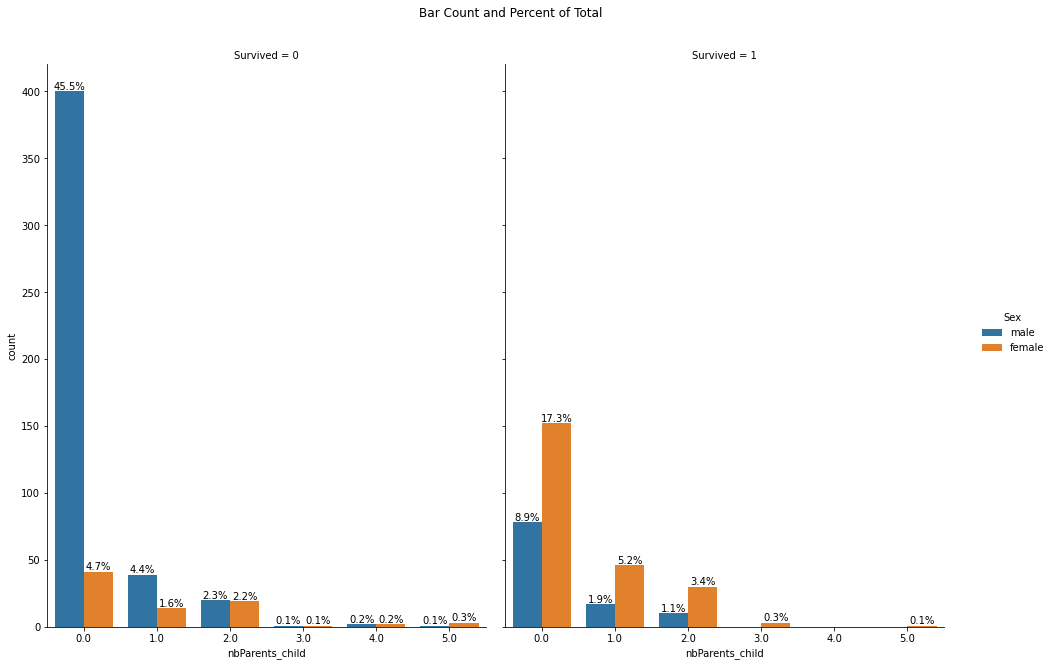

In [191]:
catplot_two_hue((15, 10), train, 'nbParents_child', 'Sex', 'Survived')

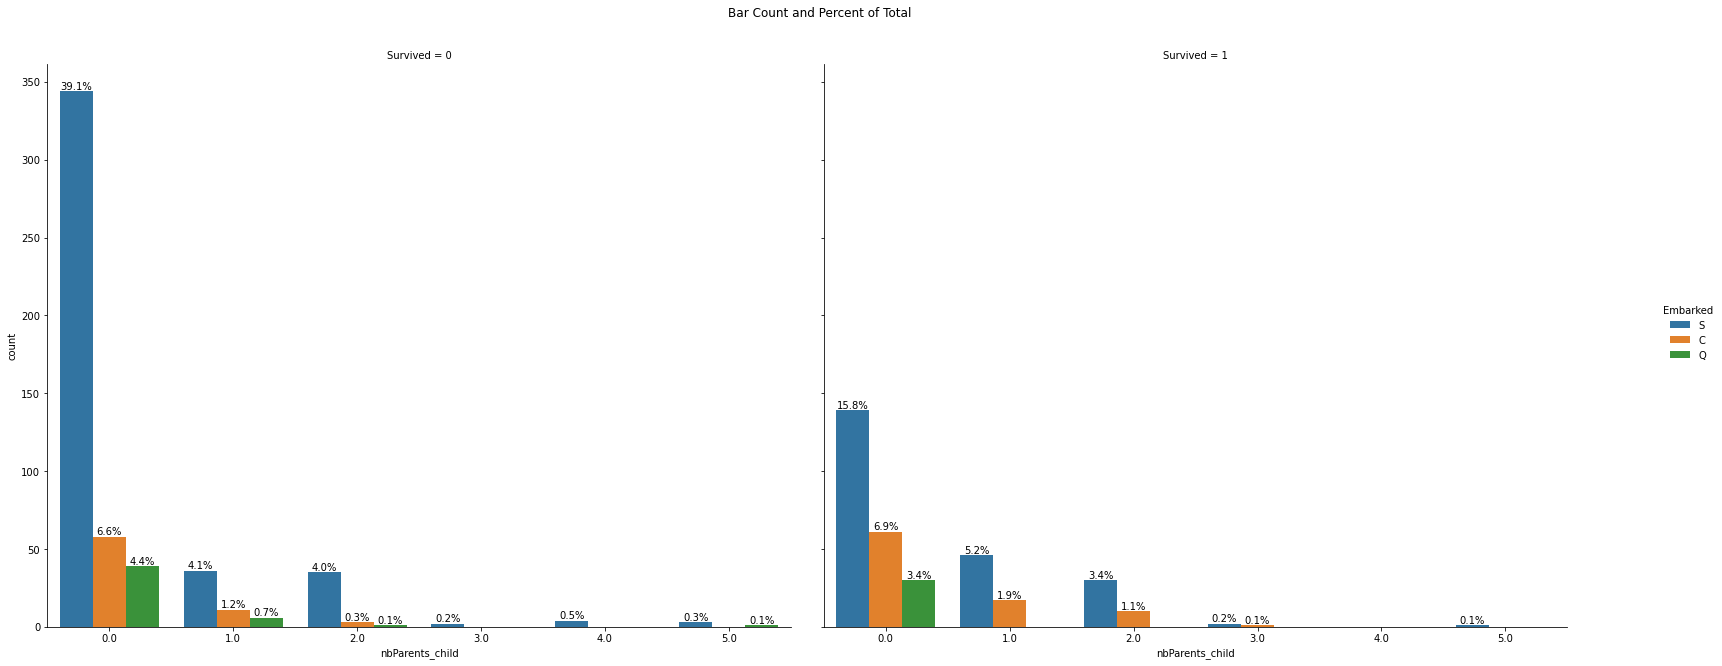

In [192]:
catplot_two_hue((25, 10), train, 'nbParents_child', 'Embarked', 'Survived')

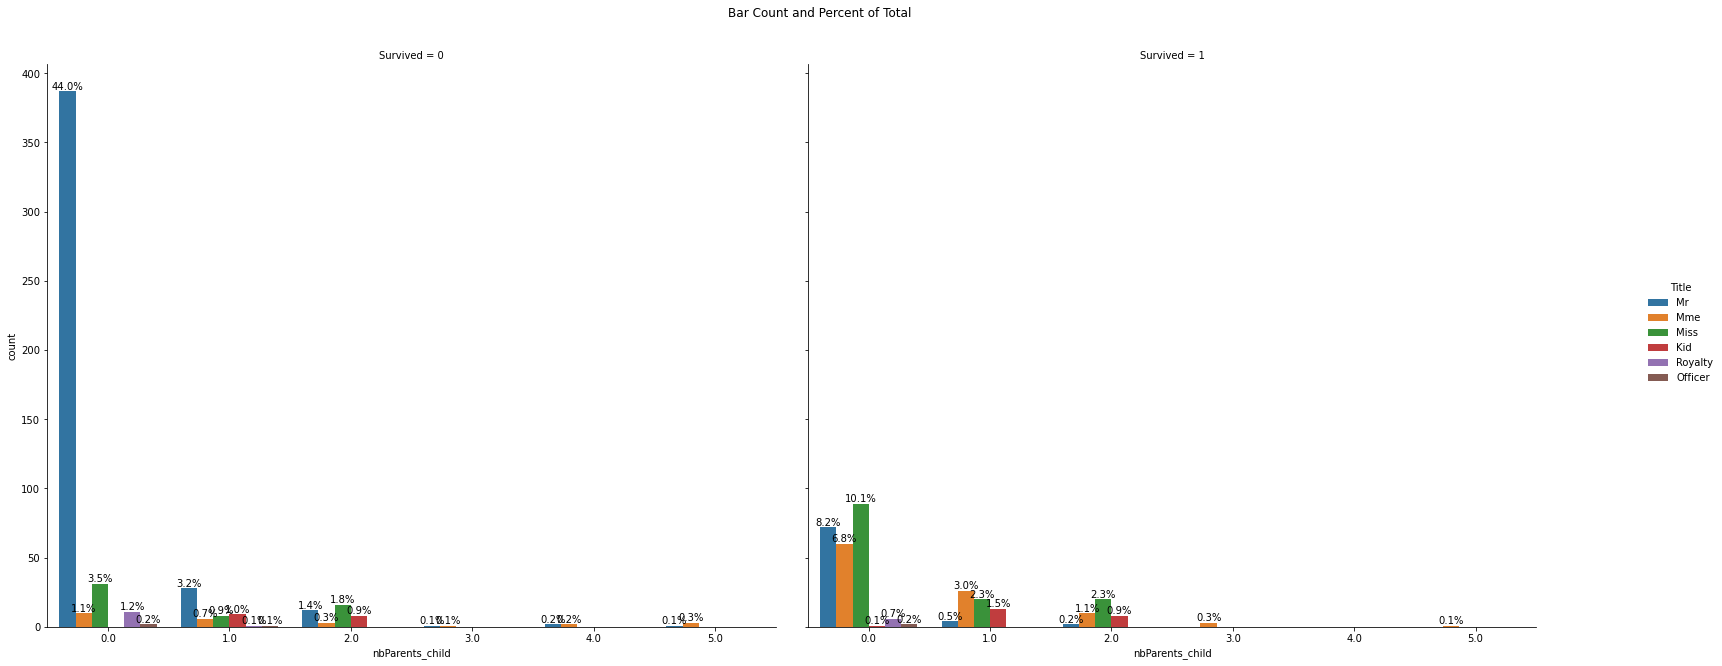

In [193]:
catplot_two_hue((25, 10), train, 'nbParents_child', 'Title', 'Survived')

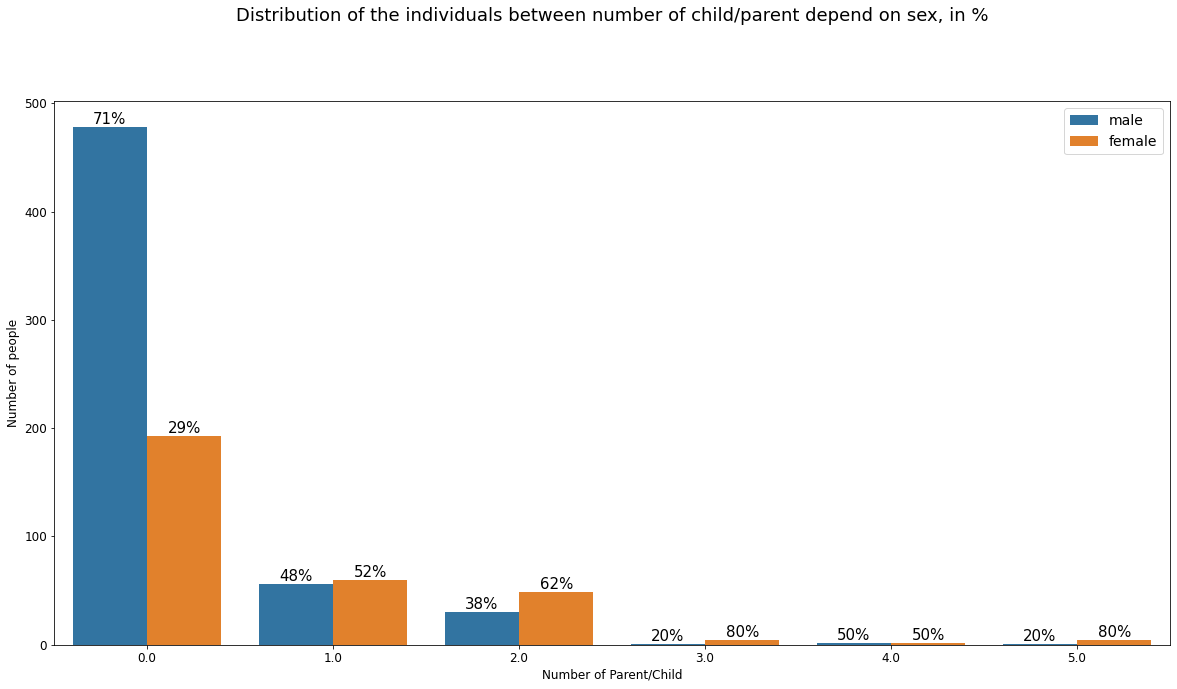

In [194]:
ax = countplot_with_hue((20, 10), train, 'nbParents_child', 'Sex')
plt.title(
    'Distribution of the individuals between number of child/parent depend on sex, in %',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("Number of Parent/Child", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14)
print_with_hue(train, 'nbParents_child', ax)

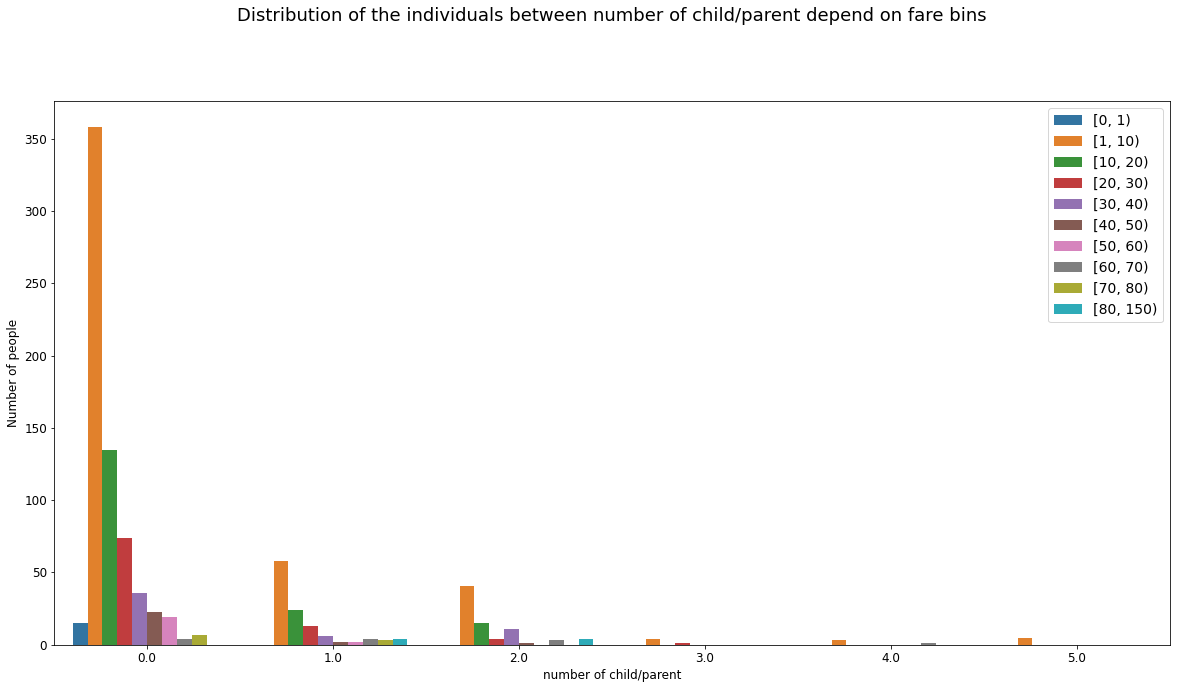

In [195]:
ax = countplot_with_hue((20, 10), train, 'nbParents_child', 'Fare_bin')
plt.title(
    'Distribution of the individuals between number of child/parent depend on fare bins',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("number of child/parent", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14)
plt.show()

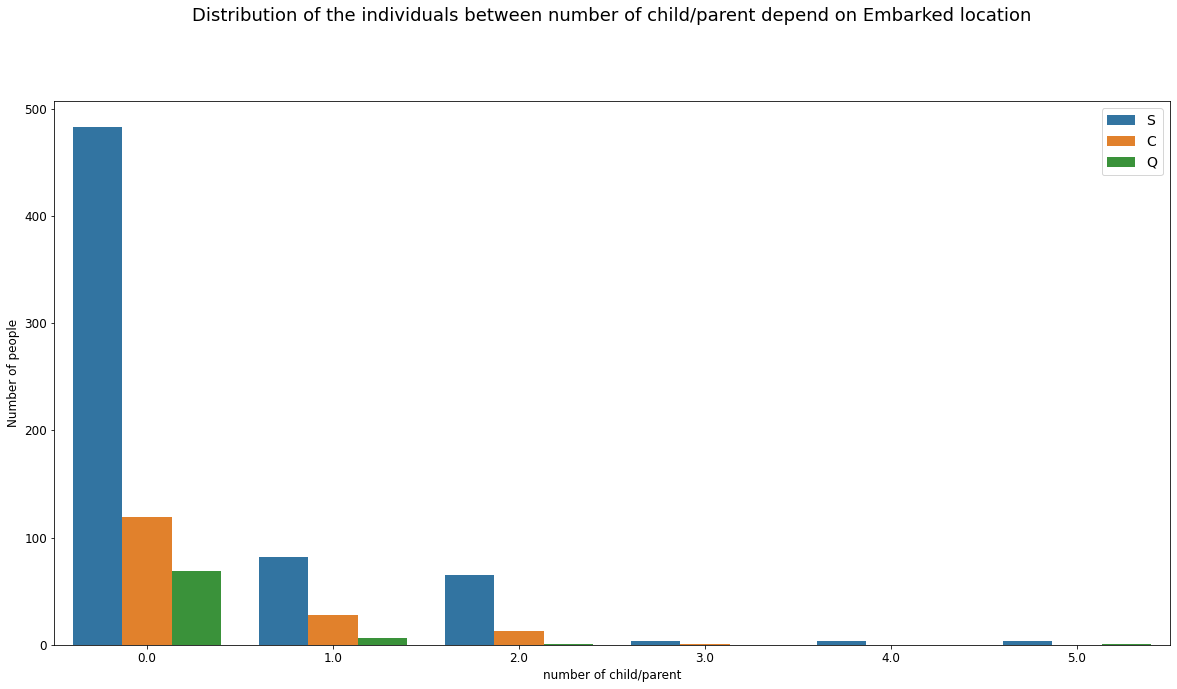

In [196]:
ax = countplot_with_hue((20, 10), train, 'nbParents_child', 'Embarked')
plt.title(
    'Distribution of the individuals between number of child/parent depend on Embarked location',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("number of child/parent", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14)
plt.show()

## <font color='green'>Colonne : Fare </font>

### <font color='grey'>Analyse Univariée</font>

<AxesSubplot:xlabel='Fare', ylabel='Density'>

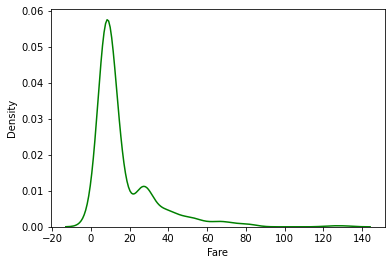

In [197]:
sns.kdeplot(train['Fare'], color="green")

<AxesSubplot:xlabel='Fare', ylabel='Density'>

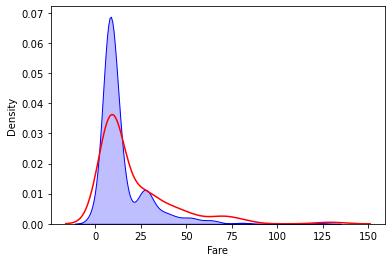

In [198]:
plt.figure()
sns.kdeplot(train[train['Sex'] == 'female']['Fare'], color="red")
sns.kdeplot(train[train['Sex'] == 'male']['Fare'], color="blue", shade=True)

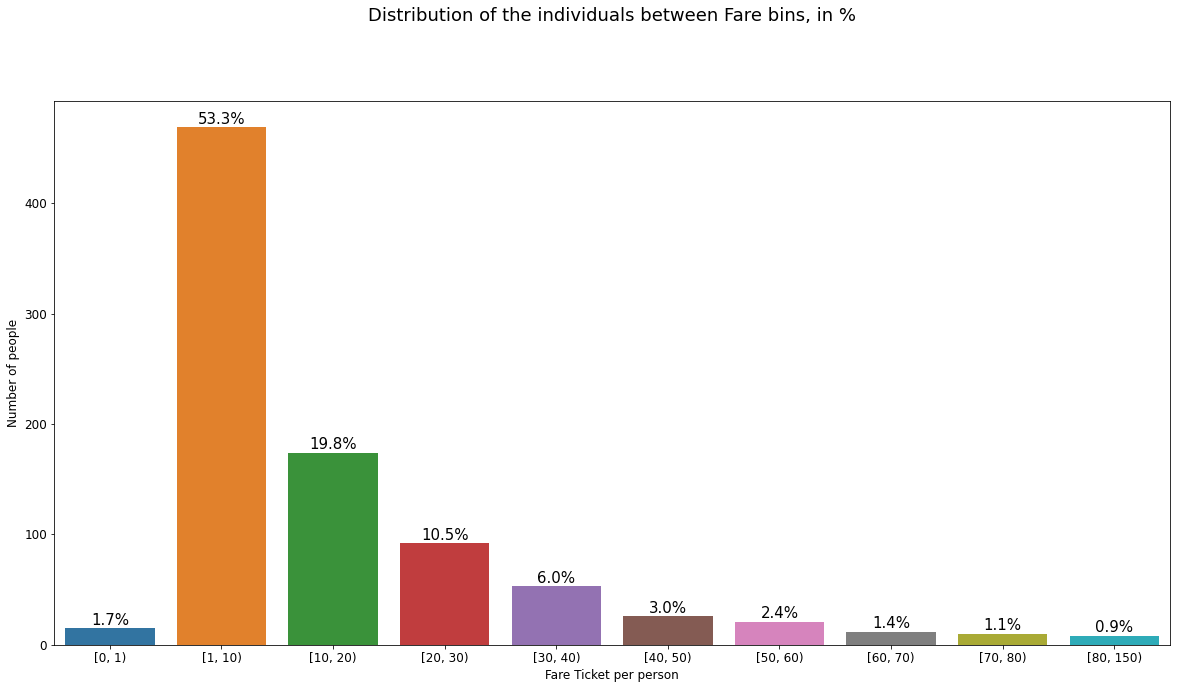

In [199]:
ax = countplot((20, 10), train, 'Fare_bin')

plt.title('Distribution of the individuals between Fare bins, in %',
          size=18,
          loc='center',
          pad=80)
plt.xlabel("Fare Ticket per person", size=12)
plt.ylabel("Number of people", size=12)

print_without_hue_01(ax, train['Fare_bin'])

### <font color='grey'>Analyse Multivariée</font>

posx and posy should be finite values
posx and posy should be finite values


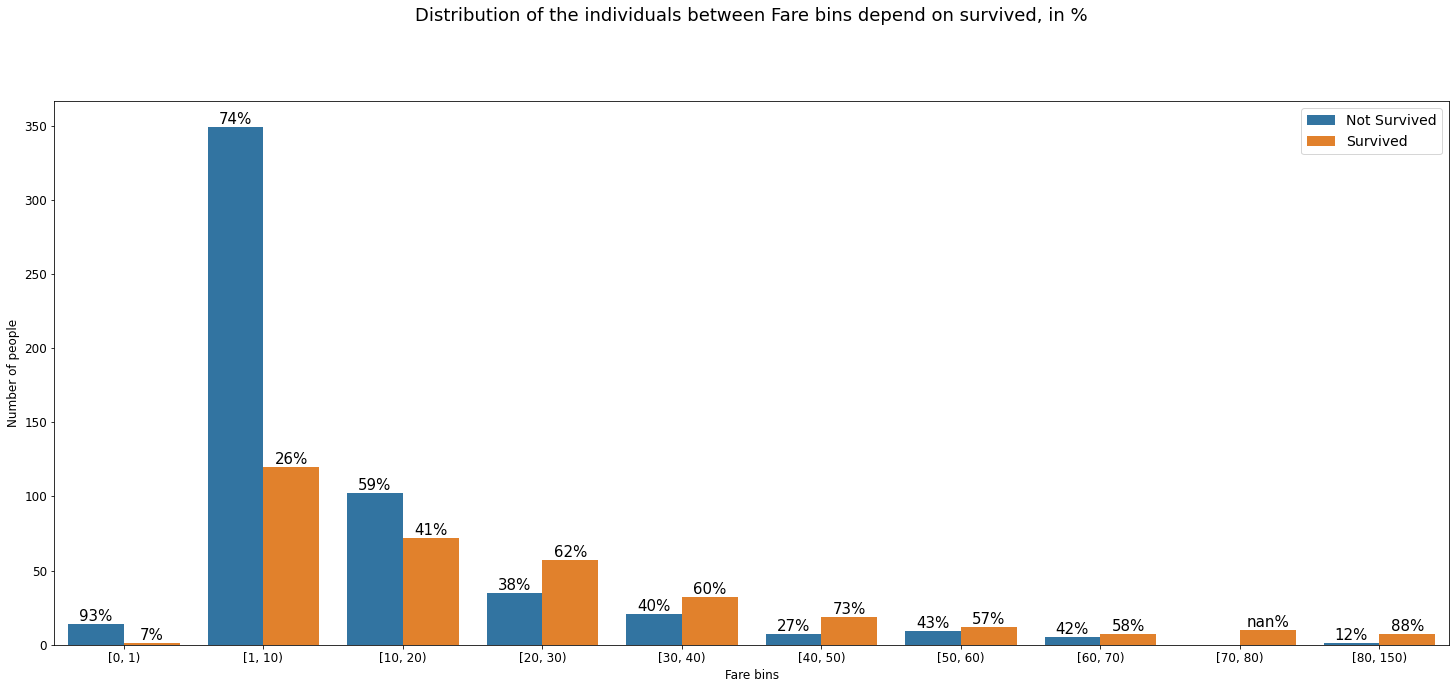

In [200]:
ax = countplot_with_hue((25, 10), train, 'Fare_bin', 'Survived')
plt.title(
    'Distribution of the individuals between Fare bins depend on survived, in %',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("Fare bins", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14, labels=["Not Survived", "Survived"])
print_with_hue(train, 'Fare_bin', ax)

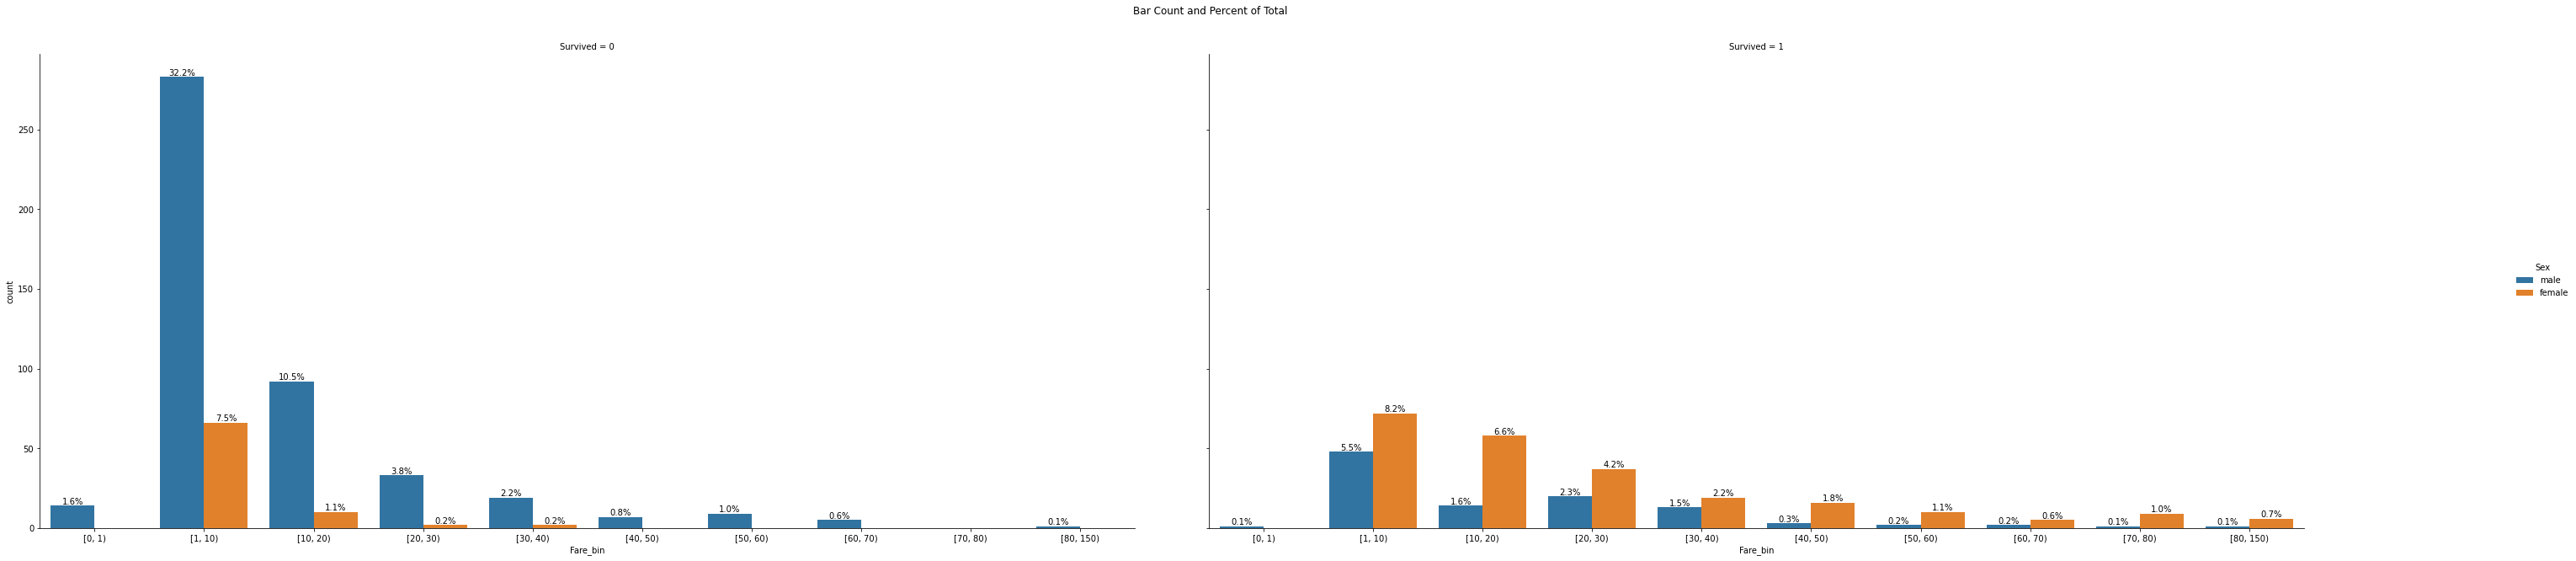

In [201]:
catplot_two_hue((45, 10), train, 'Fare_bin', 'Sex', 'Survived')

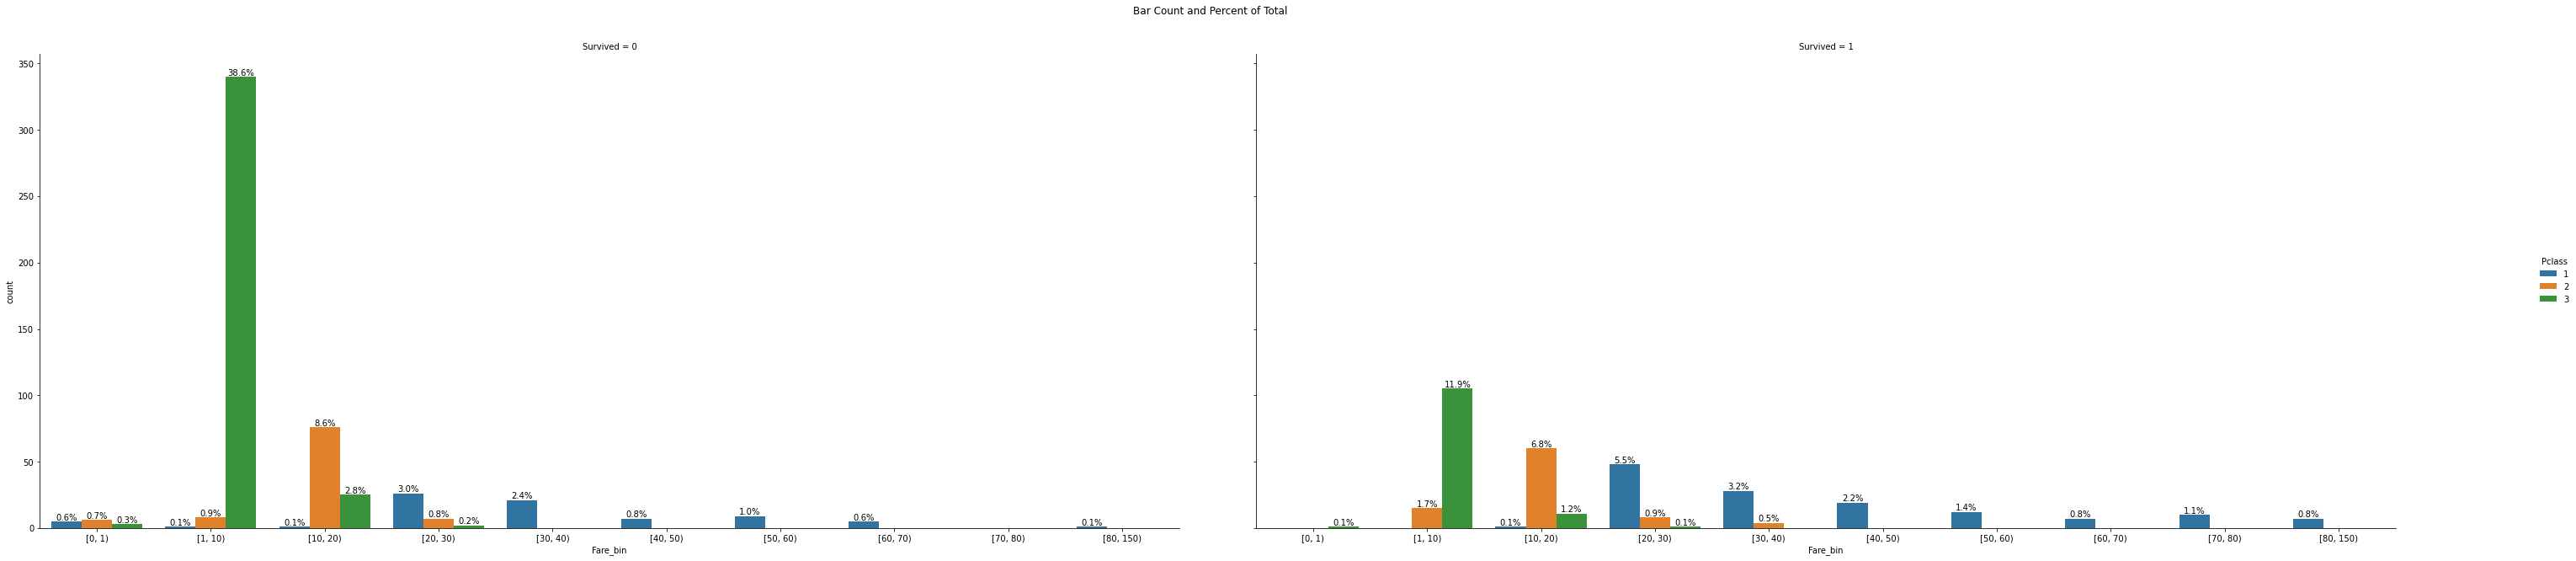

In [202]:
catplot_two_hue((45, 10), train, 'Fare_bin', 'Pclass', 'Survived')

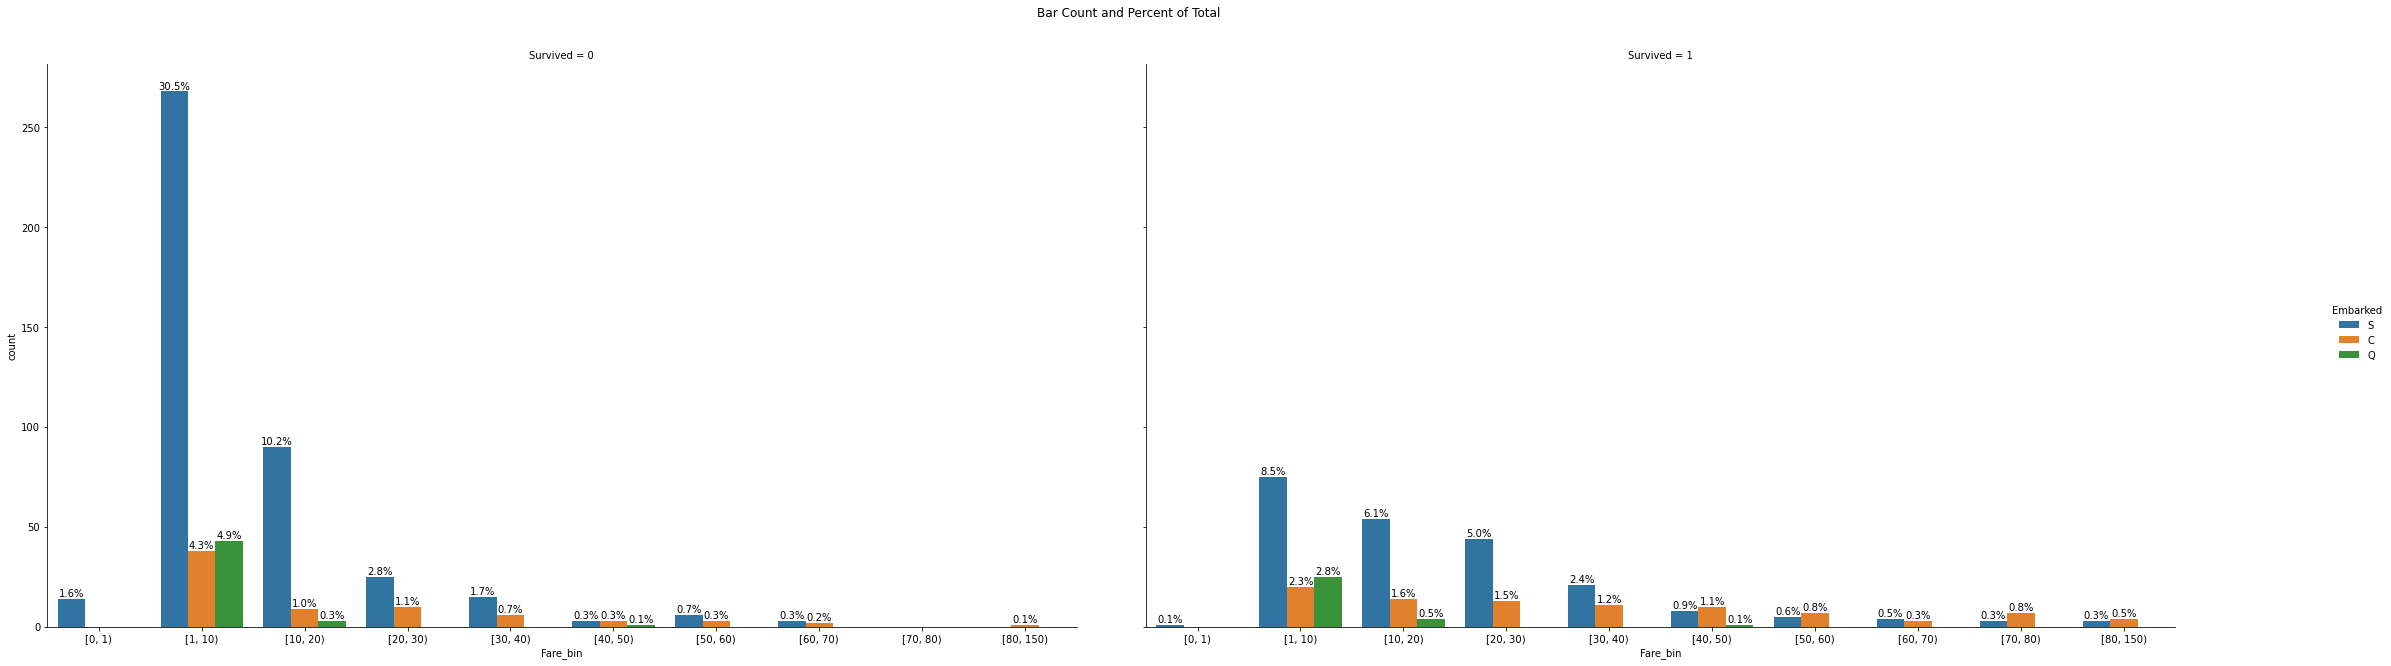

In [203]:
catplot_two_hue((35, 10), train, 'Fare_bin', 'Embarked', 'Survived')

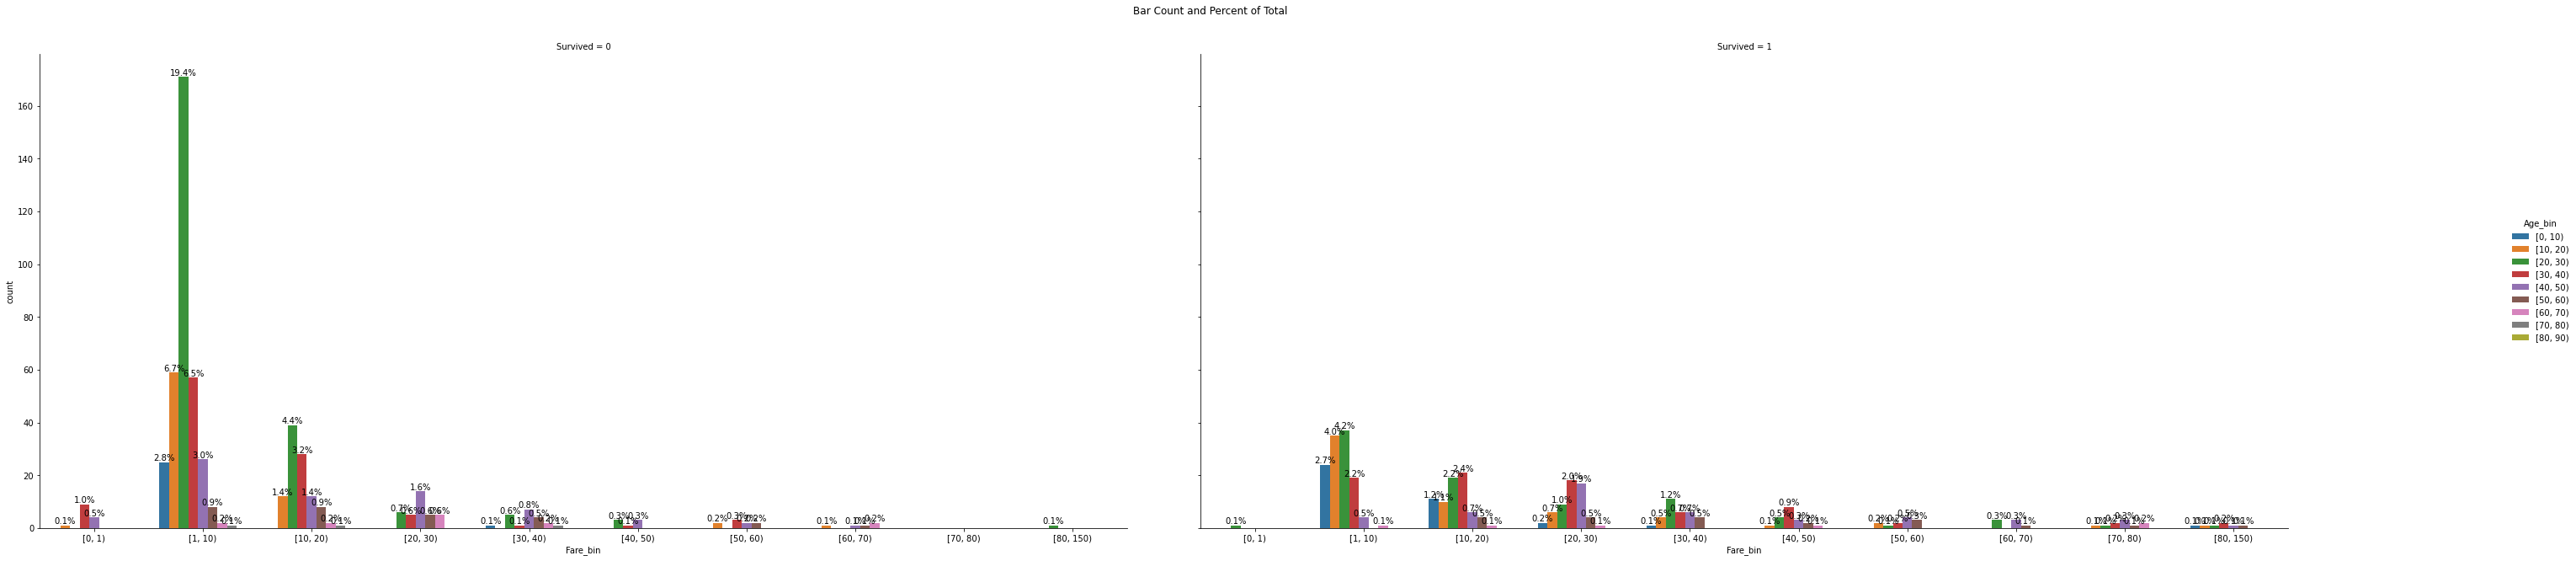

In [204]:
catplot_two_hue((45, 10), train, 'Fare_bin', 'Age_bin', 'Survived')

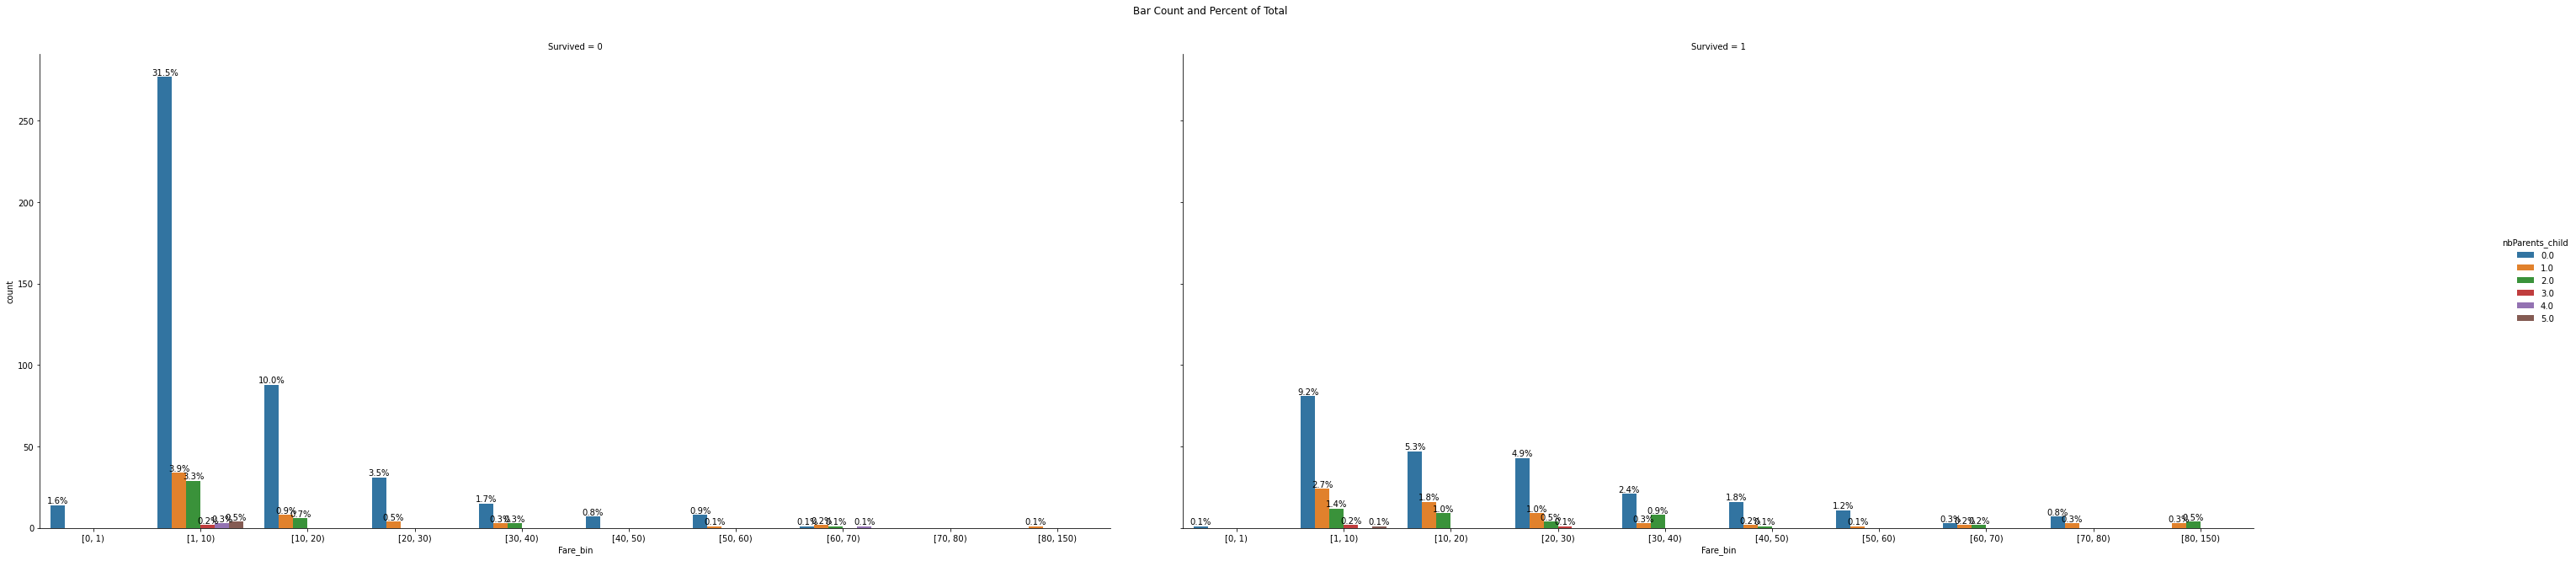

In [205]:
catplot_two_hue((45, 10), train, 'Fare_bin', 'nbParents_child', 'Survived')

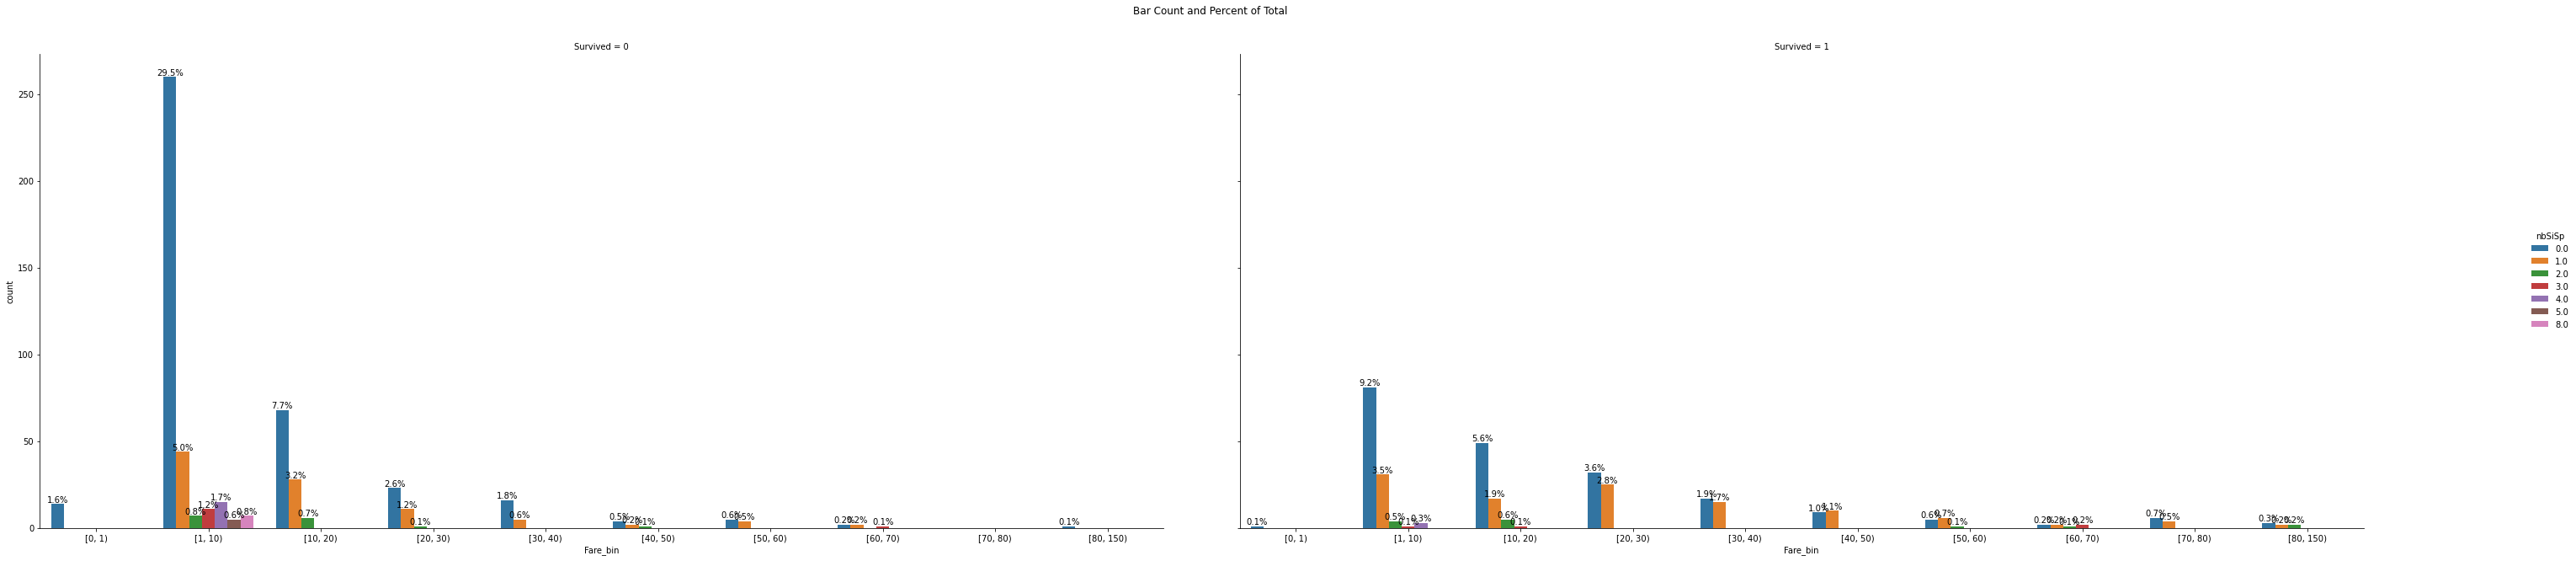

In [206]:
catplot_two_hue((45, 10), train, 'Fare_bin', 'nbSiSp', 'Survived')

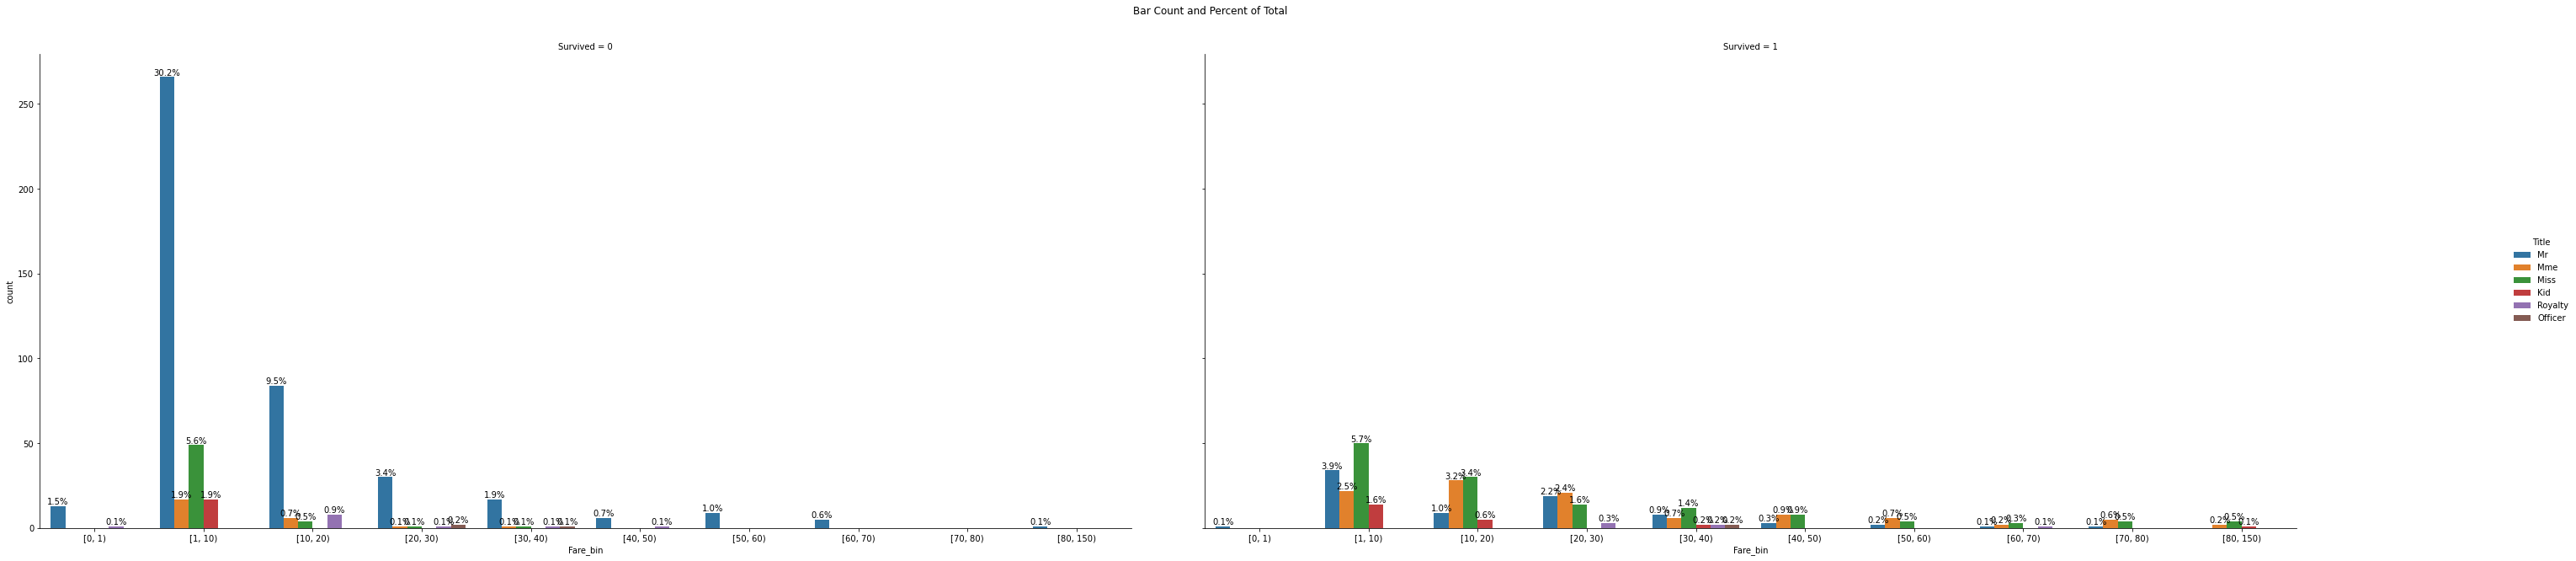

In [207]:
catplot_two_hue((45, 10), train, 'Fare_bin', 'Title', 'Survived')

posx and posy should be finite values
posx and posy should be finite values


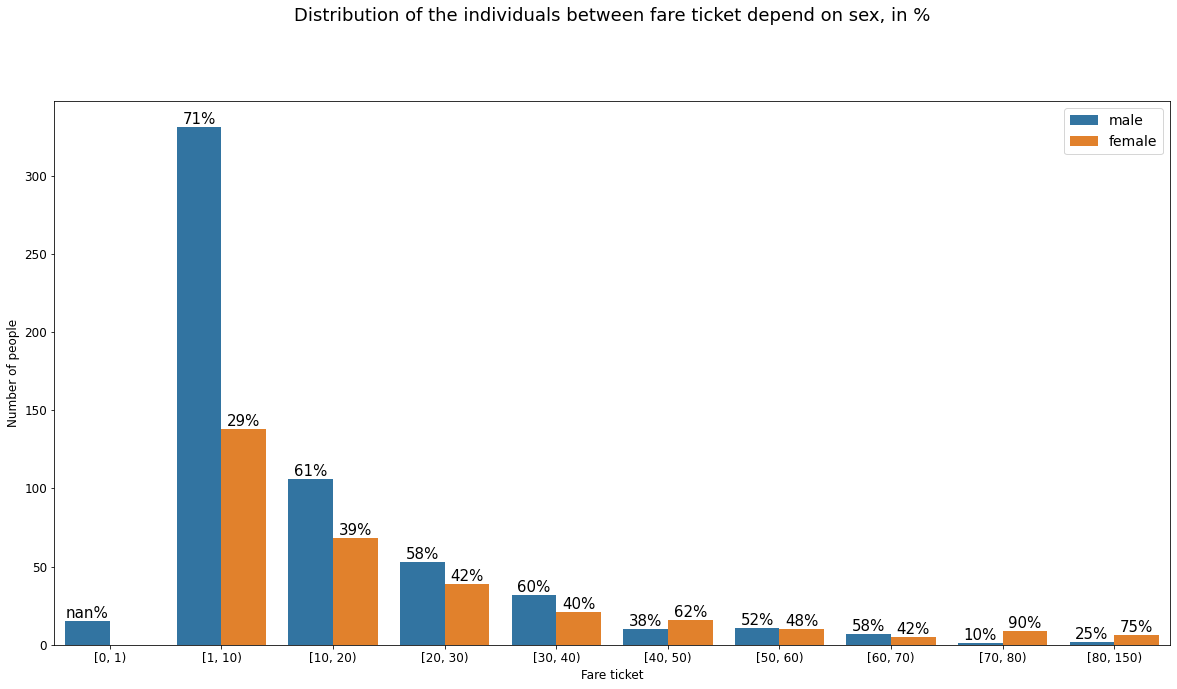

In [208]:
ax = countplot_with_hue((20, 10), train, 'Fare_bin', 'Sex')
plt.title(
    'Distribution of the individuals between fare ticket depend on sex, in %',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("Fare ticket", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14)
print_with_hue(train, 'Fare_bin', ax)

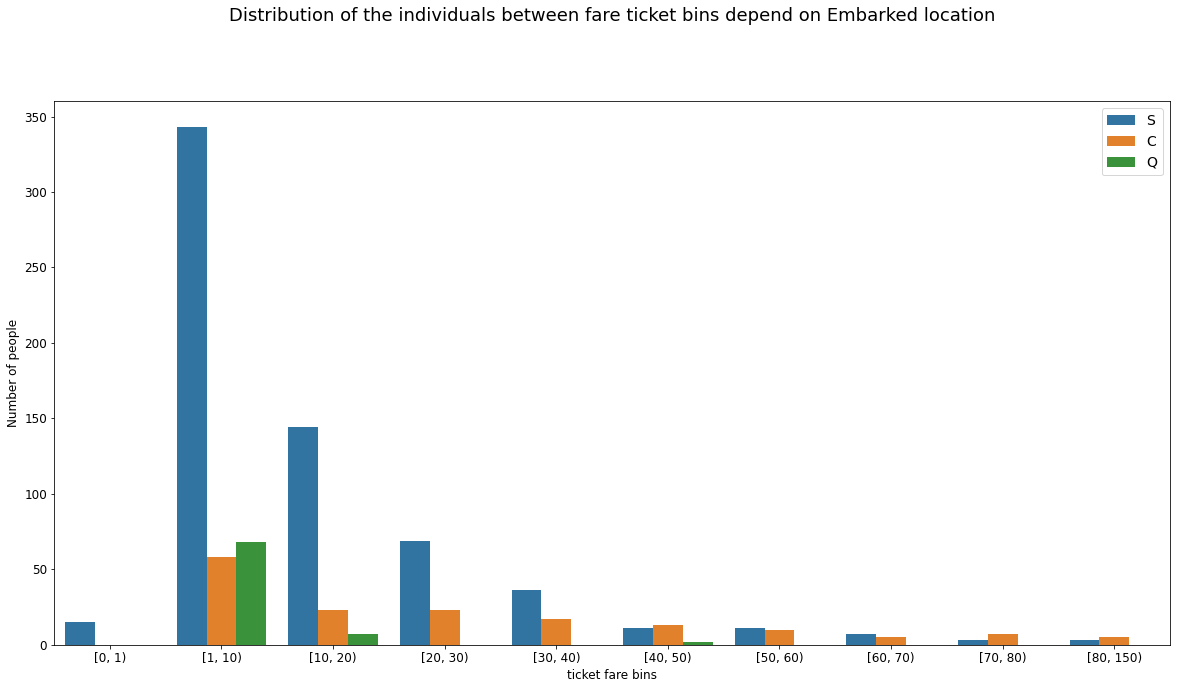

In [209]:
ax = countplot_with_hue((20, 10), train, 'Fare_bin', 'Embarked')
plt.title(
    'Distribution of the individuals between fare ticket bins depend on Embarked location',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("ticket fare bins", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14)
plt.show()

## <font color='green'>Colonne : Embarked </font>

### <font color='grey'>Analyse Univariée</font>

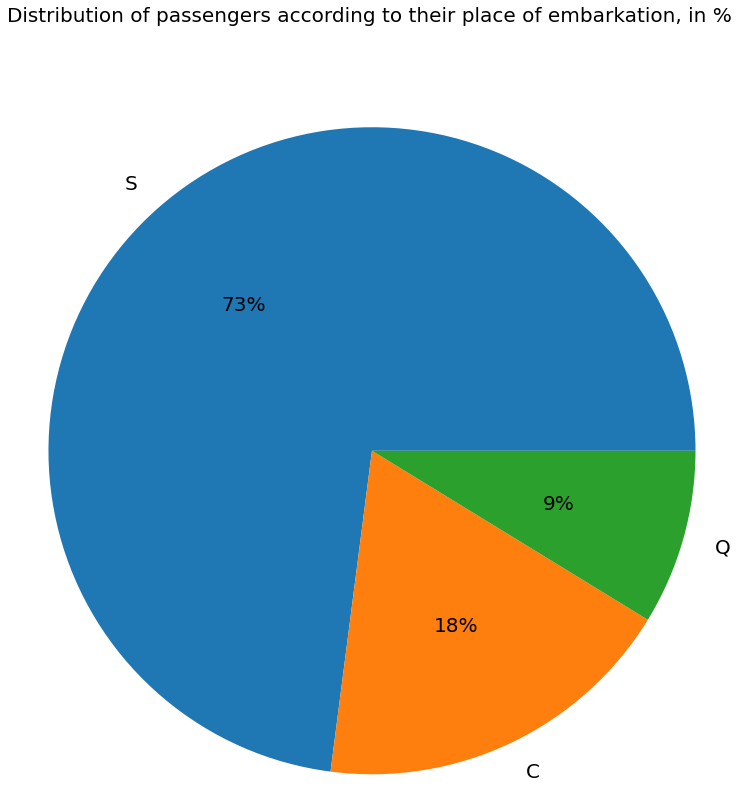

In [210]:
pie_plot((10, 10), train, 'Embarked')

plt.title(
    "Distribution of passengers according to their place of embarkation, in %",
    fontsize=20,
    pad=80,
    loc='center')
plt.show()

### <font color='grey'>Analyse Multivariée</font>

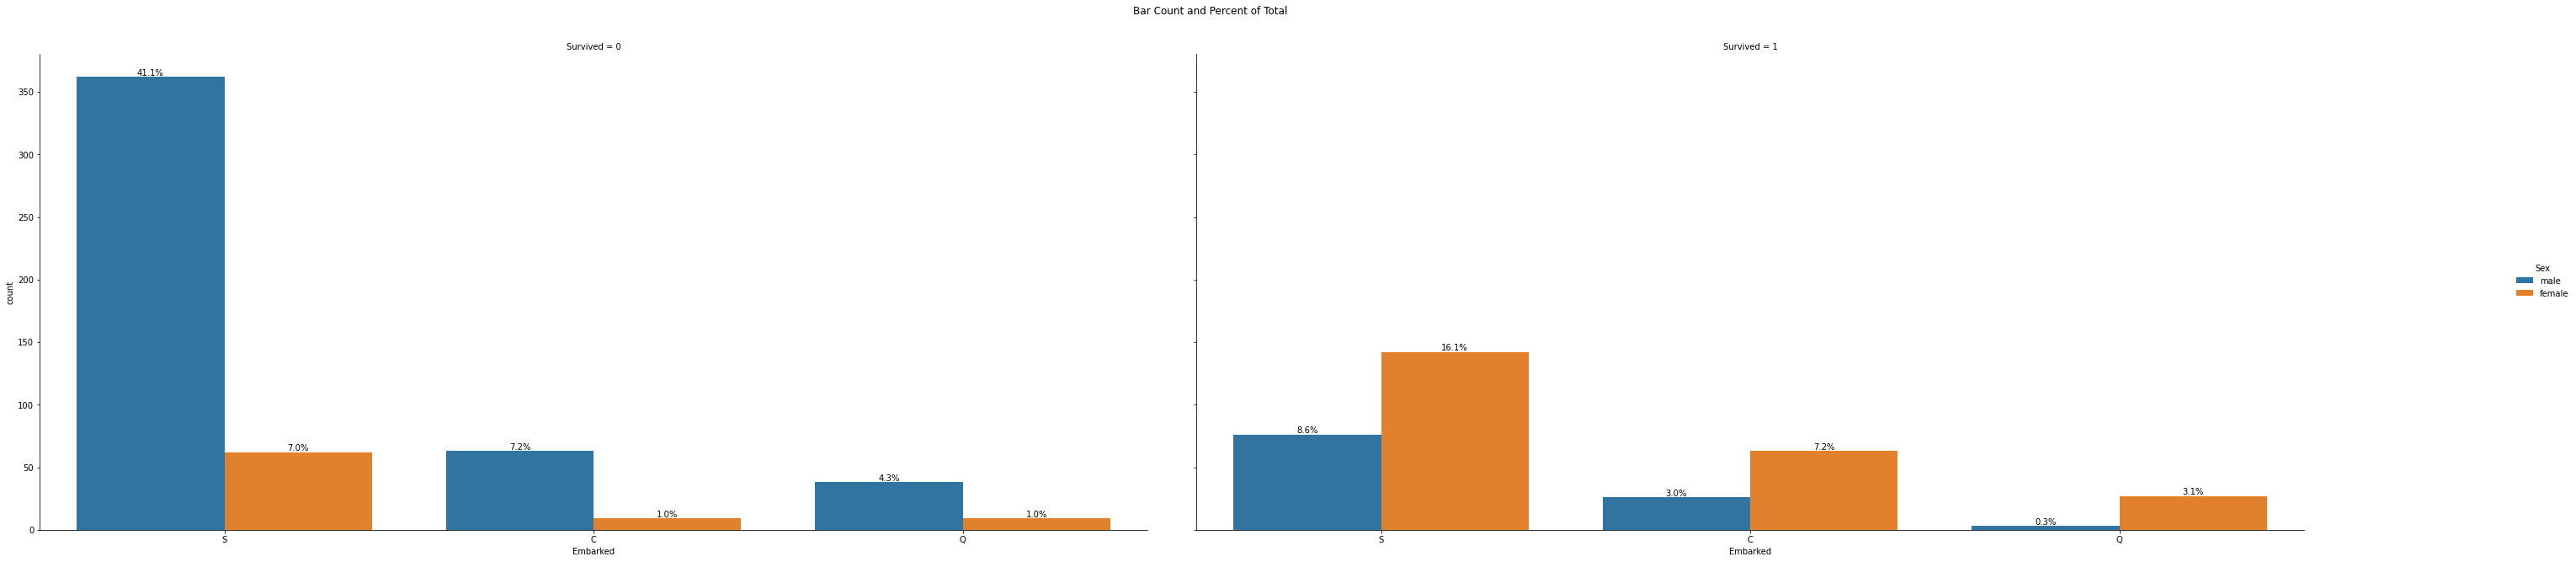

In [211]:
catplot_two_hue((45, 10), train, 'Embarked', 'Sex', 'Survived')

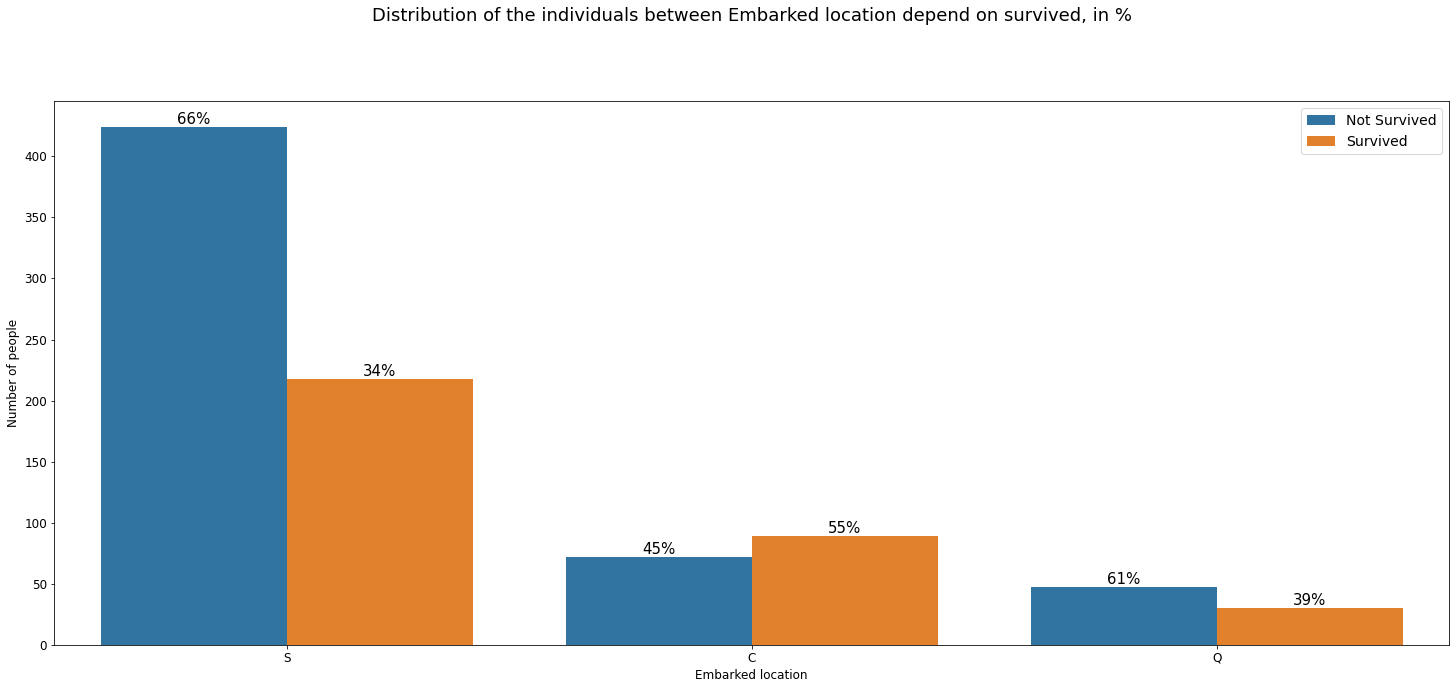

In [212]:
ax = countplot_with_hue((25, 10), train, 'Embarked', 'Survived')
plt.title(
    'Distribution of the individuals between Embarked location depend on survived, in %',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("Embarked location", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14, labels=["Not Survived", "Survived"])
print_with_hue(train, 'Embarked', ax)

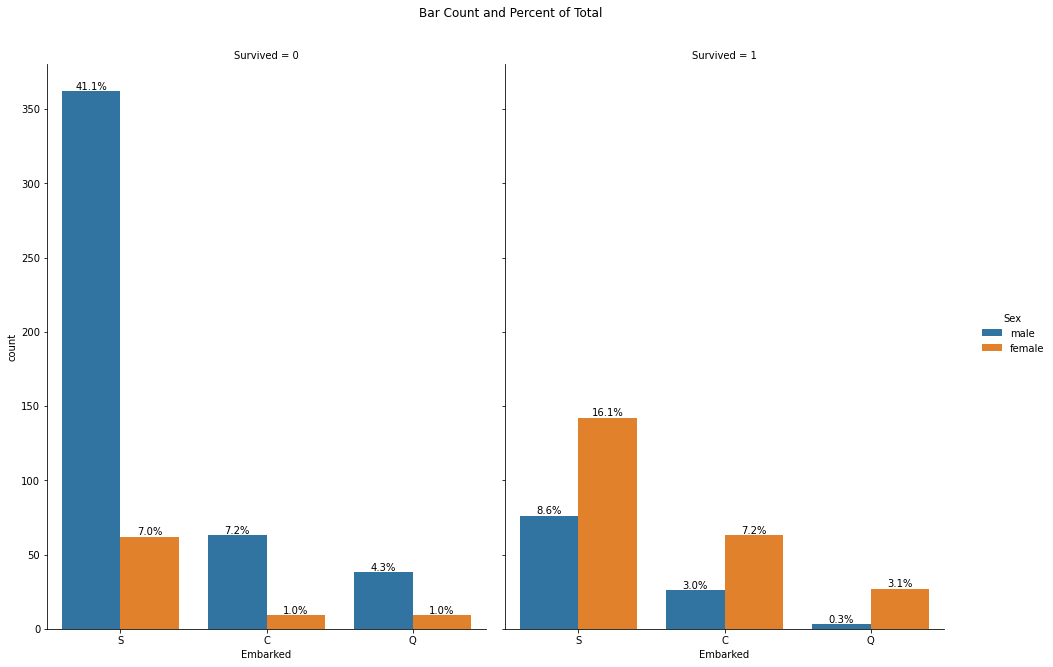

In [213]:
catplot_two_hue((15, 10), train, 'Embarked', 'Sex', 'Survived')

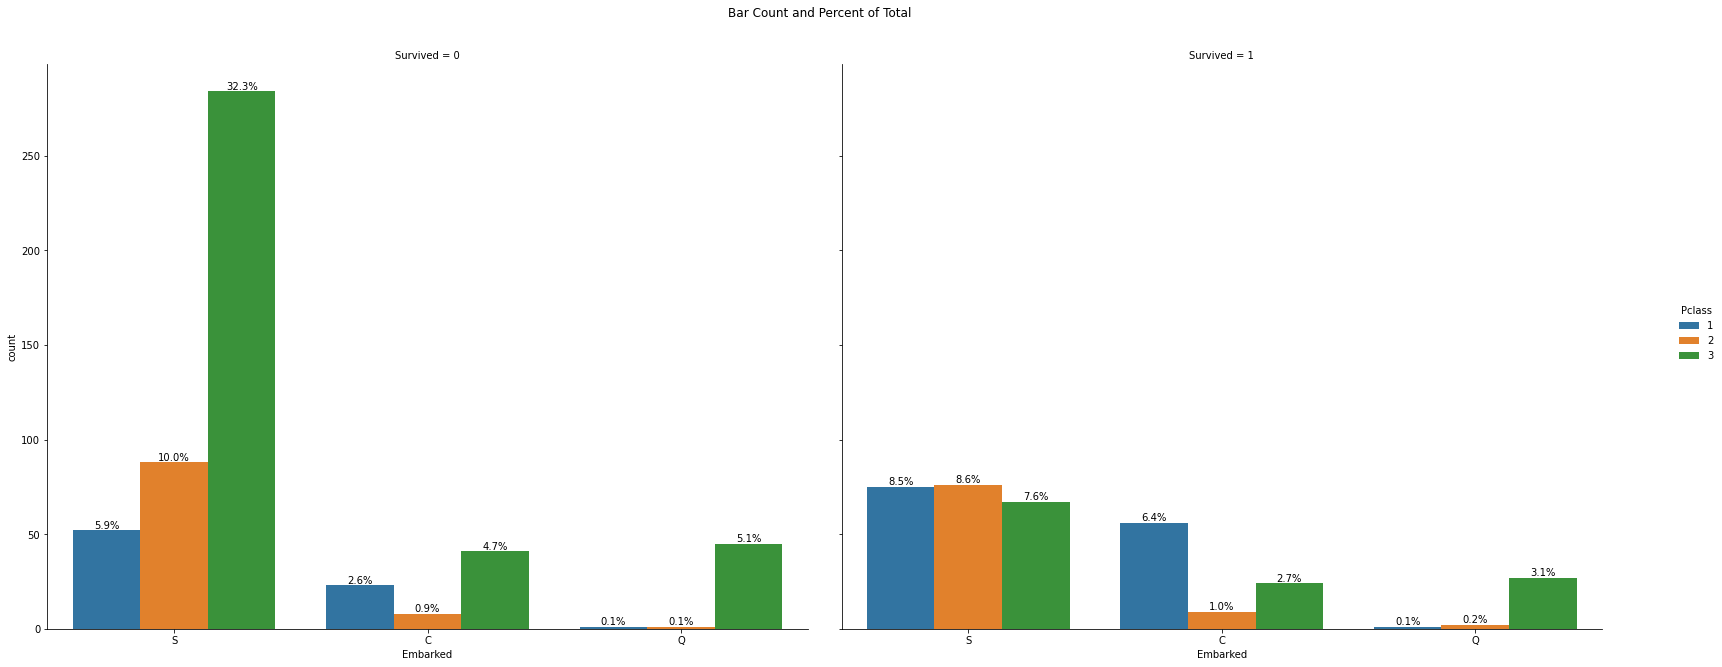

In [214]:
catplot_two_hue((25, 10), train, 'Embarked', 'Pclass', 'Survived')

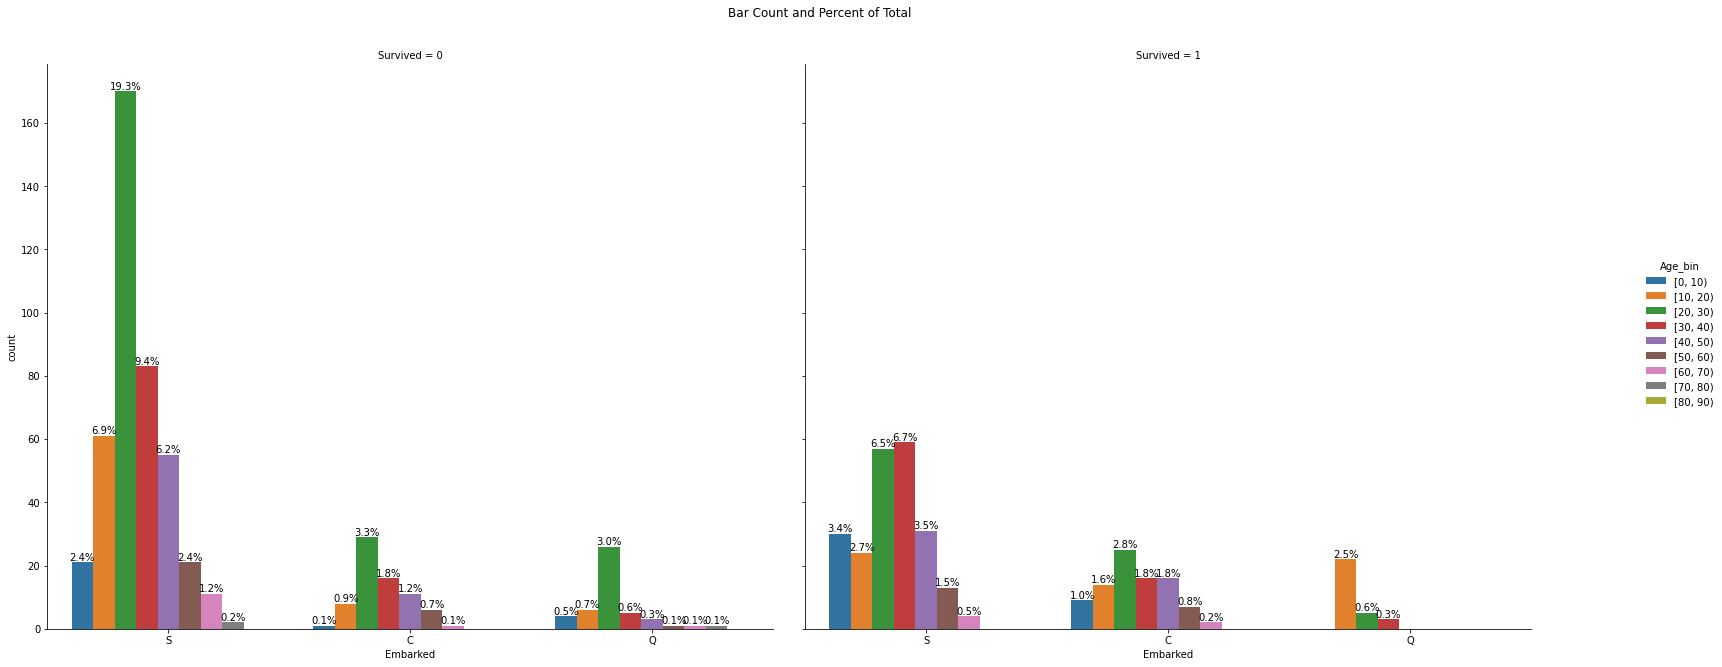

In [215]:
catplot_two_hue((25, 10), train, 'Embarked', 'Age_bin', 'Survived')

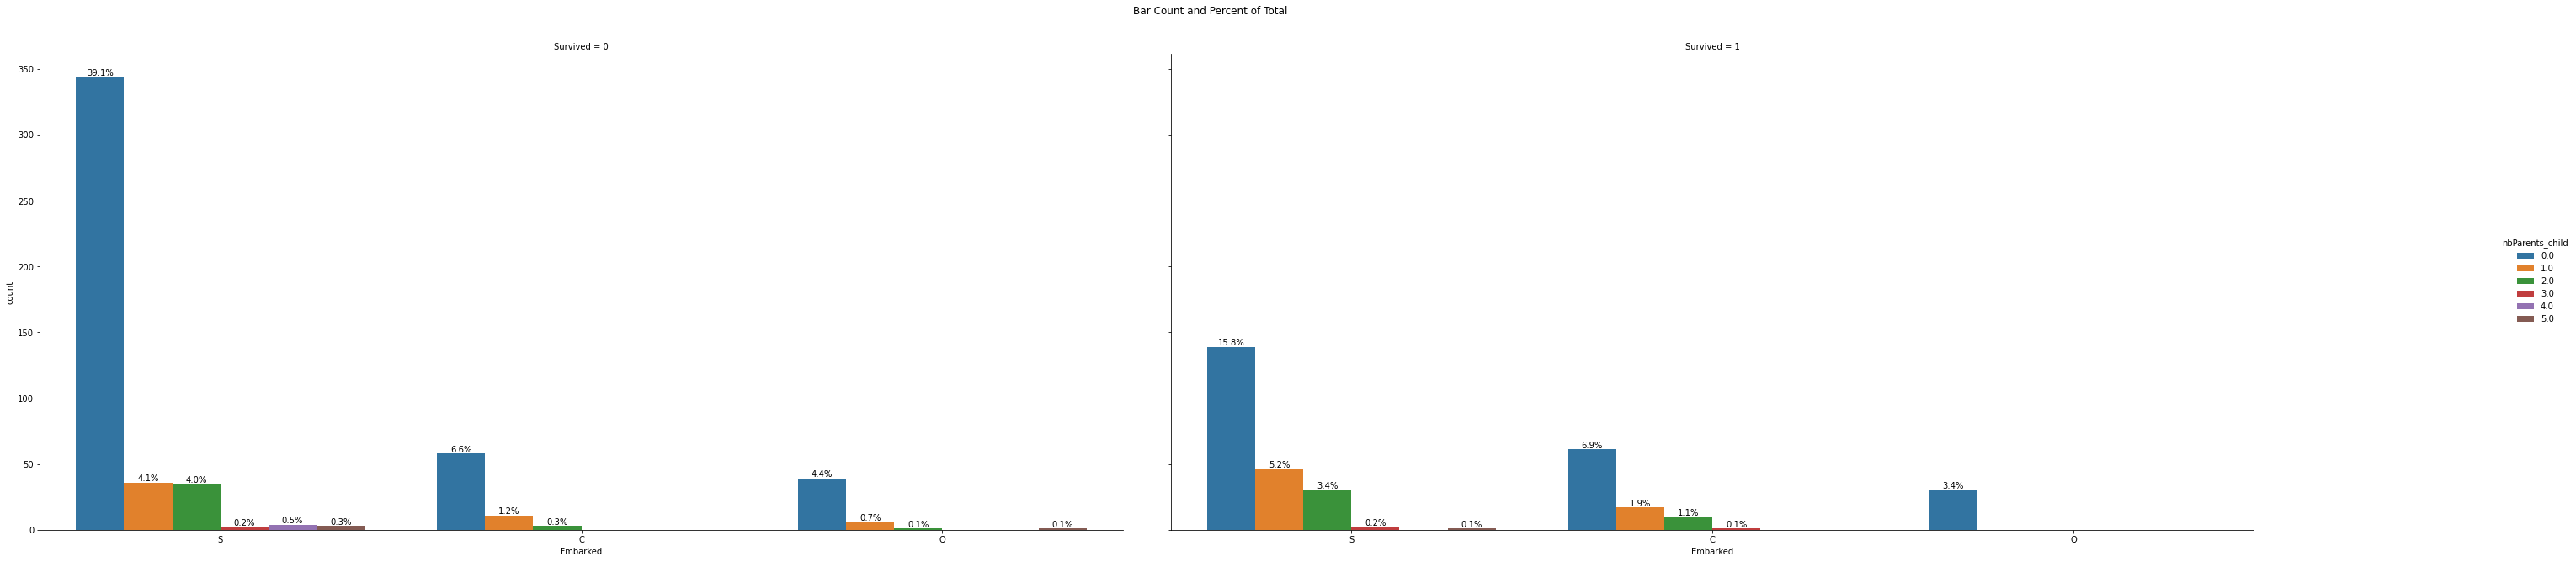

In [216]:
catplot_two_hue((45, 10), train, 'Embarked', 'nbParents_child', 'Survived')

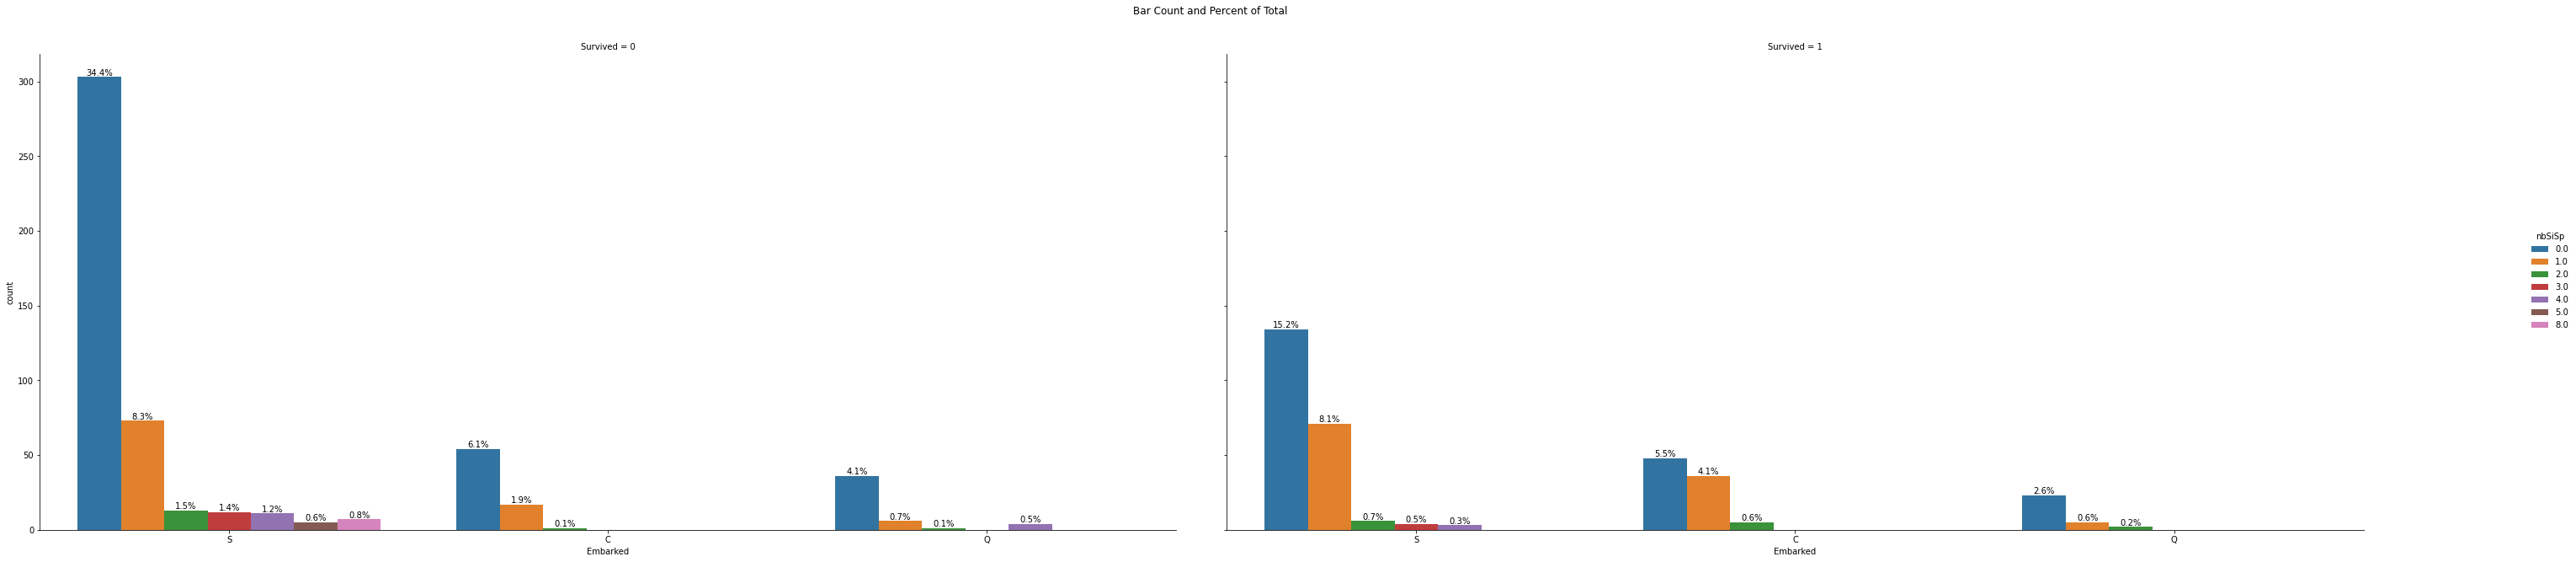

In [217]:
catplot_two_hue((45, 10), train, 'Embarked', 'nbSiSp', 'Survived')

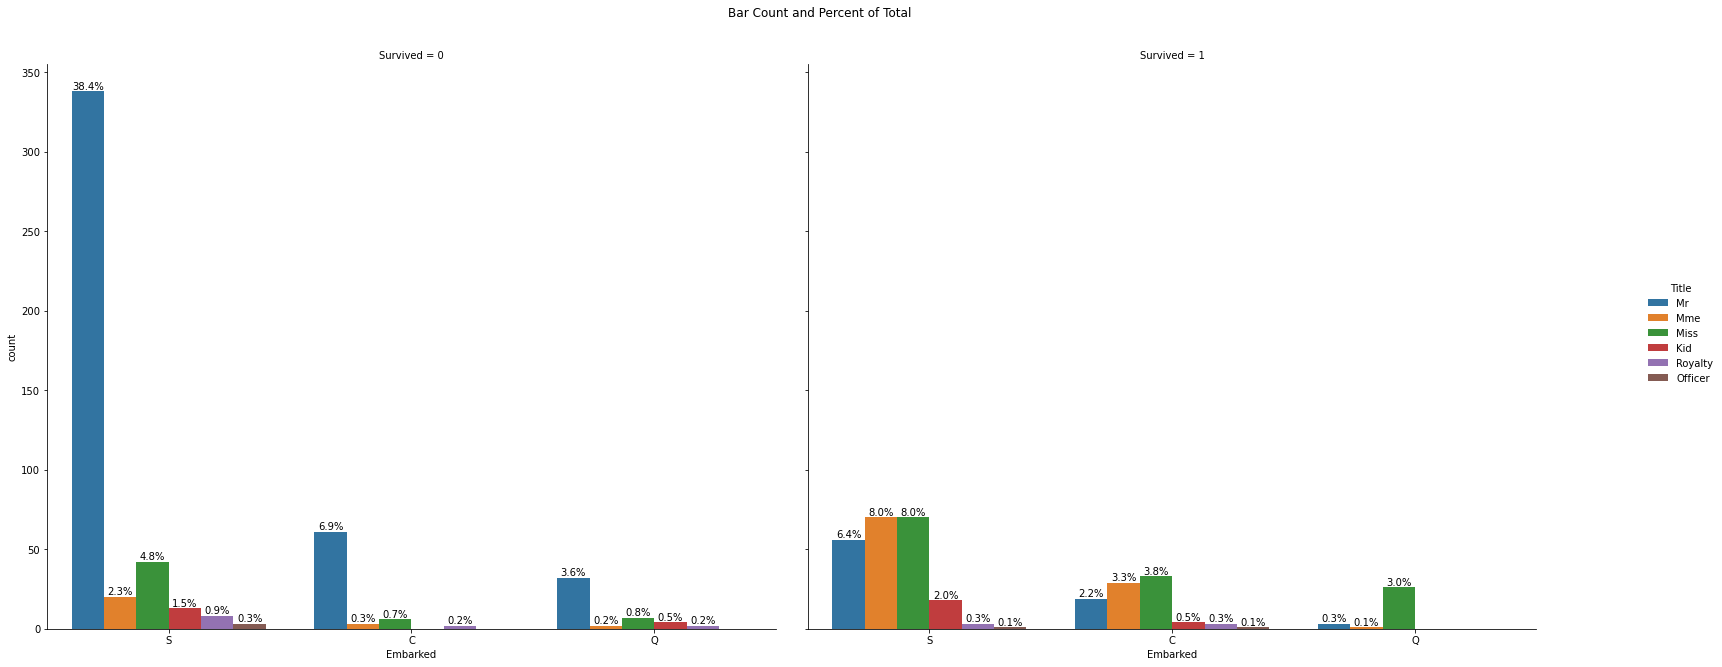

In [218]:
catplot_two_hue((25, 10), train, 'Embarked', 'Title', 'Survived')

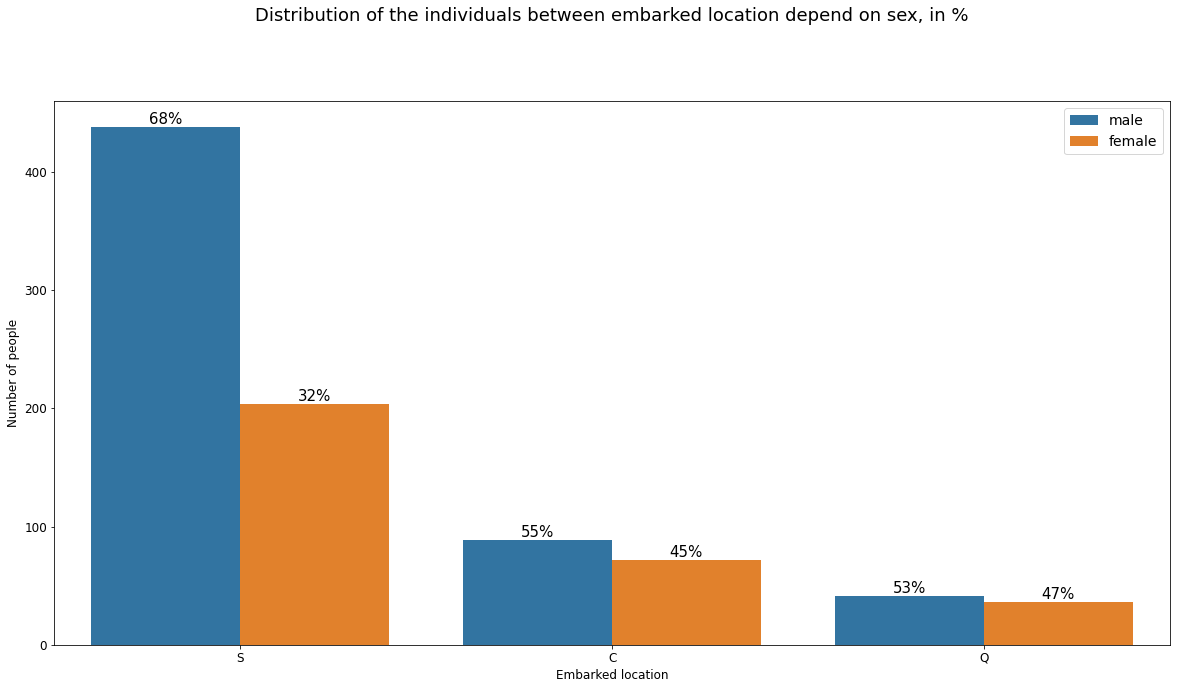

In [219]:
ax = countplot_with_hue((20, 10), train, 'Embarked', 'Sex')
plt.title(
    'Distribution of the individuals between embarked location depend on sex, in %',
    size=18,
    loc='center',
    pad=80)
plt.xlabel("Embarked location", size=12)
plt.ylabel("Number of people", size=12)
plt.legend(loc='upper right', fontsize=14)
print_with_hue(train, 'Embarked', ax)